# Introduction to Business Analytics: Final Project

In [3]:
from tabulate import tabulate
 
Group_members = [['Group Member','Student number'],
                           ['Anna Miotto','s220674'],
                           ['Anna Olivia de Carle McFall','s184307'],
                           ['Dimitrios Loukas','s220514'],
                           ['Oriol Solans Ormo','s222527'],
                           ['Patricio Alejandro Fabro','s220269'],]
 
print(tabulate(Group_members,headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════════════╤══════════════════╕
│ Group Member                │ Student number   │
╞═════════════════════════════╪══════════════════╡
│ Anna Miotto                 │ s220674          │
├─────────────────────────────┼──────────────────┤
│ Anna Olivia de Carle McFall │ s184307          │
├─────────────────────────────┼──────────────────┤
│ Dimitrios Loukas            │ s220514          │
├─────────────────────────────┼──────────────────┤
│ Oriol Solans Ormo           │ s222527          │
├─────────────────────────────┼──────────────────┤
│ Patricio Alejandro Fabro    │ s220269          │
╘═════════════════════════════╧══════════════════╛


## This project is structured in 3 main parts:
### 1.Cleaning and data visualization
### 2.Prediction challenge:
    2.a. Clustering 
    2.b. Data aggregation and prediction
    2.c. Daily bikes maximum demand 
### 3.Exploratory component:

_____________________________________________________________________________________________________________________________

# 1. Cleaning and data visualization

In this initial part we first ispected the raw dataset, gathering information about data types, unique values and data distribution with data visualization. Those inghts helped understand how to perform cleaning steps to remove N/A values, remove outliers and convert specific data types. Following, the clean dataset has been inspected again with visualization and basic summary statistics to assess the effectiveness of cleaning step.

## Import dataset

In [4]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read the dataset into a DataFrame.
data = pd.read_csv("Trips_2018.csv")
data = pd.DataFrame(data)
data.shape

(17548339, 14)

In [6]:
data.head(5)

Unnamed: 0  tripduration                 starttime  \
0           0           970  2018-01-01 13:50:57.4340   
1           1           723  2018-01-01 15:33:30.1820   
2           2           496  2018-01-01 15:39:18.3370   
3           3           306  2018-01-01 15:40:13.3720   
4           4           306  2018-01-01 18:14:51.5680   

                   stoptime  start_station_id  start_station_latitude  \
0  2018-01-01 14:07:08.1860              72.0               40.767272   
1  2018-01-01 15:45:33.3410              72.0               40.767272   
2  2018-01-01 15:47:35.1720              72.0               40.767272   
3  2018-01-01 15:45:20.1910              72.0               40.767272   
4  2018-01-01 18:19:57.6420              72.0               40.767272   

   start_station_longitude  end_station_id  end_station_latitude  \
0               -73.993929           505.0             40.749013   
1               -73.993929          3255.0             40.750585   
2               -73.993929           525.0             40.755942   
3               -73.993929           447.0             40.763707   
4               -73.993929          3356.0             40.774667   

   end_station_longitude  bikeid    usertype  birth_year  gender  
0             -73.988484   31956  Subscriber        1992       1  
1             -73.994685   32536  Subscriber        1969       1  
2             -74.002116   16069  Subscriber        1956       1  
3             -73.985162   31781  Subscriber        1974       1  
4             -73.984706   30319  Subscriber        1992       1

## Inspect RAW dataset

- ### Check variable types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   tripduration             int64  
 2   starttime                object 
 3   stoptime                 object 
 4   start_station_id         float64
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_latitude     float64
 9   end_station_longitude    float64
 10  bikeid                   int64  
 11  usertype                 object 
 12  birth_year               int64  
 13  gender                   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.8+ GB


- ### Unique values CHECK

In [8]:
# Iterate through columns and print unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print(f"Number of unique values: {len(unique_values)}")
    print("\n")

Column: Unnamed: 0
[       0        1        2 ... 17548336 17548337 17548338]
Number of unique values: 17548339


Column: tripduration
[  970   723   496 ... 51131 53775 22819]
Number of unique values: 30640


Column: starttime
['2018-01-01 13:50:57.4340' '2018-01-01 15:33:30.1820'
 '2018-01-01 15:39:18.3370' ... '2018-12-31 23:56:52.8500'
 '2018-12-31 23:58:29.2120' '2018-12-31 23:59:51.0850']
Number of unique values: 17539104


Column: stoptime
['2018-01-01 14:07:08.1860' '2018-01-01 15:45:33.3410'
 '2018-01-01 15:47:35.1720' ... '2019-01-01 00:36:29.2860'
 '2019-01-01 00:44:27.5170' '2019-01-01 00:40:50.8800']
Number of unique values: 17539219


Column: start_station_id
[  72.   79.   82.   83.  119.  120.  127.  128.  143.  144.  146.  150.
  151.  152.  157.  161.  164.  167.  168.  173.  174.  195.  212.  216.
  217.  223.  228.  229.  232.  236.  237.  238.  239.  241.  242.  243.
  244.  245.  247.  248.  249.  251.  252.  253.  254.  257.  258.  259.
  260.  261.  262.  264. 

- ### Check for missing values

In [9]:
# Check for missing values in each column
na_values = data.isna().sum()
# Display the number of missing values for each column
print(na_values)

Unnamed: 0                    0
tripduration                  0
starttime                     0
stoptime                      0
start_station_id           2497
start_station_latitude        0
start_station_longitude       0
end_station_id             2497
end_station_latitude          0
end_station_longitude         0
bikeid                        0
usertype                      0
birth_year                    0
gender                        0
dtype: int64


- ### Distribution plots for all the features 
This step has been performed only on a representative subset of the original dataset as using all dataset was too computationally demanding.

From the plots below it's possible to observe that gender and user type variables are imbalanced in the dataset and we observe majority classes are 'male' and 'subscriber' in the dataset.
In addition, the birthdate year distribution presents an unusual peak at year 1969.
'Tripduration', 'Start time' and 'End time' present some outliers that are shrinking the data and influencing on the statistics for those variables.

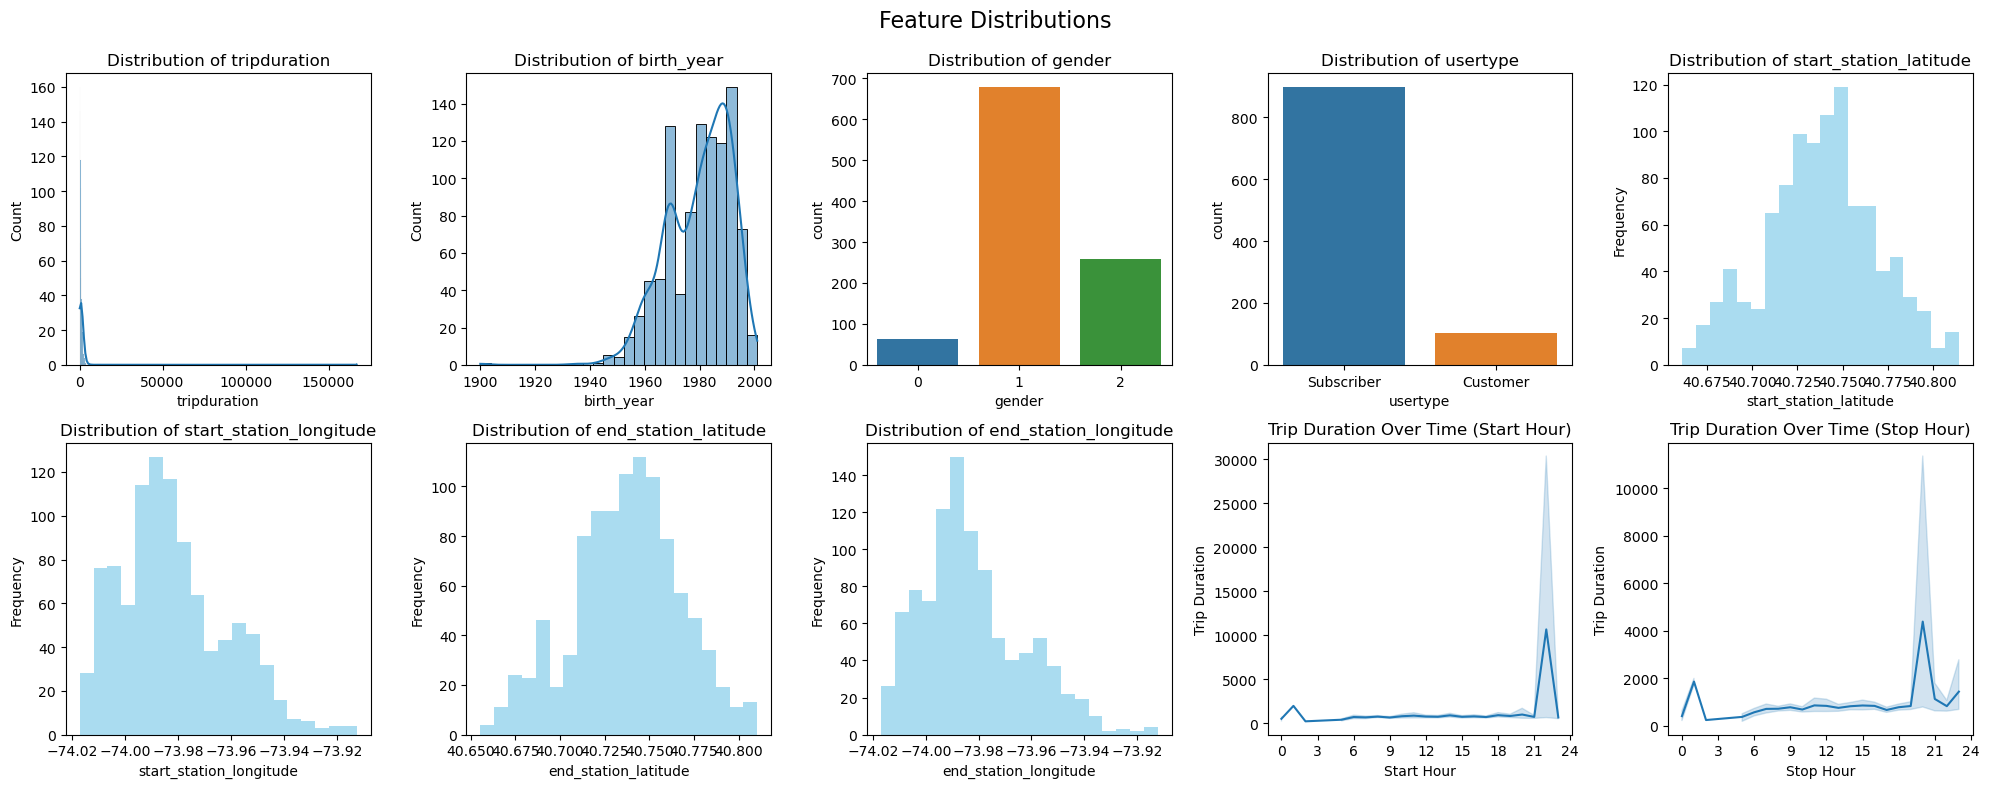

In [10]:
warnings.filterwarnings('ignore')

# Create subset for this section
subset = data.sample(n=1000, random_state=1)

# Convert 'starttime' and 'stoptime' to datetime format
subset['starttime'] = pd.to_datetime(subset['starttime'])
subset['stoptime'] = pd.to_datetime(subset['stoptime'])

# Extract hour from datetime features
subset['start_hour'] = subset['starttime'].dt.hour
subset['stop_hour'] = subset['stoptime'].dt.hour

# Create a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Feature Distributions", fontsize=16)

# Plot numerical feature distributions
numerical_features = ['tripduration', 'birth_year']
for i, feature in enumerate(numerical_features):
    row, col = i // 5, i % 5
    sns.histplot(subset[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Plot categorical feature distributions
categorical_features = ['gender', 'usertype']
for i, feature in enumerate(categorical_features):
    row, col = (i + 2) // 5, (i + 2) % 5
    sns.countplot(data=subset, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Plot trip duration over time (start hour)
sns.lineplot(x=subset['start_hour'], y=subset['tripduration'], ax=axes[1, 3])
axes[1, 3].set_title('Trip Duration Over Time (Start Hour)')
axes[1, 3].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axes[1, 3].set_xlabel('Start Hour')
axes[1, 3].set_ylabel('Trip Duration')

# Plot trip duration over time (stop hour)
sns.lineplot(x=subset['stop_hour'], y=subset['tripduration'], ax=axes[1, 4])
axes[1, 4].set_title('Trip Duration Over Time (Stop Hour)')
axes[1, 4].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axes[1, 4].set_xlabel('Stop Hour')
axes[1, 4].set_ylabel('Trip Duration')

# List of numerical features
numerical_features = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']

# Create subplots for each numerical feature
for i, feature in enumerate(numerical_features):
    row, col = (i + 4) // 5, (i + 4) % 5
    axes[row, col].hist(subset[feature], bins=20, color='skyblue', alpha=0.7)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


- ### Calculate basic statistics

In [11]:
# To ignore all warnings
warnings.filterwarnings('ignore')

# Select the specific columns of interest
columns_of_interest = [
    'tripduration',
    'start_station_latitude',
    'start_station_longitude',
    'end_station_latitude',
    'end_station_longitude',
    'birth_year',
    'gender'
]

# Create a new DataFrame with only the selected columns
selected_data = data[columns_of_interest]

# Calculate the mean for each selected column and round to 3 decimal places
mean_values = selected_data.mean().round(3)

# Calculate the median for each selected column and round to 3 decimal places
median_values = selected_data.median().round(3)

# Calculate the standard deviation for each selected column and round to 3 decimal places
std_deviation = selected_data.std().round(3)

# Calculate the minimum value for each selected column
min_values = selected_data.min()

# Calculate the maximum value for each selected column
max_values = selected_data.max()

# Format the Maximum values to a simpler format
pd.options.display.float_format = '{:.3f}'.format

# Combine the statistics into a summary DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_deviation,
    'Minimum': min_values,
    'Maximum': max_values
})

# Display the summary statistics
summary_stats


Mean   Median  Standard Deviation  Minimum  \
tripduration             988.743  605.000           18895.838   61.000   
start_station_latitude    40.737   40.738               0.032   40.647   
start_station_longitude  -73.983  -73.986               0.019  -74.025   
end_station_latitude      40.737   40.738               0.032   40.647   
end_station_longitude    -73.983  -73.986               0.019  -74.084   
birth_year              1978.993 1981.000              11.929 1885.000   
gender                     1.149    1.000               0.544    0.000   

                             Maximum  
tripduration            19510049.000  
start_station_latitude        45.506  
start_station_longitude      -73.569  
end_station_latitude          45.506  
end_station_longitude        -73.569  
birth_year                  2002.000  
gender                         2.000

## Dataset cleaning

The preprocessing of the dataset involved the elimination of missing values, the conversion of start and stop times to the datetime data type, and the removal of outliers using the Interquartile Range (IQR) method.


- ### Remove rows with NA

In [12]:
# Remove rows with non-finite values in 'start_station_id' and 'end_station_id'
data = data.dropna(subset=['start_station_id', 'end_station_id'])

# Reset the index after removing rows
data = data.reset_index(drop=True)

# Check the updated data to ensure those rows are removed
data.shape

(17545842, 14)

- ### Convert 'starttime' and 'stoptime' columns to datetime data type

In [13]:
# Convert 'starttime' and 'stoptime' columns to datetime data type
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])

# Convert 'start_station_id' and 'end_station_id' columns to integer data type
data['start_station_id'] = data['start_station_id'].astype(int)
data['end_station_id'] = data['end_station_id'].astype(int)

# Verify the data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17545842 entries, 0 to 17545841
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Unnamed: 0               int64         
 1   tripduration             int64         
 2   starttime                datetime64[ns]
 3   stoptime                 datetime64[ns]
 4   start_station_id         int32         
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           int32         
 8   end_station_latitude     float64       
 9   end_station_longitude    float64       
 10  bikeid                   int64         
 11  usertype                 object        
 12  birth_year               int64         
 13  gender                   int64         
dtypes: datetime64[ns](2), float64(4), int32(2), int64(5), object(1)
memory usage: 1.7+ GB


- ### Outliers removal with IQR method

In [14]:
numerical_features = ['tripduration', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year']

# Calculate the IQR for each feature
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define a lower bound and upper bound to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each feature
outliers = ((data[numerical_features] < lower_bound) | (data[numerical_features] > upper_bound))

# Filter the DataFrame to exclude rows with any outliers
filtered_data = data[~outliers.any(axis=1)]

#### Boxplot before - after

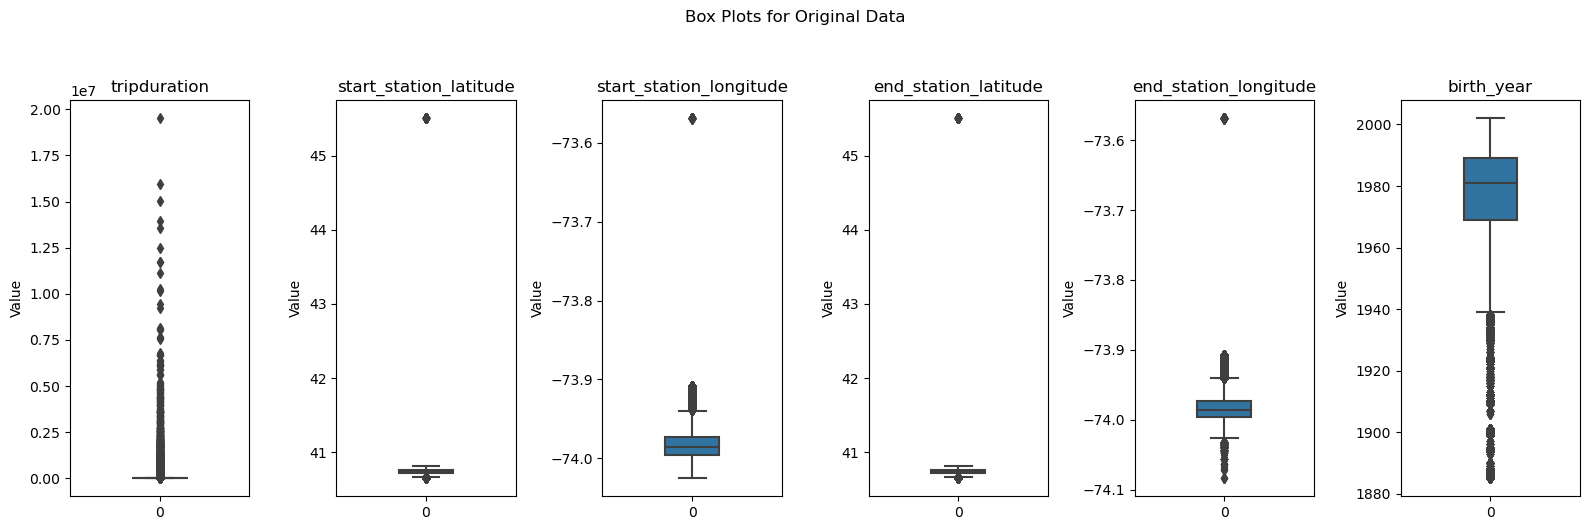

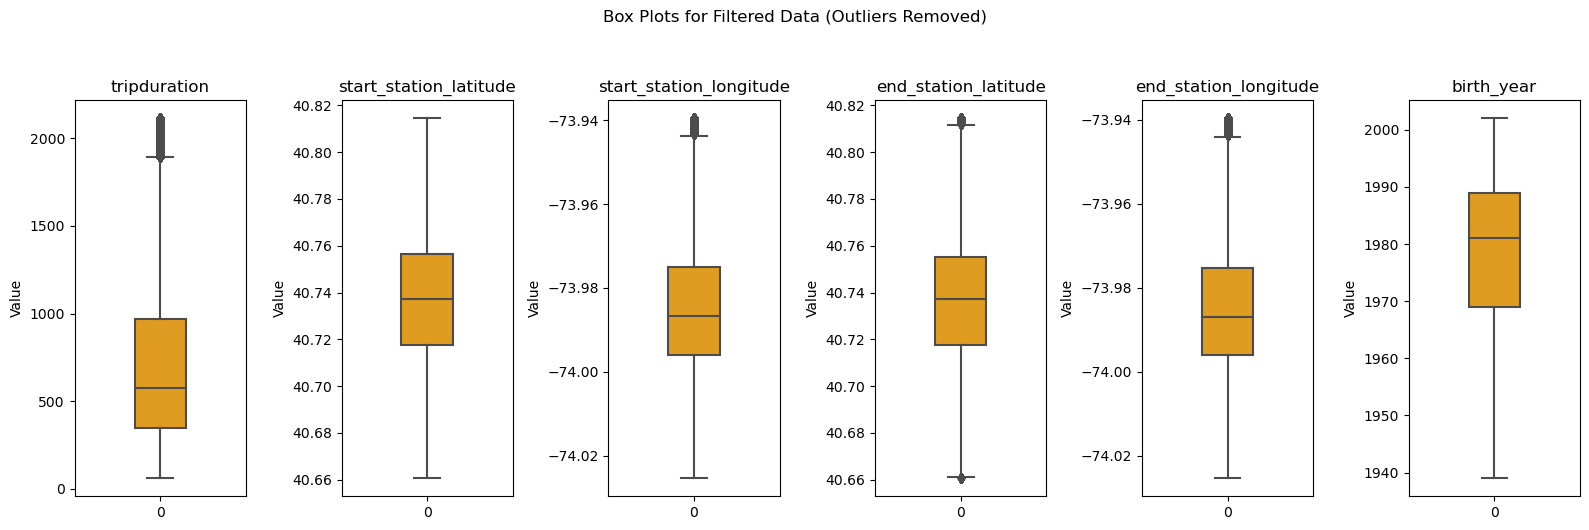

In [15]:
numerical_features = ['tripduration', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year']

# Create subplots for each numerical feature
fig, axs = plt.subplots(1, len(numerical_features), figsize=(16, 5))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(data=data[feature], width=0.3)
    plt.title(f'{feature}')
    plt.ylabel('Value')

# Show the original data
plt.suptitle('Box Plots for Original Data', y=1.05)
plt.tight_layout()

# Create subplots for filtered data (outliers removed)
fig, axs = plt.subplots(1, len(numerical_features), figsize=(16, 5))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(data=filtered_data[feature], width=0.3, color='orange')
    plt.title(f'{feature}')
    plt.ylabel('Value')

# Show the filtered data
plt.suptitle('Box Plots for Filtered Data (Outliers Removed)', y=1.05)
plt.tight_layout()
plt.show()


In [16]:
print(f'Before: {data.shape}')
print(f'After: {filtered_data.shape}')

Before: (17545842, 14)
After: (16175984, 14)


From boxplots comparing after and before ouliers removal it's possible to see that all users born from 1880 to 1940 have been removed: this is useful because it was unlikely that those users are still using the bikes therefore there is no interest in using these data to predict actual bikes demand and seasonal trends.

### Distribution plots for all the features (subset) : after cleaning

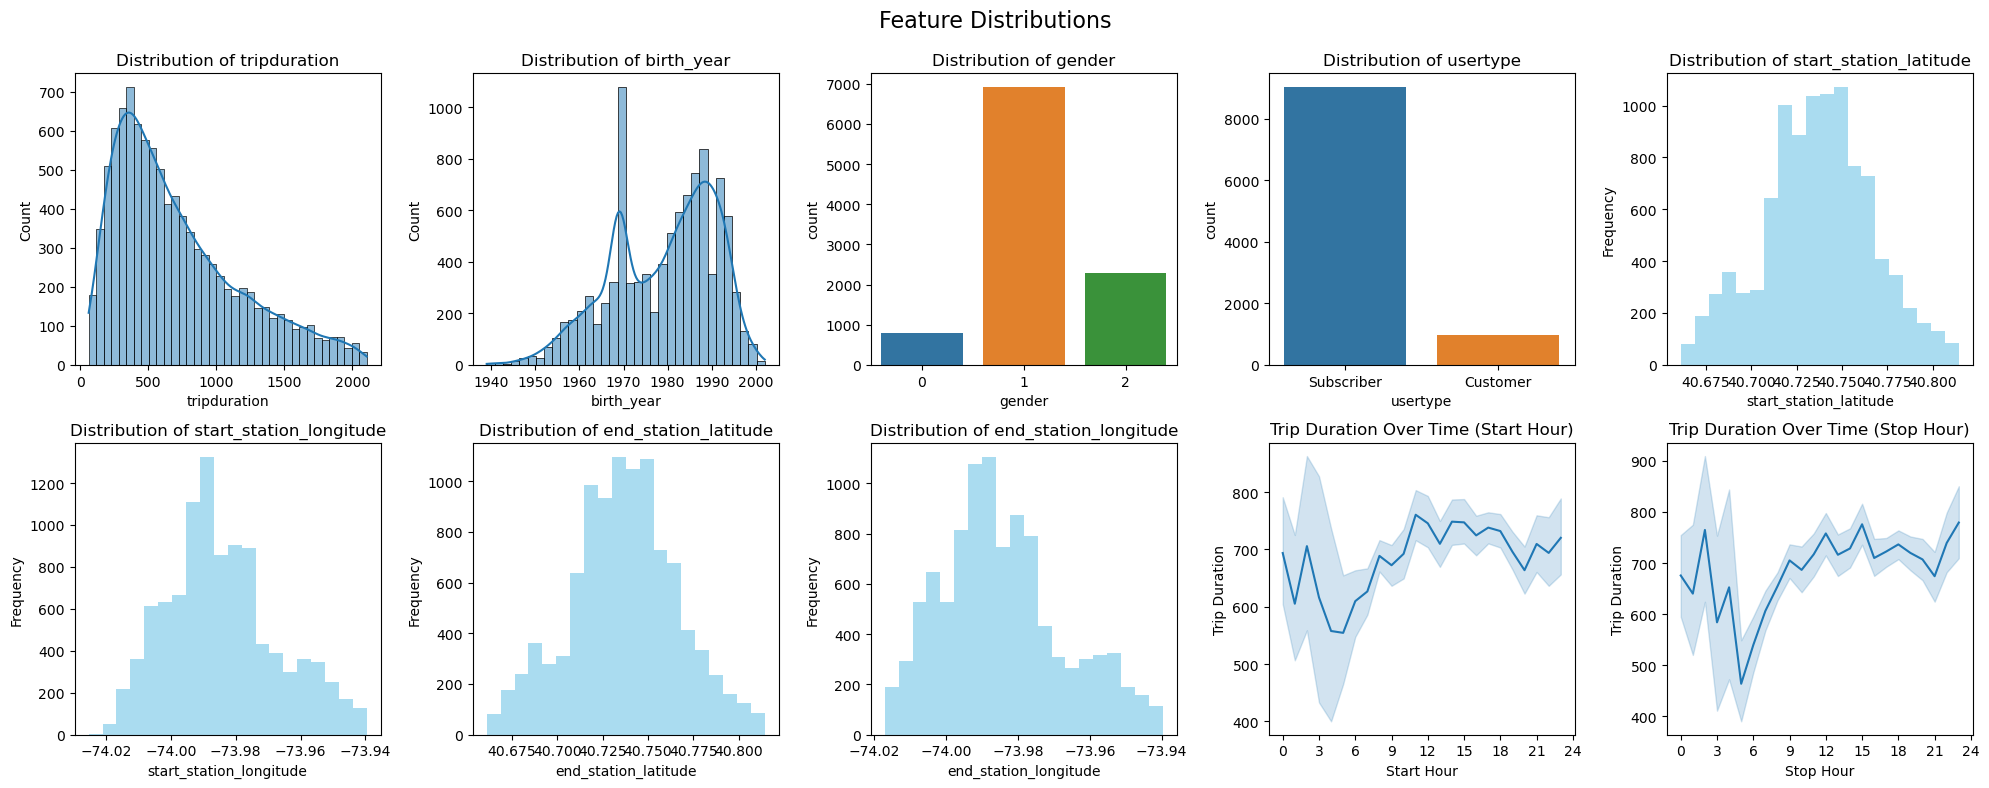

In [17]:
warnings.filterwarnings('ignore')

# Create subset for this section
subset = filtered_data.sample(n=10000, random_state=1)

# Convert 'starttime' and 'stoptime' to datetime format
subset['starttime'] = pd.to_datetime(subset['starttime'])
subset['stoptime'] = pd.to_datetime(subset['stoptime'])

# Extract hour from datetime features
subset['start_hour'] = subset['starttime'].dt.hour
subset['stop_hour'] = subset['stoptime'].dt.hour

# Create a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Feature Distributions", fontsize=16)

# Plot numerical feature distributions
numerical_features = ['tripduration', 'birth_year']
for i, feature in enumerate(numerical_features):
    row, col = i // 5, i % 5
    sns.histplot(subset[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Plot categorical feature distributions
categorical_features = ['gender', 'usertype']
for i, feature in enumerate(categorical_features):
    row, col = (i + 2) // 5, (i + 2) % 5
    sns.countplot(data=subset, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Plot trip duration over time (start hour)
sns.lineplot(x=subset['start_hour'], y=subset['tripduration'], ax=axes[1, 3])
axes[1, 3].set_title('Trip Duration Over Time (Start Hour)')
axes[1, 3].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axes[1, 3].set_xlabel('Start Hour')
axes[1, 3].set_ylabel('Trip Duration')

# Plot trip duration over time (stop hour)
sns.lineplot(x=subset['stop_hour'], y=subset['tripduration'], ax=axes[1, 4])
axes[1, 4].set_title('Trip Duration Over Time (Stop Hour)')
axes[1, 4].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axes[1, 4].set_xlabel('Stop Hour')
axes[1, 4].set_ylabel('Trip Duration')

# List of numerical features
numerical_features = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']

# Create subplots for each numerical feature
for i, feature in enumerate(numerical_features):
    row, col = (i + 4) // 5, (i + 4) % 5
    axes[row, col].hist(subset[feature], bins=20, color='skyblue', alpha=0.7)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


#### Calculate basic statistics (subset)

In [18]:
# To ignore all warnings
warnings.filterwarnings('ignore')

# Select the specific columns of interest
columns_of_interest = [
    'tripduration',
    'start_station_latitude',
    'start_station_longitude',
    'end_station_latitude',
    'end_station_longitude',
    'birth_year',
    'gender'
]

# Create a new DataFrame with only the selected columns
selected_data = filtered_data[columns_of_interest]

# Calculate the mean for each selected column and round to 3 decimal places
mean_values = selected_data.mean().round(3)

# Calculate the median for each selected column and round to 3 decimal places
median_values = selected_data.median().round(3)

# Calculate the standard deviation for each selected column and round to 3 decimal places
std_deviation = selected_data.std().round(3)

# Calculate the minimum value for each selected column
min_values = selected_data.min()

# Calculate the maximum value for each selected column
max_values = selected_data.max()

# Format the Maximum values to a simpler format
pd.options.display.float_format = '{:.3f}'.format

# Combine the statistics into a summary DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_deviation,
    'Minimum': min_values,
    'Maximum': max_values
})

# Display the summary statistics
summary_stats


Mean   Median  Standard Deviation  Minimum  \
tripduration             708.034  577.000             465.479   61.000   
start_station_latitude    40.737   40.737               0.030   40.661   
start_station_longitude  -73.984  -73.987               0.017  -74.025   
end_station_latitude      40.736   40.737               0.030   40.661   
end_station_longitude    -73.984  -73.987               0.017  -74.025   
birth_year              1979.073 1981.000              11.743 1939.000   
gender                     1.156    1.000               0.533    0.000   

                         Maximum  
tripduration            2113.000  
start_station_latitude    40.814  
start_station_longitude  -73.940  
end_station_latitude      40.814  
end_station_longitude    -73.940  
birth_year              2002.000  
gender                     2.000

After cleaning it's possible to notice that all variables are now better distributed. 'Tripduration', 'start time' and 'end time' are no longer shrinked by outliers. Start and end latitude and longitude variables are now less right/left skewed and show more a 'normal distribution shape'.

## Correlation Matrix
Variables are not very much correlated, for prediction chanllenge we will create lagged variables and re-analyze correlation among the features.

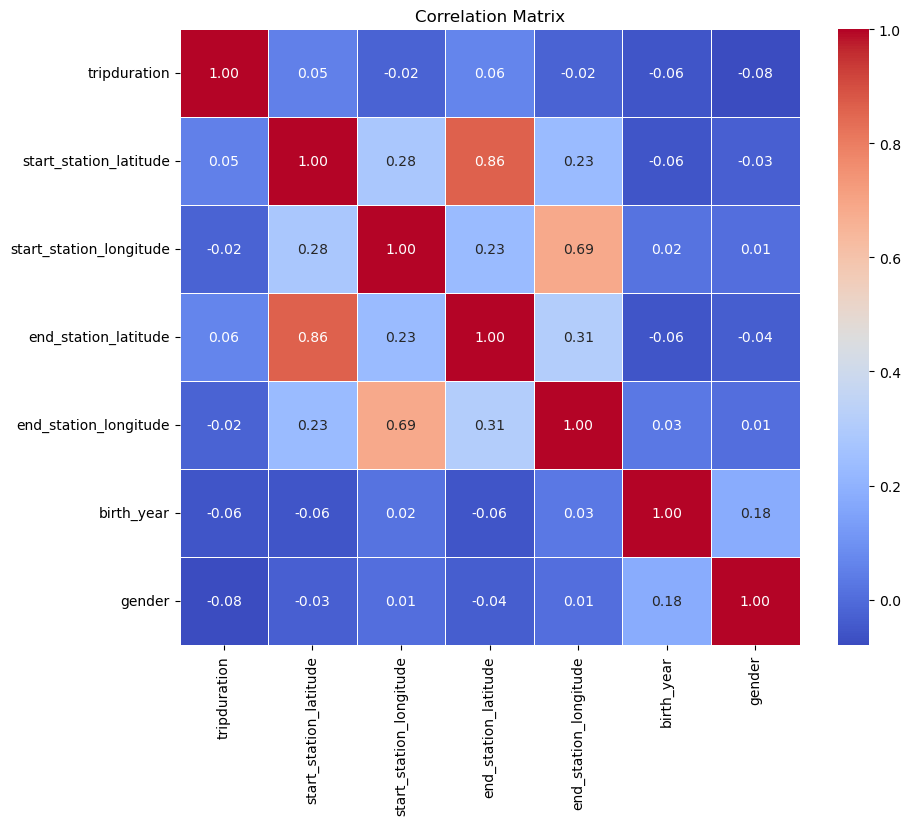

In [19]:
# Specify the columns of interest
columns_of_interest = ['tripduration', 'start_station_latitude', 'start_station_longitude',
                        'end_station_latitude', 'end_station_longitude', 'birth_year', 'gender']

# Calculate the correlation matrix
correlation_matrix = subset[columns_of_interest].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


_____________________________________________________________________________________________________________________________
# 2.Prediction challenge

# 2.a. Clustering
Clustering has been performed using K-means algorithm. The result shown below is K-means with k = 20, which is the final result we decided to use for next steps.
Following, we present the cluster selection analysis. This was performed on a subset of the dataset for computational reason. Here we performed clustering for different K values and evaluated it with different metrics: elbow method, silhouette and distortion.

Given that both the elbow method and silhouette scores analysis do not provide a clear and distinct value for choosing the number of clusters, we are facing a situation where there might not be a single "optimal" number of clusters.
This is expectable as we are clustering only by latitute and longitude so ideally the optimal clusters would be the single coordinates. 
Therefore we decided to use k = 20 for the next steps, after verifying that the provided clustering respects geographical boundaries, thus being meaningful.
A clustering meaningful evaluation is going to be developed on the exploratory component.

#### Libraries 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
import pickle
from sklearn.metrics import silhouette_samples, silhouette_score

In [21]:
filtered_data.head(10)

Unnamed: 0  tripduration               starttime                stoptime  \
0           0           970 2018-01-01 13:50:57.434 2018-01-01 14:07:08.186   
1           1           723 2018-01-01 15:33:30.182 2018-01-01 15:45:33.341   
2           2           496 2018-01-01 15:39:18.337 2018-01-01 15:47:35.172   
3           3           306 2018-01-01 15:40:13.372 2018-01-01 15:45:20.191   
4           4           306 2018-01-01 18:14:51.568 2018-01-01 18:19:57.642   
5           5          1602 2018-01-01 21:31:54.192 2018-01-01 21:58:36.353   
6           6           722 2018-01-02 07:54:53.646 2018-01-02 08:06:55.872   
7           7           434 2018-01-02 08:06:14.331 2018-01-02 08:13:28.767   
8           8           366 2018-01-02 08:10:15.255 2018-01-02 08:16:21.896   
9           9           324 2018-01-02 08:13:30.896 2018-01-02 08:18:55.120   

   start_station_id  start_station_latitude  start_station_longitude  \
0                72                  40.767                  -73.994   
1                72                  40.767                  -73.994   
2                72                  40.767                  -73.994   
3                72                  40.767                  -73.994   
4                72                  40.767                  -73.994   
5                72                  40.767                  -73.994   
6                72                  40.767                  -73.994   
7                72                  40.767                  -73.994   
8                72                  40.767                  -73.994   
9                72                  40.767                  -73.994   

   end_station_id  end_station_latitude  end_station_longitude  bikeid  \
0             505                40.749                -73.988   31956   
1            3255                40.751                -73.995   32536   
2             525                40.756                -74.002   16069   
3             447                40.764                -73.985   31781   
4            3356                40.775                -73.985   30319   
5             482                40.739                -73.999   30106   
6             228                40.755                -73.972   32059   
7             173                40.761                -73.985   30525   
8             479                40.760                -73.991   27439   
9             450                40.762                -73.988   30892   

     usertype  birth_year  gender  
0  Subscriber        1992       1  
1  Subscriber        1969       1  
2  Subscriber        1956       1  
3  Subscriber        1974       1  
4  Subscriber        1992       1  
5  Subscriber        1968       1  
6  Subscriber        1978       1  
7  Subscriber        1983       1  
8  Subscriber        1974       1  
9  Subscriber        1947       1

- ### Clustering - KMeans = 20, final clustering

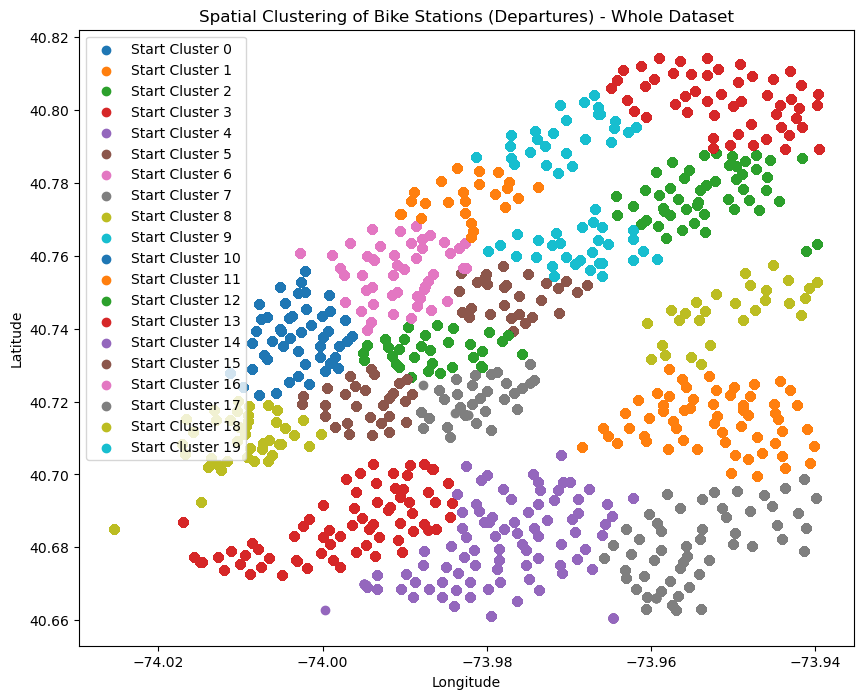

In [22]:
# To ignore all warnings
warnings.filterwarnings('ignore')

# Data Preparation for the Whole Dataset
start_stations_df = filtered_data[['start_station_latitude', 'start_station_longitude']]


# Determine the Number of Clusters
n_clusters = 20  # Adjust the number of clusters as needed

# Perform Clustering for Start Stations in the Whole Dataset
start_kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(start_stations_df)



# Visualization for the Whole Dataset
plt.figure(figsize=(10, 8))

# Visualization start stations in the whole dataset
for i in range(n_clusters):
    start_cluster_data = filtered_data[start_kmeans.labels_ == i]

    # Plot start stations
    plt.scatter(start_cluster_data['start_station_longitude'], start_cluster_data['start_station_latitude'], label=f'Start Cluster {i}')


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Clustering of Bike Stations (Departures) - Whole Dataset')
plt.legend()
plt.show()


- ### Create subset for evaluation metrics and k selection

In [23]:
subset_size = 1000
subset = filtered_data.sample(n=subset_size, random_state=1)

- ### Elbow method for determining the optimal number of clusters

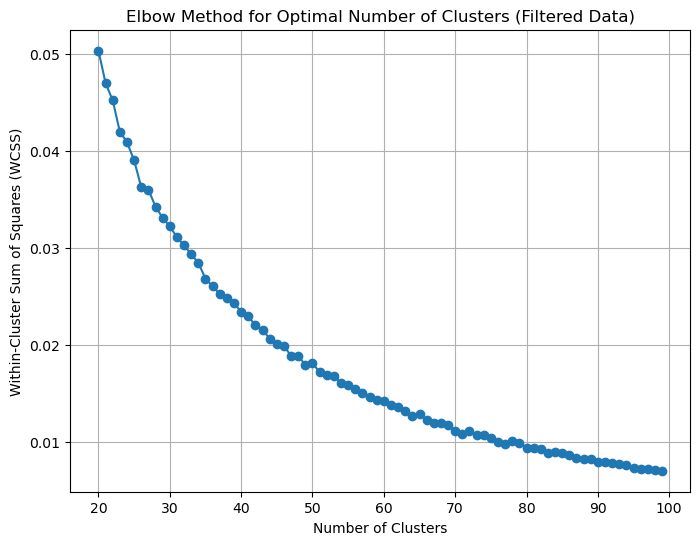

In [24]:
from joblib import Parallel, delayed

start_stations_subset = subset[['start_station_latitude', 'start_station_longitude']]

# Function to calculate WCSS for a given number of clusters
def calculate_wcss(n_clusters, start_stations_subset):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(start_stations_subset)
    return kmeans.inertia_

# Number of clusters range
cluster_range = range(20, 100)

# Use joblib to parallelize the computation
wcss = Parallel(n_jobs=-1)(
    delayed(calculate_wcss)(n_clusters, start_stations_subset) for n_clusters in cluster_range
)

# Plot the WCSS for different numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters (Filtered Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


- ### Silhouette scores k 20 - 30

Clusters: 20 - Silhouette Score: 0.3926 - Time: 0.13 seconds
Clusters: 21 - Silhouette Score: 0.3886 - Time: 0.11 seconds
Clusters: 22 - Silhouette Score: 0.3948 - Time: 0.17 seconds
Clusters: 23 - Silhouette Score: 0.4006 - Time: 0.16 seconds
Clusters: 24 - Silhouette Score: 0.3892 - Time: 0.19 seconds
Clusters: 25 - Silhouette Score: 0.3832 - Time: 0.13 seconds
Clusters: 26 - Silhouette Score: 0.3985 - Time: 0.19 seconds
Clusters: 27 - Silhouette Score: 0.3849 - Time: 0.20 seconds
Clusters: 28 - Silhouette Score: 0.3902 - Time: 0.14 seconds
Clusters: 29 - Silhouette Score: 0.3915 - Time: 0.15 seconds
Clusters: 30 - Silhouette Score: 0.3925 - Time: 0.13 seconds


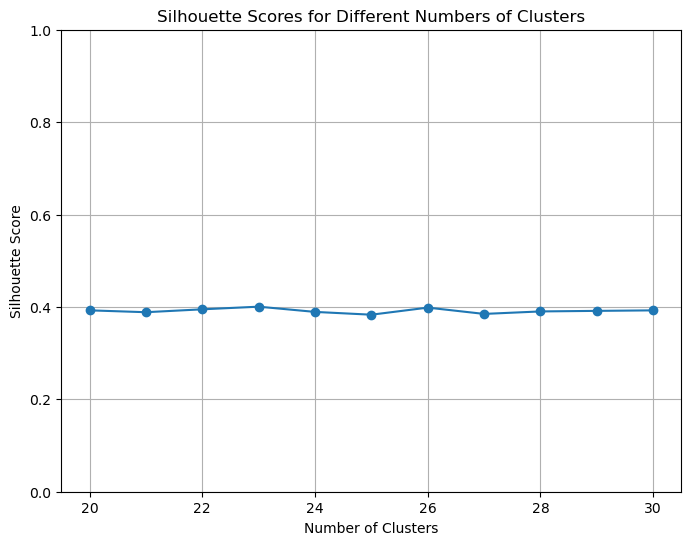

In [25]:
import joblib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time
from sklearn import metrics
import matplotlib.pyplot as plt

# Initialize lists to store silhouette scores and times
silhouette_scores = []

# Define the range of cluster numbers
cluster_range = range(20, 31)

# Function to calculate silhouette score for a given number of clusters
def calculate_silhouette_score(n_clusters, start_stations_subset):
    start_time = time.time()
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(start_stations_subset)

    silhouette_avg = metrics.silhouette_score(start_stations_subset, cluster_labels, metric='euclidean', sample_size=len(cluster_labels))
    
    elapsed_time = time.time() - start_time
    
    return n_clusters, silhouette_avg, elapsed_time

# Parallelize the computation using joblib
results = joblib.Parallel(n_jobs=-1)(
    joblib.delayed(calculate_silhouette_score)(n_clusters, start_stations_subset)
    for n_clusters in cluster_range
)

# Print and plot silhouette scores
for result in results:
    n_clusters, silhouette_avg, elapsed_time = result
    print(f"Clusters: {n_clusters} - Silhouette Score: {silhouette_avg:.4f} - Time: {elapsed_time:.2f} seconds")
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid(True)
plt.show()


- ### Silhouette plots for k 20 -30

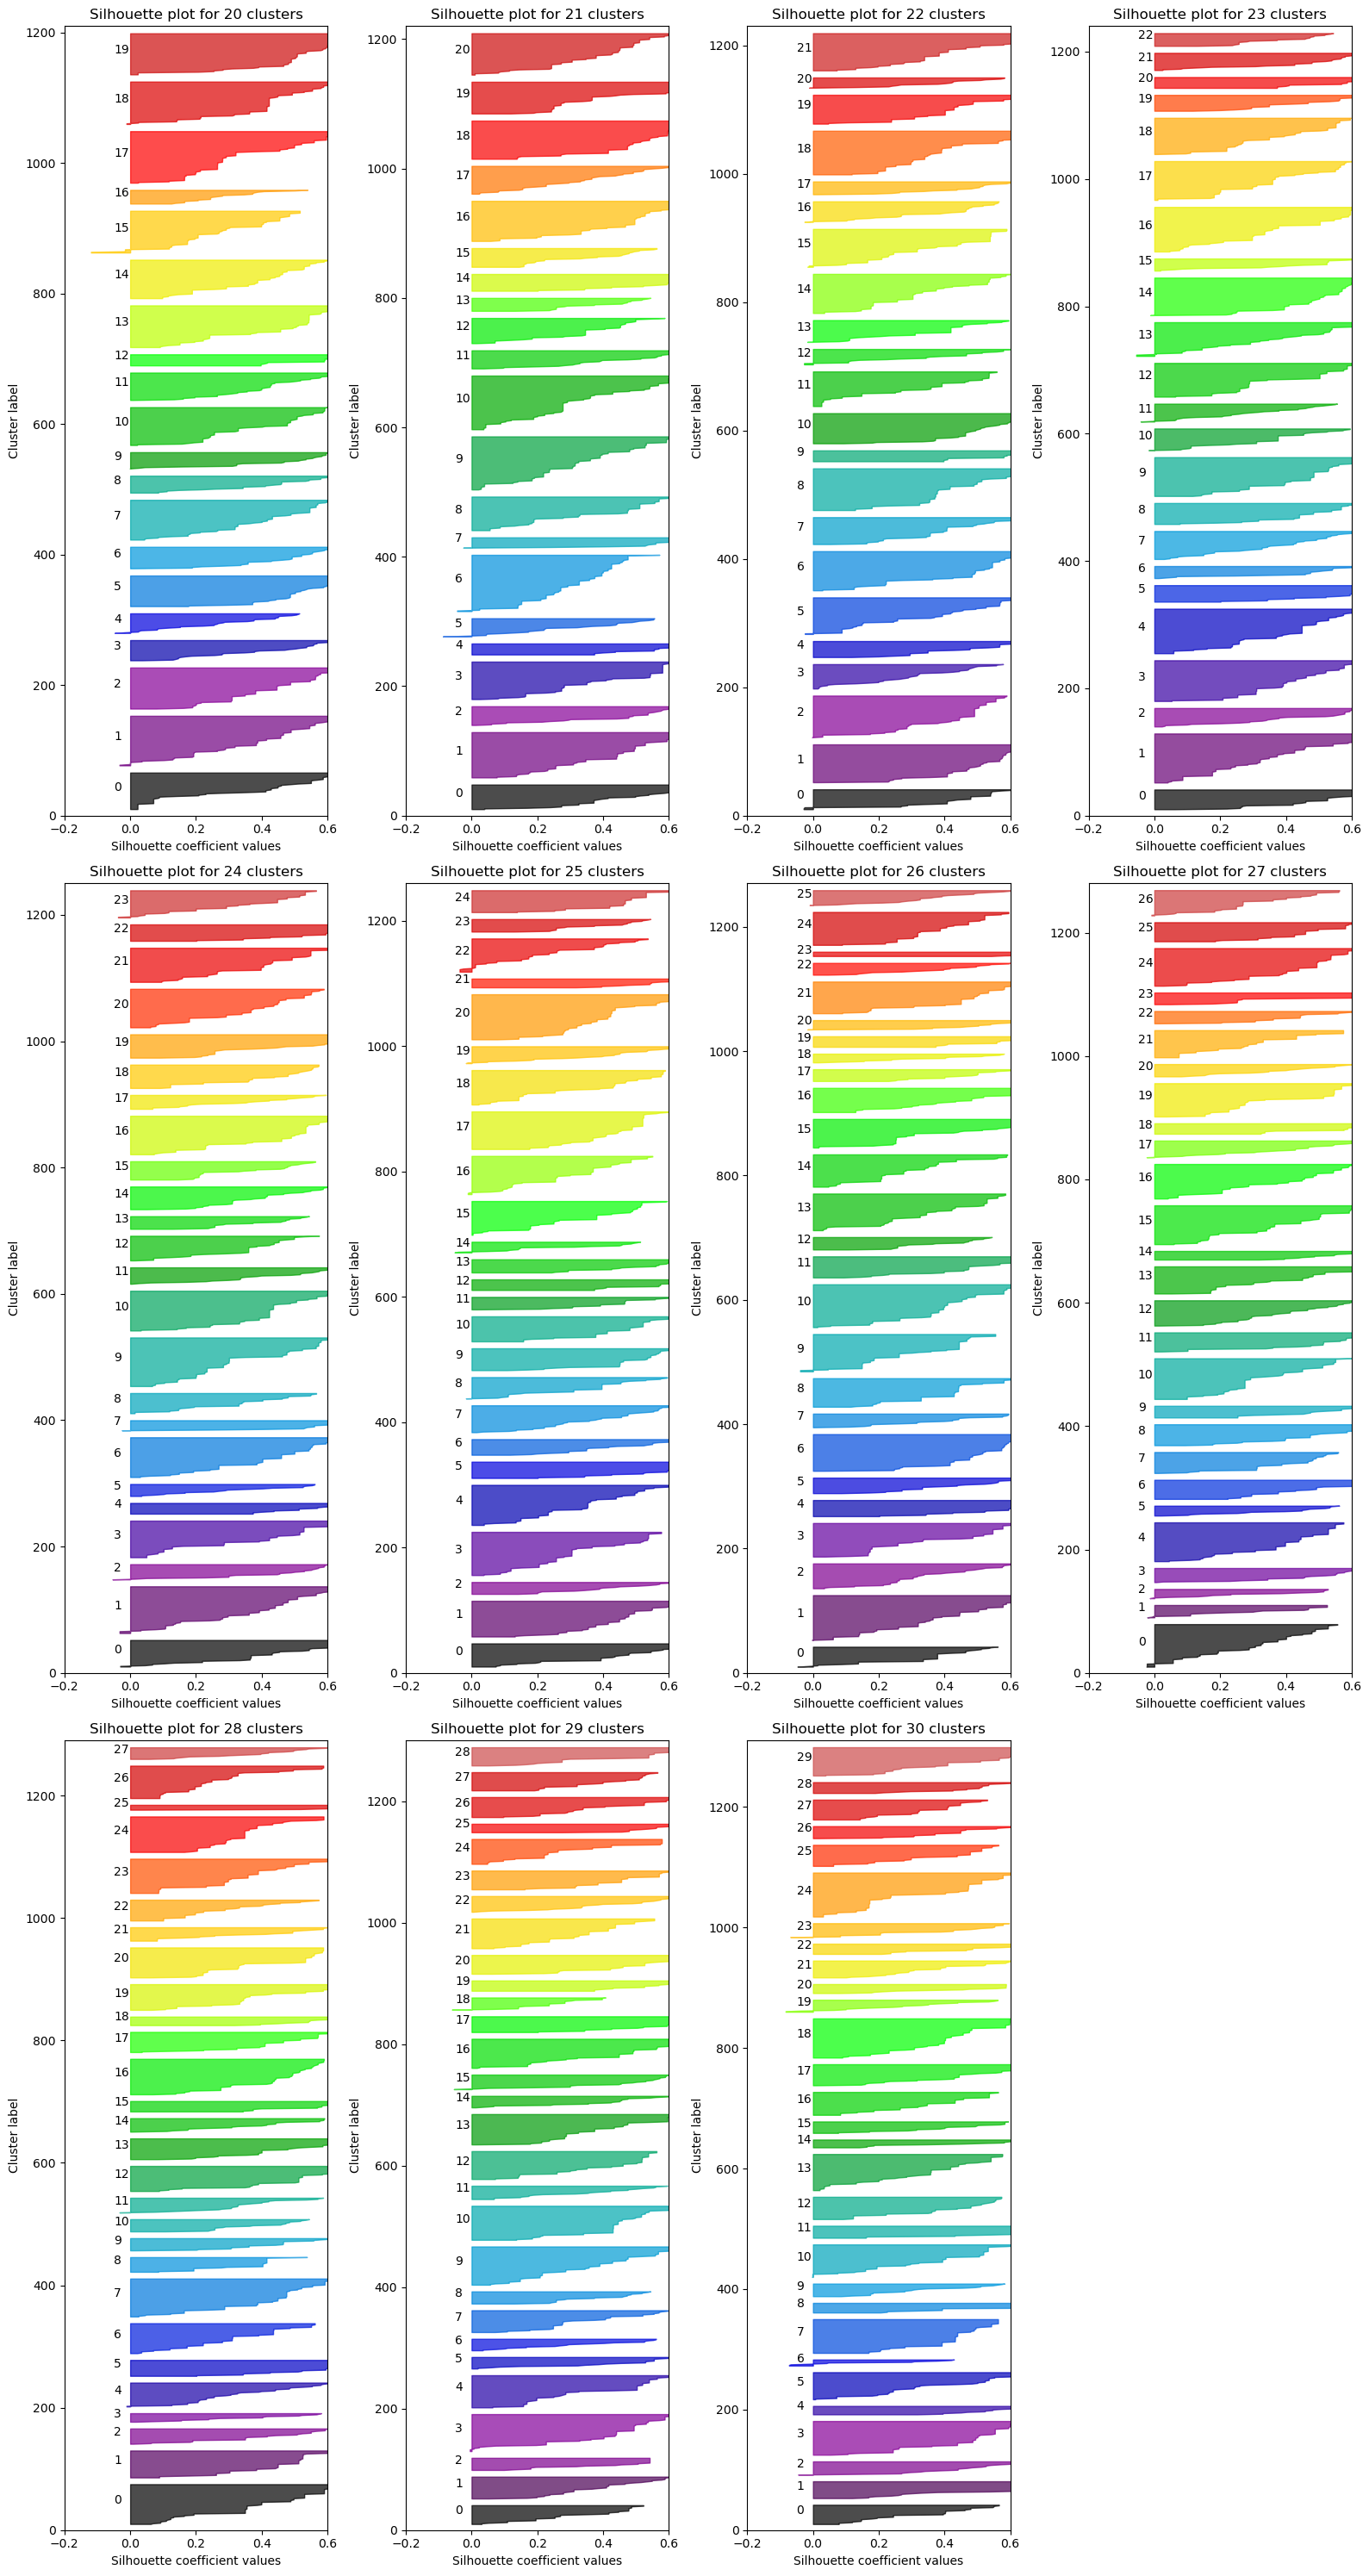

In [26]:
from joblib import Parallel, delayed

# Function to calculate silhouette score for a given number of clusters
def calculate_silhouette_score(k, start_stations_subset):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(start_stations_subset)
    silhouette_avg = silhouette_score(start_stations_subset, cluster_labels)
    print(f"For k = {k}, the average silhouette score is: {silhouette_avg}")
    return silhouette_avg

# Number of clusters range
k_values = range(20, 31)

# Use joblib to parallelize the computation
silhouette_scores = Parallel(n_jobs=-1)(
    delayed(calculate_silhouette_score)(k, start_stations_subset) for k in k_values
)

# Create subplots for silhouette plots
plt.figure(figsize=(16, 30))

for i, k in enumerate(k_values):
    plt.subplot(3, 4, i + 1)  # Create subplots in a 3x4 grid
    plt.gca().set_xlim([-0.2, 0.6])
    plt.gca().set_ylim([0, len(start_stations_subset) + (k + 1) * 10])

    # Apply KMeans clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(start_stations_subset)

    # Calculate silhouette values for each sample
    sample_silhouette_values = silhouette_samples(start_stations_subset, cluster_labels)

    y_lower = 10
    for j in range(k):
        # Aggregate silhouette scores for samples in the current cluster
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        cluster_silhouette_values.sort()

        size_cluster_j = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.nipy_spectral(float(j) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    plt.title(f"Silhouette plot for {k} clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

plt.tight_layout()
plt.show()


- ### Distortion scores k 20 - 30

Finished for k=20 in 0.1540 seconds
Finished for k=21 in 0.1171 seconds
Finished for k=22 in 0.1247 seconds
Finished for k=23 in 0.0974 seconds
Finished for k=24 in 0.0900 seconds
Finished for k=25 in 0.1211 seconds
Finished for k=26 in 0.1149 seconds
Finished for k=27 in 0.1223 seconds
Finished for k=28 in 0.1257 seconds
Finished for k=29 in 0.1306 seconds


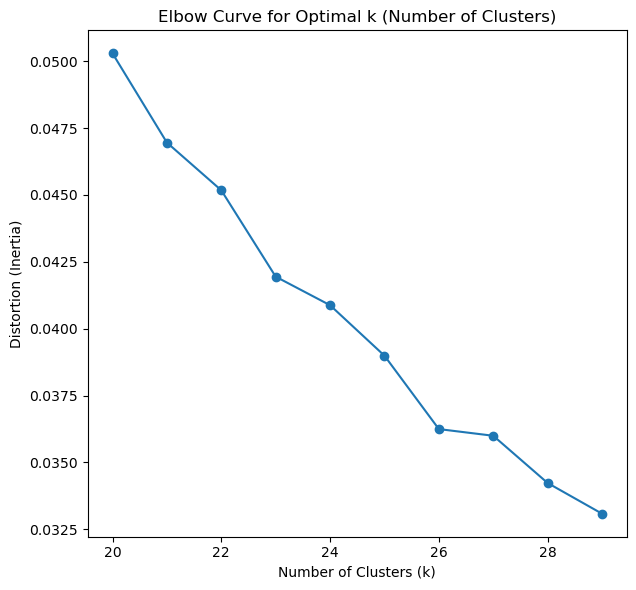

In [27]:
# Plot the distortion for different values of k (number of clusters) and measure time
distortions = []
execution_times = []

for i in range(20, 30):  # You can adjust the range of k as needed
    start_time = time.time()
    
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(start_stations_subset)
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    distortions.append(kmeans.inertia_)
    execution_times.append(execution_time)

    print(f"Finished for k={i} in {execution_time:.4f} seconds")

    
# Plot the final elbow curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(20, 30), distortions, marker='o')
plt.title('Elbow Curve for Optimal k (Number of Clusters)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')

plt.tight_layout()
plt.show()

# 2.b. Data aggregation and prediction

# 2.b.1 Data aggregation

## Clusters with highest demand

Cluster Information:
Cluster 12: 1639781 pickups
Cluster 8: 1151583 pickups
Cluster 15: 1146479 pickups
Cluster 5: 1144053 pickups
Cluster 16: 1141478 pickups
Cluster 6: 1114044 pickups
Cluster 0: 988018 pickups
Cluster 10: 926280 pickups
Cluster 1: 808773 pickups
Cluster 3: 808182 pickups
Cluster 11: 800472 pickups
Cluster 19: 782775 pickups
Cluster 7: 709524 pickups
Cluster 2: 658377 pickups
Cluster 14: 536358 pickups
Cluster 9: 475938 pickups
Cluster 4: 411576 pickups
Cluster 13: 410736 pickups
Cluster 17: 317987 pickups
Cluster 18: 203570 pickups

Two Clusters with highest demand:
Cluster 12: 1639781 pickups
Cluster 8: 1151583 pickups


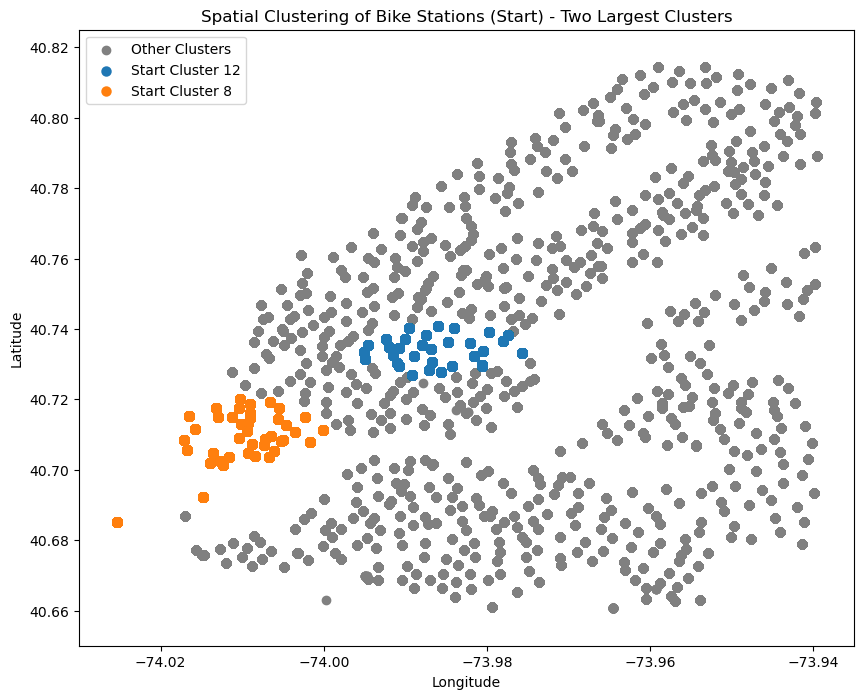

In [28]:
# Predict the clusters for each data point in the filtered_data
filtered_data['start_cluster'] = start_kmeans.predict(filtered_data[['start_station_latitude', 'start_station_longitude']])

# Create a temporary dataframe with columns renamed for end stations
temp_df = filtered_data[['end_station_latitude', 'end_station_longitude']].rename(columns={'end_station_latitude': 'start_station_latitude', 'end_station_longitude': 'start_station_longitude'})

# Predict the end clusters for each data point in the dataset using the same KMeans model
filtered_data['end_cluster'] = start_kmeans.predict(temp_df)

# Find the two clusters with the highest demand
largest_clusters = filtered_data['start_cluster'].value_counts().nlargest(2).index

# Get the number of pickups for each cluster
cluster_sizes = filtered_data['start_cluster'].value_counts()

# Save two clusters with highest demand
clusterA = largest_clusters[0]
clusterB = largest_clusters[1]

# Print information about the clusters
print("Cluster Information:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} pickups")

# Print the two largest clusters
print("\nTwo Clusters with highest demand:")
for cluster in largest_clusters:
    print(f"Cluster {cluster}: {cluster_sizes[cluster]} pickups")

# Set the desired limits for x and y axes
x_limit = (-74.03, -73.935)
y_limit = (40.65, 40.825)

# Plot all data points, coloring the two largest clusters differently
plt.figure(figsize=(10, 8))

# Plot all data points in grey
plt.scatter(filtered_data['start_station_longitude'], filtered_data['start_station_latitude'], color='grey', label='Other Clusters')

# Plot the two largest clusters in different colors
for i, cluster in enumerate(largest_clusters):
    cluster_data = filtered_data[filtered_data['start_cluster'] == cluster]
    plt.scatter(cluster_data['start_station_longitude'], cluster_data['start_station_latitude'], label=f'Start Cluster {cluster}', marker=f'o', linewidth=1.5)

# Set x and y axis limits
plt.xlim(x_limit)
plt.ylim(y_limit)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Clustering of Bike Stations (Start) - Two Largest Clusters')
plt.legend()
plt.show()


- ### Perform Aggregation on dataset

Here we aggregate the data by hour to reduce the dataset complexity and the computational power required for the task. We use the median values for the numerical features and the majority for the categorical ones. Furthermore we calculate the total number of pickups and dropoffs per hour for the two clusters with the highest demand, respectively and save them to the accrding  columns [pickups_cluster_A, pickups_cluster_B,	dropoffs_cluster_A,	dropoffs_cluster_B]. 

In [29]:
filtered_data['start_date_hour'] = pd.to_datetime(filtered_data['starttime']).dt.to_period('H')

# Define continuous and categorical columns
continuous_cols = ['tripduration', 'birth_year', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
categorical_cols = ['gender', 'usertype']

# Find the two largest clusters
clusters = filtered_data['start_cluster'].value_counts().nlargest(2).index

# Initialize columns for pickups and dropoffs in the new DataFrame
for cluster in clusters:
    filtered_data[f'pickups_cluster_{cluster:02d}'] = (filtered_data['start_cluster'] == cluster).astype(int)
    filtered_data[f'dropoffs_cluster_{cluster:02d}'] = (filtered_data['end_cluster'] == cluster).astype(int)

# Aggregate the data
aggregated_data = filtered_data.groupby('start_date_hour').agg({
    **{col: 'median' for col in continuous_cols},
    **{col: lambda x: x.mode()[0] for col in categorical_cols},
    **{f'pickups_cluster_{cluster:02d}': 'sum' for cluster in clusters},
    **{f'dropoffs_cluster_{cluster:02d}': 'sum' for cluster in clusters}
}).reset_index()

# Drop the specified columns
#filtered_data = filtered_data.drop(columns=['pickups_cluster_04', 'dropoffs_cluster_04', 'pickups_cluster_00', 'dropoffs_cluster_00'])

filtered_data = filtered_data[['tripduration', 'starttime', 'stoptime', 'start_station_id', 'start_station_latitude',
                   'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude',
                   'bikeid', 'usertype', 'birth_year', 'gender', 'start_cluster', 'end_cluster', 'start_date_hour']]

# Display the results
aggregated_data.head()

start_date_hour  tripduration  birth_year  start_station_latitude  \
0  2018-01-01 00:00       543.000    1980.000                  40.736   
1  2018-01-01 01:00       400.000    1982.000                  40.734   
2  2018-01-01 02:00       349.000    1983.500                  40.732   
3  2018-01-01 03:00       454.500    1985.000                  40.739   
4  2018-01-01 04:00       415.500    1980.000                  40.732   

   start_station_longitude  end_station_latitude  end_station_longitude  \
0                  -73.983                40.736                -73.980   
1                  -73.987                40.737                -73.984   
2                  -73.982                40.731                -73.980   
3                  -73.986                40.737                -73.984   
4                  -73.988                40.730                -73.979   

   gender    usertype  pickups_cluster_12  pickups_cluster_08  \
0       1  Subscriber                  16                   8   
1       1  Subscriber                  19                   6   
2       1  Subscriber                  10                   4   
3       1  Subscriber                   6                   2   
4       1  Subscriber                   2                   0   

   dropoffs_cluster_12  dropoffs_cluster_08  
0                   18                    5  
1                   30                    7  
2                    8                    5  
3                    9                    2  
4                    2                    0

### Create lagged variables (24hr)

In [30]:
# Find the two largest clusters
clusters = filtered_data['start_cluster'].value_counts().nlargest(2).index

# Create lagged variables for pickups and dropoffs
for cluster in clusters:
    aggregated_data[f'pickups_cluster_{cluster:02d}_lagged_24'] = aggregated_data[f'pickups_cluster_{cluster:02d}'].shift(24)
    aggregated_data[f'dropoffs_cluster_{cluster:02d}_lagged_24'] = aggregated_data[f'dropoffs_cluster_{cluster:02d}'].shift(24)

# Replace NaN values with 0
aggregated_data = aggregated_data.fillna(0)

# Specify the desired column order
desired_columns_order = ['start_date_hour', 'tripduration', 'birth_year', 'start_station_latitude', 'start_station_longitude',
    'end_station_latitude', 'end_station_longitude', 'gender', 'usertype'] + [f'pickups_cluster_{cluster:02d}' for cluster in clusters] + [
    f'dropoffs_cluster_{cluster:02d}' for cluster in clusters] + [
    f'pickups_cluster_{cluster:02d}_lagged_24' for cluster in clusters] + [
    f'dropoffs_cluster_{cluster:02d}_lagged_24' for cluster in clusters]

# Reorder columns
aggregated_data = aggregated_data[desired_columns_order]

# Display the results
aggregated_data.head(10)

start_date_hour  tripduration  birth_year  start_station_latitude  \
0  2018-01-01 00:00       543.000    1980.000                  40.736   
1  2018-01-01 01:00       400.000    1982.000                  40.734   
2  2018-01-01 02:00       349.000    1983.500                  40.732   
3  2018-01-01 03:00       454.500    1985.000                  40.739   
4  2018-01-01 04:00       415.500    1980.000                  40.732   
5  2018-01-01 05:00       427.500    1980.500                  40.733   
6  2018-01-01 06:00       513.000    1981.000                  40.735   
7  2018-01-01 07:00       392.500    1977.500                  40.735   
8  2018-01-01 08:00       432.500    1975.000                  40.734   
9  2018-01-01 09:00       433.500    1977.000                  40.735   

   start_station_longitude  end_station_latitude  end_station_longitude  \
0                  -73.983                40.736                -73.980   
1                  -73.987                40.737                -73.984   
2                  -73.982                40.731                -73.980   
3                  -73.986                40.737                -73.984   
4                  -73.988                40.730                -73.979   
5                  -73.987                40.727                -73.985   
6                  -73.981                40.734                -73.986   
7                  -73.986                40.739                -73.984   
8                  -73.984                40.733                -73.983   
9                  -73.982                40.734                -73.982   

   gender    usertype  pickups_cluster_12  pickups_cluster_08  \
0       1  Subscriber                  16                   8   
1       1  Subscriber                  19                   6   
2       1  Subscriber                  10                   4   
3       1  Subscriber                   6                   2   
4       1  Subscriber                   2                   0   
5       1  Subscriber                   2                   2   
6       1  Subscriber                   5                   1   
7       1  Subscriber                   7                   2   
8       1  Subscriber                  11                   2   
9       1  Subscriber                  14                   4   

   dropoffs_cluster_12  dropoffs_cluster_08  pickups_cluster_12_lagged_24  \
0                   18                    5                         0.000   
1                   30                    7                         0.000   
2                    8                    5                         0.000   
3                    9                    2                         0.000   
4                    2                    0                         0.000   
5                    3                    2                         0.000   
6                    4                    3                         0.000   
7                    6                    1                         0.000   
8                   11                    3                         0.000   
9                   12                    6                         0.000   

   pickups_cluster_08_lagged_24  dropoffs_cluster_12_lagged_24  \
0                         0.000                          0.000   
1                         0.000                          0.000   
2                         0.000                          0.000   
3                         0.000                          0.000   
4                         0.000                          0.000   
5                         0.000                          0.000   
6                         0.000                          0.000   
7                         0.000                          0.000   
8                         0.000                          0.000   
9                         0.000                          0.000   

   dropoffs_cluster_08_lagged_24  
0                          0.000  
1            

- ### Add Weekday and time of the day information to the dataset

In [31]:
# Convert date column to correct format
aggregated_data['start_date_hour'] = aggregated_data['start_date_hour'].dt.to_timestamp()
aggregated_data['weekday'] = aggregated_data['start_date_hour'].dt.weekday

In [32]:
# Weekday function
def weekday_word(weekday):
    if weekday==0:
        return "Monday"
    elif weekday==1:
        return "Tuesday"
    elif weekday==2:
        return "Wednesday"
    elif weekday==3:
        return "Thursday"
    elif weekday==4:
        return "Friday"
    elif weekday==5:
        return "Saturday"
    else:
        return "Sunday"
    
# Time of the day function   
def time_of_day(hour):
    if hour<7:
        return "night"
    elif hour<9:
        return "morning rush"
    elif hour<12:
        return "morning"
    elif hour<14:
        return "lunch time"
    elif hour<17:
        return "afternoon"
    elif hour<20:
        return "afternoon rush"
    elif hour<23:
        return "evening"
    else:
        return "night"

In [33]:
# Add weekday and time of the day columns/information to aggregated data
aggregated_data['wd'] = aggregated_data['weekday'].apply(weekday_word)
aggregated_data['time_of_day'] = aggregated_data['start_date_hour'].dt.hour.apply(time_of_day)
aggregated_data.head(5)

start_date_hour  tripduration  birth_year  start_station_latitude  \
0 2018-01-01 00:00:00       543.000    1980.000                  40.736   
1 2018-01-01 01:00:00       400.000    1982.000                  40.734   
2 2018-01-01 02:00:00       349.000    1983.500                  40.732   
3 2018-01-01 03:00:00       454.500    1985.000                  40.739   
4 2018-01-01 04:00:00       415.500    1980.000                  40.732   

   start_station_longitude  end_station_latitude  end_station_longitude  \
0                  -73.983                40.736                -73.980   
1                  -73.987                40.737                -73.984   
2                  -73.982                40.731                -73.980   
3                  -73.986                40.737                -73.984   
4                  -73.988                40.730                -73.979   

   gender    usertype  pickups_cluster_12  pickups_cluster_08  \
0       1  Subscriber                  16                   8   
1       1  Subscriber                  19                   6   
2       1  Subscriber                  10                   4   
3       1  Subscriber                   6                   2   
4       1  Subscriber                   2                   0   

   dropoffs_cluster_12  dropoffs_cluster_08  pickups_cluster_12_lagged_24  \
0                   18                    5                         0.000   
1                   30                    7                         0.000   
2                    8                    5                         0.000   
3                    9                    2                         0.000   
4                    2                    0                         0.000   

   pickups_cluster_08_lagged_24  dropoffs_cluster_12_lagged_24  \
0                         0.000                          0.000   
1                         0.000                          0.000   
2                         0.000                          0.000   
3                         0.000                          0.000   
4                         0.000                          0.000   

   dropoffs_cluster_08_lagged_24  weekday      wd time_of_day  
0                          0.000        0  Monday       night  
1                          0.000        0  Monday       night  
2                          0.000        0  Monday       night  
3                          0.000        0  Monday       night  
4                          0.000        0  Monday       night

# 2.b.2 Prediction
For this task aggregation_data will be used. We will focus on building a regression model capable of predicting what the demand for a cluster of stations will be over the next 24 hours. This will be done by creating a model that predicts departures(pickups) and one that predicts arrivals(dropoffs) for cluster A and for cluster B.

In [34]:
# import libraries
import pandas as pd
import numpy as np
import pickle
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

## Correlation matrix

We compute the correlation matrix for our aggregated data to identify potential correlations among variables. 

For the prediction of pickups/dropoffs for a cluster we decided to include the respective lagged pickups/dropoffs variable, together with weekday and time of the day information. In addition, from this matrix we observed a high correlation between the lagged variables and tripduration variable and we observed that including it in the model provided a significant increase of around 0.2 in $R^2$  for the models.

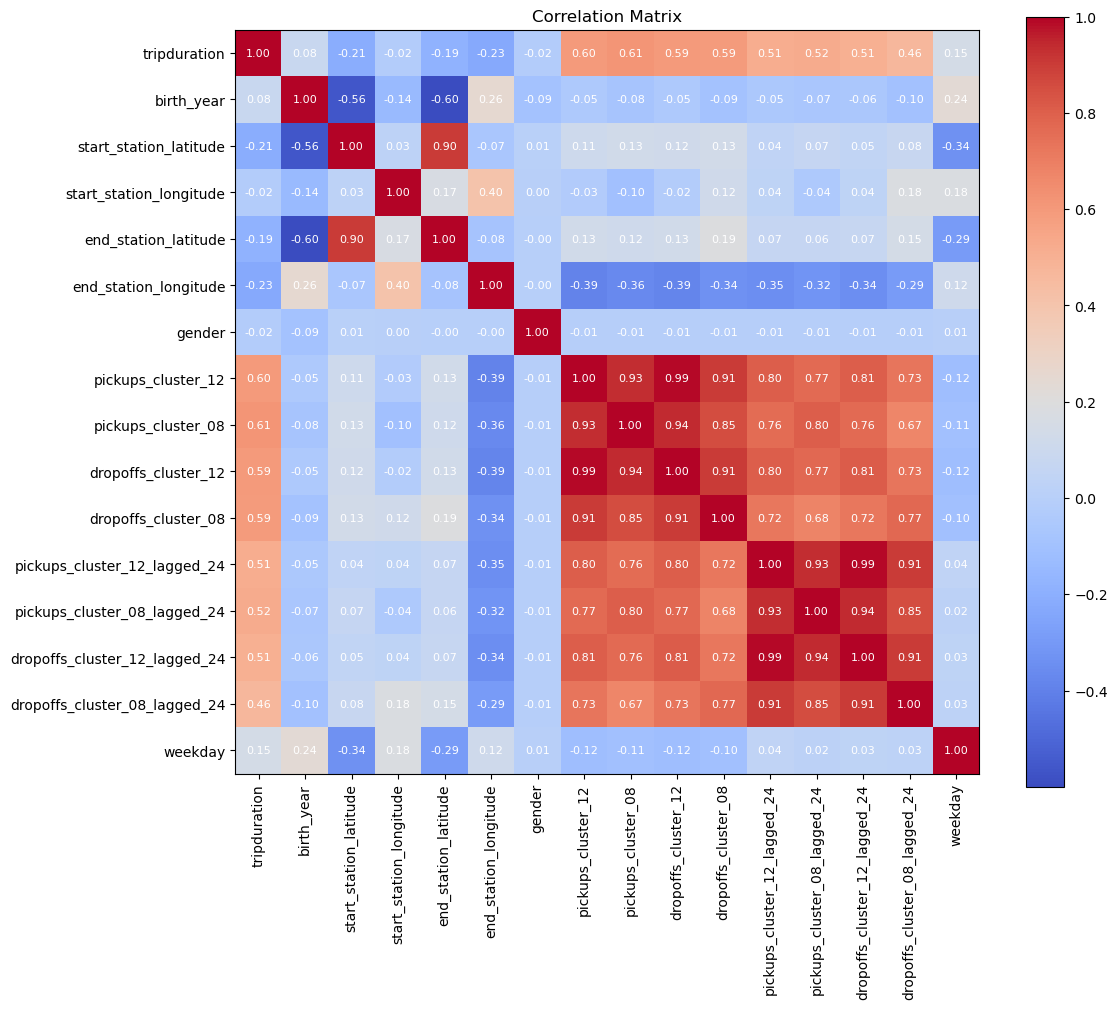

In [35]:
# Select only numerical columns
numerical_columns = aggregated_data.select_dtypes(include=['number']).columns
aggregated_data_numeric = aggregated_data[numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix_numeric = aggregated_data_numeric.corr()

# Plot a heatmap of the correlation matrix using Matplotlib with annotations and outlines
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix_numeric, cmap='coolwarm', interpolation='nearest')

# Add annotations with values
for i in range(len(correlation_matrix_numeric.columns)):
    for j in range(len(correlation_matrix_numeric.columns)):
        plt.text(i, j, f'{correlation_matrix_numeric.iloc[i, j]:.2f}',
                 ha='center', va='center', color='w', fontsize=8)

# Add outlines
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix_numeric.columns)), correlation_matrix_numeric.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix_numeric.columns)), correlation_matrix_numeric.columns)
plt.grid(visible=False)
plt.show()

## Setting up for Prediction

### Split data

The data is split into train (Jan-Oct) and test (Nov-Dec) sets. The numeric features (pickups/dropoffs, trip duration) are standardized. The categorical features, such as time of day, are one-hot encoded to avoid implying a false ordinal relationship and to treat each category independently. Meanwhile, ordinal features like weekday are label encoded (e.g., Monday: 0, Tuesday: 1) to allow the model to capture and understand their inherent ordinal relationship (prep_data function)

In [36]:
def prepare_data(aggregated_data, features, targets):
    train_data = aggregated_data[aggregated_data['start_date_hour'].dt.month <= 10]
    test_data = aggregated_data[aggregated_data['start_date_hour'].dt.month > 10]

    X_train = train_data[features]
    y_train = train_data[targets]

    X_test = test_data[features]
    y_test = test_data[targets]

    numeric_features = [f for f in features if f not in ['time_of_day', 'weekday']]
    categorical_features = ['time_of_day']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features + ['weekday']),  # Include 'weekday' as a numeric feature
            ('cat', OneHotEncoder(), categorical_features)
        ]
    )

    print("Numeric Features:", numeric_features + ['weekday'])
    print("Categorical Features:", categorical_features)

    return X_train, y_train, X_test, y_test, preprocessor

&nbsp;

### Define Models

Our choices for models are Linear Regression and ANN. Linear regression provides a straightforward and interpretable model. It acts as a starting point, allowing us to grasp the fundamental connections in our data. On the other hand, we chose Artificial Neural Networks (ANNs) for their ability to handle more complex relationships in the data. While Linear Regression provides a baseline simplicity, ANNs bring a layer of complexity, enabling us to explore a broader range of patterns in our analysis.

In [37]:
models = {
    'LinearRegression': LinearRegression(),
    'RidgeRegression': Ridge(),
    'NeuralNetwork': MLPRegressor()        
}

&nbsp;

### Define parameters for the models

In [38]:
# For linear regression,  because we have relatively small number of important features and regularization may penalize some of them, we know it could be counterproductive, but we still experiment with a few lambda values using Ridge Regression as well

# Artificial Neural Network (ANN):
# - Hidden Layer Sizes: [25, 50, 100]. We believe this is a good range to start with for a more complex model compared to Linear Regression, exploring different complexities of the neural network.

# - Activation Function: we've chosen 'relu' and 'tanh'. 'Relu' is a common choice for hidden layers as it introduces non-linearity. 'Tanh' can also capture non-linearities and is bounded, which might be useful.

# - Max Iterations: 10,000, it's high enough for the optimization process to converge but not excessively high, preventing long training times.

# - Alpha (Regularization Term): 0.0001 is a small regularization term, which is often a good starting point, that helps prevent overfitting.

# - Shuffle: False. Because of the fact that our data has some temporal order, shuffling is not be suitable.

# - Tolerance (Tol): 1e-4 is a common choice for the convergence tolerance and also the default value.

# - Early Stopping: True. It helps prevent overfitting by stopping training when performance on a validation set stops improving.

# - Validation Fraction and n_iter_no_change: These are related to early stopping. A validation fraction of 0.1 means 10% of the data is used for validation, and n_iter_no_change is the number of epochs with no improvement on the validation set before stopping.

param_grids = {
    'LinearRegression': {},
    'RidgeRegression': {
        'regressor__alpha': [0.1, 1.0, 10.0]  # You can adjust these values
    },
    'NeuralNetwork': {
        'regressor__hidden_layer_sizes': [(25), (50), (100)],
        'regressor__activation': ['relu', 'tanh'],
        'regressor__max_iter': [10000],
        'regressor__alpha': [0.0001],
        'regressor__shuffle': [False],
        'regressor__tol': [1e-4],
        'regressor__early_stopping': [True],
        'regressor__validation_fraction': [0.1],
        'regressor__n_iter_no_change': [5]
    }
}

&nbsp;

### Nested Cross Validation function

We use nested cross-validation to robustly assess the performance of our models and ensure that the evaluation results are not overly optimistic or biased. 

In [39]:
#Initially, we split our data into training and test sets, with the training set containing data from 10 months (labeled as X_train) and the test set holding 
# the remaining 2 months. The nested cross-validation is specifically applied to the training set to identify the best model based on the mean $R^2$ metric
# from the outer folds of the nested CV. Once the optimal model is chosen, we train it using the entire training set (X_train) and use it to predict values on new, 
# unseen data (X_test). This approach ensures a reliable estimation of our model's performance and confirms its suitability for handling new and unseen data.

def train(models, param_grids, X_train, y_train, inner_cv, outer_cv):
    results = {}
    best_model_name = None
    best_mean_r2 = -1  # Initialize to a very low value
    top_models = []

    for model_name, model in models.items():
        print(f'{model_name}:\n')

        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])

        param_grid = param_grids[model_name]
        scorer = make_scorer(r2_score)

        print(f'\t- Setting GridSearchCV for hyperparameter tuning ({model_name})...\n')
        grid_search = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=inner_cv)

        print('\t- Performing Nested CV\n')

        # Evaluate the model with outer cross-validation
        scores = cross_val_score(grid_search, X_train, y_train, cv=outer_cv, scoring='r2')
        mean_r2 = np.mean(scores)
         
        top_models.append((model_name, mean_r2))
        print(f'\t- {model_name}: R-squared scores - {scores}, Mean R-squared: {mean_r2}')

        if mean_r2 > best_mean_r2:
            best_mean_r2 = mean_r2
            best_model_name = model_name
            best_model = grid_search  # Save the best model

        print('-' * 175)
    
    print(f'\nFinal Results Nested CV:')
    
    top_models.sort(key=lambda x: x[1], reverse=True)

    for model_name, mean_r2 in top_models:
        print(f'\t- {model_name}: Mean R-squared: {mean_r2}')

    print(f'\n\033[91mBest Model:\t{best_model_name} with Mean R-squared: {best_mean_r2}\033[0m')
    
    return best_model, best_model_name, best_mean_r2

&nbsp;

## Prediction part

In this section, we perform Nested Cross-Validation to predict pickups and dropoffs separately for the two clusters with the highest demand. Initially, we define features and targets for each cluster.

We then split the data into training and testing sets, select the optimal model through Nested CV, and finally train the chosen model on the training set, as detailed earlier.

Furthermore, we explore the relationship between the actual and predicted values for the test set. To assess the performance of our models, we examine two key metrics: $R^2$ (coefficient of determination) and Root Mean Squared Error (RMSE). We observed the following:

## Cluster A

###  1. Pickups

In [40]:
# Define features and targets
features_1 = [f'pickups_cluster_{clusterA:02d}_lagged_24', 'time_of_day', 'weekday', 'tripduration']
targets_1 = [f'pickups_cluster_{clusterA:02d}']

In [41]:
# Standardize and encode
X_train, y_train, X_test, y_test, preprocessor = prepare_data(aggregated_data, features_1, targets_1)

Numeric Features: ['pickups_cluster_12_lagged_24', 'tripduration', 'weekday']
Categorical Features: ['time_of_day']


In [42]:
# Train model
inner_cv = TimeSeriesSplit(n_splits=10)
outer_cv = TimeSeriesSplit(n_splits=5)

# Use the function for your cases
best_model, best_model_name, best_mean_r2 = train(models, param_grids, X_train, y_train[targets_1[0]], inner_cv, outer_cv)

LinearRegression:

	- Setting GridSearchCV for hyperparameter tuning (LinearRegression)...

	- Performing Nested CV



	- LinearRegression: R-squared scores - [0.66971724 0.72852424 0.75739724 0.75548384 0.75127726], Mean R-squared: 0.7324799641723521
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RidgeRegression:

	- Setting GridSearchCV for hyperparameter tuning (RidgeRegression)...

	- Performing Nested CV

	- RidgeRegression: R-squared scores - [0.66881296 0.72848851 0.75739075 0.75547895 0.75127351], Mean R-squared: 0.7322889360579228
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
NeuralNetwork:

	- Setting GridSearchCV for hyperparameter tuning (NeuralNetwork)...

	- Performing Nested CV

	- NeuralNetwork: R-squared scores - [0.70662845 0.78137799 0.84901436 0.85370302 0.87269134], Mean R-squared: 0.8126830307379971
---------------------------

#### Actual vs Predicted plot for the best model

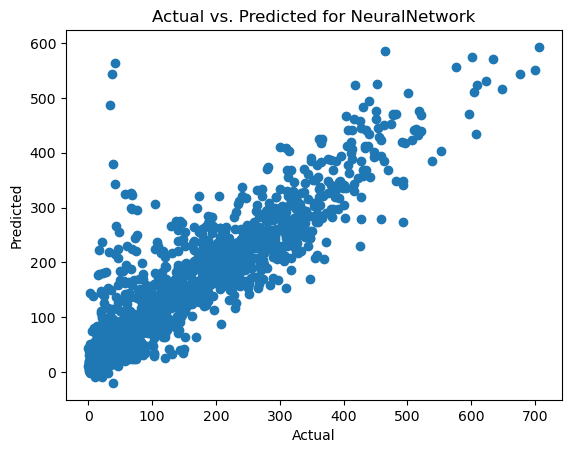

R-squared on the test set: 0.8058350371130322
Mean Squared Error on the test set: 59.60535879824989


In [43]:
# Find the best parameters for the best model found in Nested CV
best_model.fit(X_train, y_train[targets_1[0]])

# Predict on the test set
y_pred_a_p = best_model.predict(X_test)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred_a_p)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted for {best_model_name}')
plt.show()


# Calculate R-squared
test_r2 = r2_score(y_test[targets_1[0]], y_pred_a_p)
print(f"R-squared on the test set: {test_r2}")

# Additional metric (e.g., Mean Squared Error)
mse = np.sqrt(mean_squared_error(y_test[targets_1[0]], y_pred_a_p))
print(f"Mean Squared Error on the test set: {mse}")

#### Learning curves

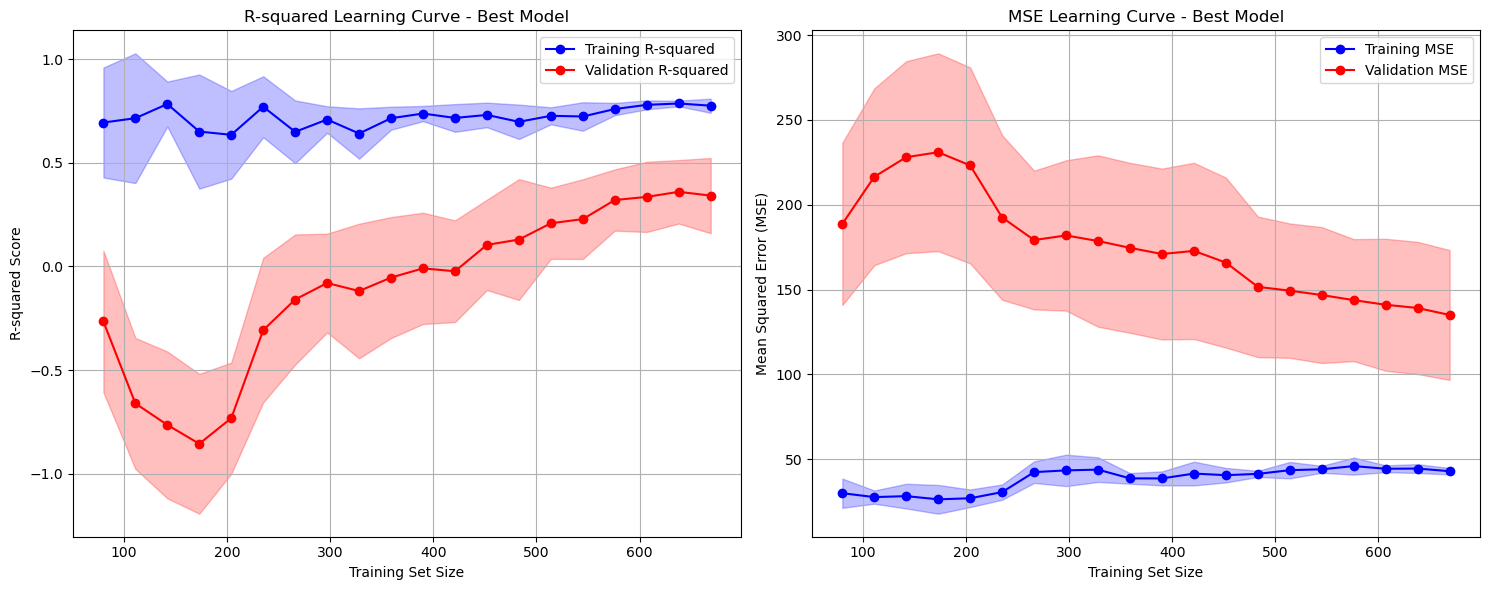

In [44]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_model.best_estimator_.named_steps['regressor'])])

# Plot learning curve for R-squared
train_sizes_r2, train_scores_r2, validation_scores_r2 = learning_curve(
    pipeline, X_train, y_train[targets_1[0]], cv=inner_cv,
    train_sizes=np.linspace(0.12, 1.0, 20), scoring='r2'
)

# Calculate mean and standard deviation for training and validation scores
train_mean_r2 = np.mean(train_scores_r2, axis=1)
train_std_r2 = np.std(train_scores_r2, axis=1)
validation_mean_r2 = np.mean(validation_scores_r2, axis=1)
validation_std_r2 = np.std(validation_scores_r2, axis=1)

# Plot R-squared learning curve
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes_r2, train_mean_r2, label='Training R-squared', color='blue', marker='o')
plt.fill_between(train_sizes_r2, train_mean_r2 - train_std_r2, train_mean_r2 + train_std_r2, color='blue', alpha=0.25)
plt.plot(train_sizes_r2, validation_mean_r2, label='Validation R-squared', color='red', marker='o')
plt.fill_between(train_sizes_r2, validation_mean_r2 - validation_std_r2, validation_mean_r2 + validation_std_r2, color='red', alpha=0.25)
plt.title('R-squared Learning Curve - Best Model')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.legend(loc='best')
plt.grid(True)

# Plot learning curve for MSE
train_sizes_mse, train_scores_mse, validation_scores_mse = learning_curve(
    pipeline, X_train, y_train[targets_1[0]], cv=inner_cv,
    train_sizes=np.linspace(0.12, 1.0, 20), scoring='neg_root_mean_squared_error'  # Use neg_mean_squared_error for MSE
)

# Calculate mean and standard deviation for training and validation scores
train_mean_mse = -np.mean(train_scores_mse, axis=1)  # Multiply by -1 to get positive MSE values
train_std_mse = np.std(train_scores_mse, axis=1)
validation_mean_mse = -np.mean(validation_scores_mse, axis=1)  # Multiply by -1 to get positive MSE values
validation_std_mse = np.std(validation_scores_mse, axis=1)

# Plot MSE learning curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes_mse, train_mean_mse, label='Training MSE', color='blue', marker='o')
plt.fill_between(train_sizes_mse, train_mean_mse - train_std_mse, train_mean_mse + train_std_mse, color='blue', alpha=0.25)
plt.plot(train_sizes_mse, validation_mean_mse, label='Validation MSE', color='red', marker='o')
plt.fill_between(train_sizes_mse, validation_mean_mse - validation_std_mse, validation_mean_mse + validation_std_mse, color='red', alpha=0.25)
plt.title('MSE Learning Curve - Best Model')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

&nbsp;

###  2. Dropoffs

In [45]:
# Define features and targets
features_2 = [f'dropoffs_cluster_{clusterA:02d}_lagged_24', 'time_of_day', 'weekday', 'tripduration']
targets_2 = [f'dropoffs_cluster_{clusterA:02d}']

In [46]:
# Standardize and Encode 
X_train, y_train, X_test, y_test, preprocessor = prepare_data(aggregated_data, features_2, targets_2)

Numeric Features: ['dropoffs_cluster_12_lagged_24', 'tripduration', 'weekday']
Categorical Features: ['time_of_day']


In [47]:
# Train model
inner_cv = TimeSeriesSplit(n_splits=10)
outer_cv = TimeSeriesSplit(n_splits=5)

# Use the function for your cases
best_model, best_model_name, best_mean_r2 = train(models, param_grids, X_train, y_train[targets_2[0]], inner_cv, outer_cv)

LinearRegression:

	- Setting GridSearchCV for hyperparameter tuning (LinearRegression)...

	- Performing Nested CV



	- LinearRegression: R-squared scores - [0.67195755 0.73624851 0.77174633 0.76689486 0.75432947], Mean R-squared: 0.7402353440326738
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RidgeRegression:

	- Setting GridSearchCV for hyperparameter tuning (RidgeRegression)...

	- Performing Nested CV

	- RidgeRegression: R-squared scores - [0.67081589 0.73619742 0.77174029 0.76689015 0.75432563], Mean R-squared: 0.7399938767509171
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
NeuralNetwork:

	- Setting GridSearchCV for hyperparameter tuning (NeuralNetwork)...

	- Performing Nested CV

	- NeuralNetwork: R-squared scores - [0.75448849 0.8089908  0.85815428 0.8599253  0.87341048], Mean R-squared: 0.8309938706799553
---------------------------

#### Actual vs Predicted plot for the best model

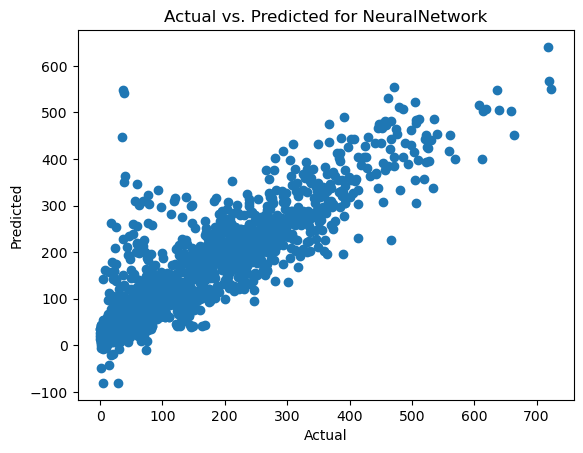

R-squared on the test set: 0.7895936123686215
Root Mean Squared Error on the test set: 63.61133406955281


In [48]:
# Find the best parameters for the best model found in Nested CV
best_model.fit(X_train, y_train[targets_2[0]])

# Predict on the test set
y_pred_a_d = best_model.predict(X_test)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred_a_d)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted for {best_model_name}')
plt.show()


# Calculate R-squared
test_r2 = r2_score(y_test[targets_2[0]], y_pred_a_d)
print(f"R-squared on the test set: {test_r2}")

# Additional metric (e.g., Mean Squared Error)
mse = np.sqrt(mean_squared_error(y_test[targets_2[0]], y_pred_a_d))
print(f"Root Mean Squared Error on the test set: {mse}")

#### Learning curves

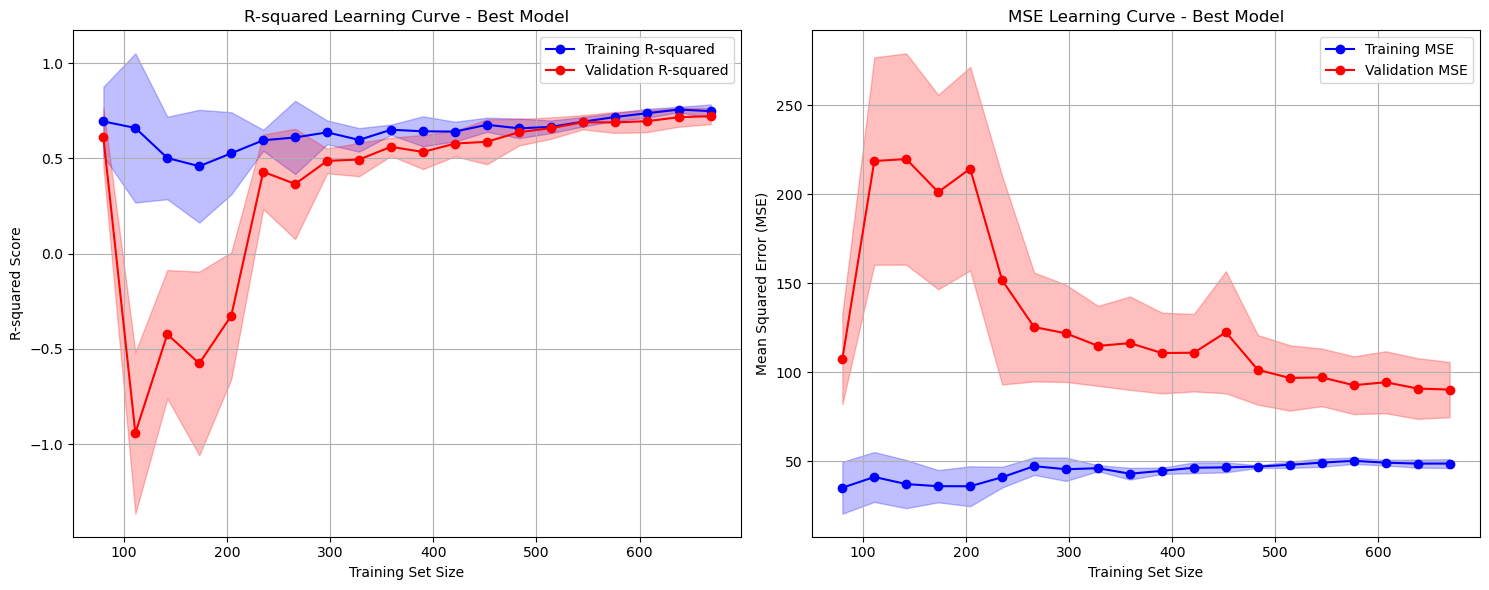

In [49]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_model.best_estimator_.named_steps['regressor'])])

# Plot learning curve for R-squared
train_sizes_r2, train_scores_r2, validation_scores_r2 = learning_curve(
    pipeline, X_train, y_train[targets_2[0]], cv=inner_cv,
    train_sizes=np.linspace(0.12, 1.0, 20), scoring='r2'
)

# Calculate mean and standard deviation for training and validation scores
train_mean_r2 = np.mean(train_scores_r2, axis=1)
train_std_r2 = np.std(train_scores_r2, axis=1)
validation_mean_r2 = np.mean(validation_scores_r2, axis=1)
validation_std_r2 = np.std(validation_scores_r2, axis=1)

# Plot R-squared learning curve
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes_r2, train_mean_r2, label='Training R-squared', color='blue', marker='o')
plt.fill_between(train_sizes_r2, train_mean_r2 - train_std_r2, train_mean_r2 + train_std_r2, color='blue', alpha=0.25)
plt.plot(train_sizes_r2, validation_mean_r2, label='Validation R-squared', color='red', marker='o')
plt.fill_between(train_sizes_r2, validation_mean_r2 - validation_std_r2, validation_mean_r2 + validation_std_r2, color='red', alpha=0.25)
plt.title('R-squared Learning Curve - Best Model')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.legend(loc='best')
plt.grid(True)

# Plot learning curve for MSE
train_sizes_mse, train_scores_mse, validation_scores_mse = learning_curve(
    pipeline, X_train, y_train[targets_2[0]], cv=inner_cv,
    train_sizes=np.linspace(0.12, 1.0, 20), scoring='neg_root_mean_squared_error'  # Use neg_mean_squared_error for MSE
)

# Calculate mean and standard deviation for training and validation scores
train_mean_mse = -np.mean(train_scores_mse, axis=1)  # Multiply by -1 to get positive MSE values
train_std_mse = np.std(train_scores_mse, axis=1)
validation_mean_mse = -np.mean(validation_scores_mse, axis=1)  # Multiply by -1 to get positive MSE values
validation_std_mse = np.std(validation_scores_mse, axis=1)

# Plot MSE learning curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes_mse, train_mean_mse, label='Training MSE', color='blue', marker='o')
plt.fill_between(train_sizes_mse, train_mean_mse - train_std_mse, train_mean_mse + train_std_mse, color='blue', alpha=0.25)
plt.plot(train_sizes_mse, validation_mean_mse, label='Validation MSE', color='red', marker='o')
plt.fill_between(train_sizes_mse, validation_mean_mse - validation_std_mse, validation_mean_mse + validation_std_mse, color='red', alpha=0.25)
plt.title('MSE Learning Curve - Best Model')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

For both prediction models for cluster A, we observed quite high $R^2$ values (around 0.8)  where the scatter plots of actual Vs predicted values showed a linear relationship,with data points falling along a 45-degree line. Ideally, the predicted values match the actual values, indicating that the model's predictions are accurate and unbiased. The fact that our results are close to that behaviour means that our model works well and has good accuracy.

In both cases the best model is ANN. From learning curve showing $R^2$ values, we observe that the model gets better (higher $R^2$ value) as the training set size increases. We observed that training and validation $R^2$ values converge for an increasing number of training samples, which indicates that our model does not show clear signs of over or under-fitting.

According to learning curve with MSE value, training and validation error get closer as set size increases. Nonetheless, some gap still remains between the two, indicating slighlty low bias and high variance and that the validation MSE could decrease more taking some improvement steps such as adding more training instances and/or adding more features.

&nbsp;

## Cluster B

&nbsp;

###  1. Pickups

&nbsp;

In [50]:
# define features and targets
features_3 = [f'pickups_cluster_{clusterB:02d}_lagged_24', 'time_of_day', 'weekday', 'tripduration']
targets_3 = [f'pickups_cluster_{clusterB:02d}']

In [51]:
# Standardize and encode
X_train, y_train, X_test, y_test, preprocessor = prepare_data(aggregated_data, features_3, targets_3)

Numeric Features: ['pickups_cluster_08_lagged_24', 'tripduration', 'weekday']
Categorical Features: ['time_of_day']


In [52]:
# Train model
inner_cv = TimeSeriesSplit(n_splits=10)
outer_cv = TimeSeriesSplit(n_splits=5)

# Use the function for your cases
best_model, best_model_name, best_mean_r2 = train(models, param_grids, X_train, y_train[targets_3[0]], inner_cv, outer_cv)

LinearRegression:

	- Setting GridSearchCV for hyperparameter tuning (LinearRegression)...

	- Performing Nested CV



	- LinearRegression: R-squared scores - [0.63885782 0.65964274 0.74383719 0.76735162 0.72709247], Mean R-squared: 0.7073563668962102
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RidgeRegression:

	- Setting GridSearchCV for hyperparameter tuning (RidgeRegression)...

	- Performing Nested CV

	- RidgeRegression: R-squared scores - [0.63708843 0.65964193 0.74383215 0.76734695 0.72708797], Mean R-squared: 0.7069994857479777
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
NeuralNetwork:

	- Setting GridSearchCV for hyperparameter tuning (NeuralNetwork)...

	- Performing Nested CV

	- NeuralNetwork: R-squared scores - [0.72394715 0.77389285 0.84057908 0.86838271 0.83850415], Mean R-squared: 0.8090611898750953
---------------------------

#### Actual vs Predicted plot for the best model

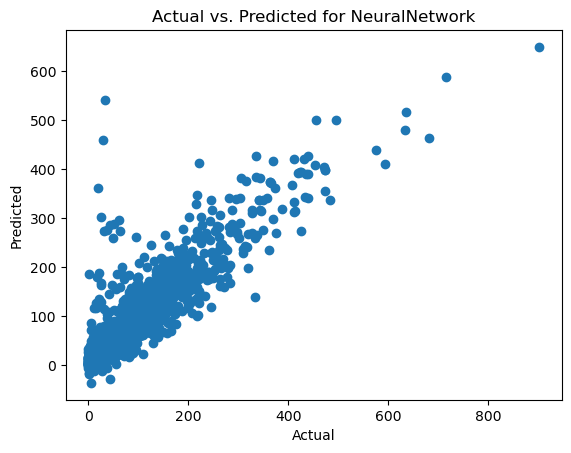

R-squared on the test set: 0.7944781380549355
Root Mean Squared Error on the test set: 46.18201053552372


In [53]:
# Find the best parameters for the best model found in Nested CV
best_model.fit(X_train, y_train[targets_3[0]])

# Predict on the test set
y_pred_b_p = best_model.predict(X_test)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred_b_p)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted for {best_model_name}')
plt.show()


# Calculate R-squared
test_r2 = r2_score(y_test[targets_3[0]], y_pred_b_p)
print(f"R-squared on the test set: {test_r2}")

# Additional metric (e.g., Mean Squared Error)
mse = np.sqrt(mean_squared_error(y_test[targets_3[0]], y_pred_b_p))
print(f"Root Mean Squared Error on the test set: {mse}")

#### Learning curves

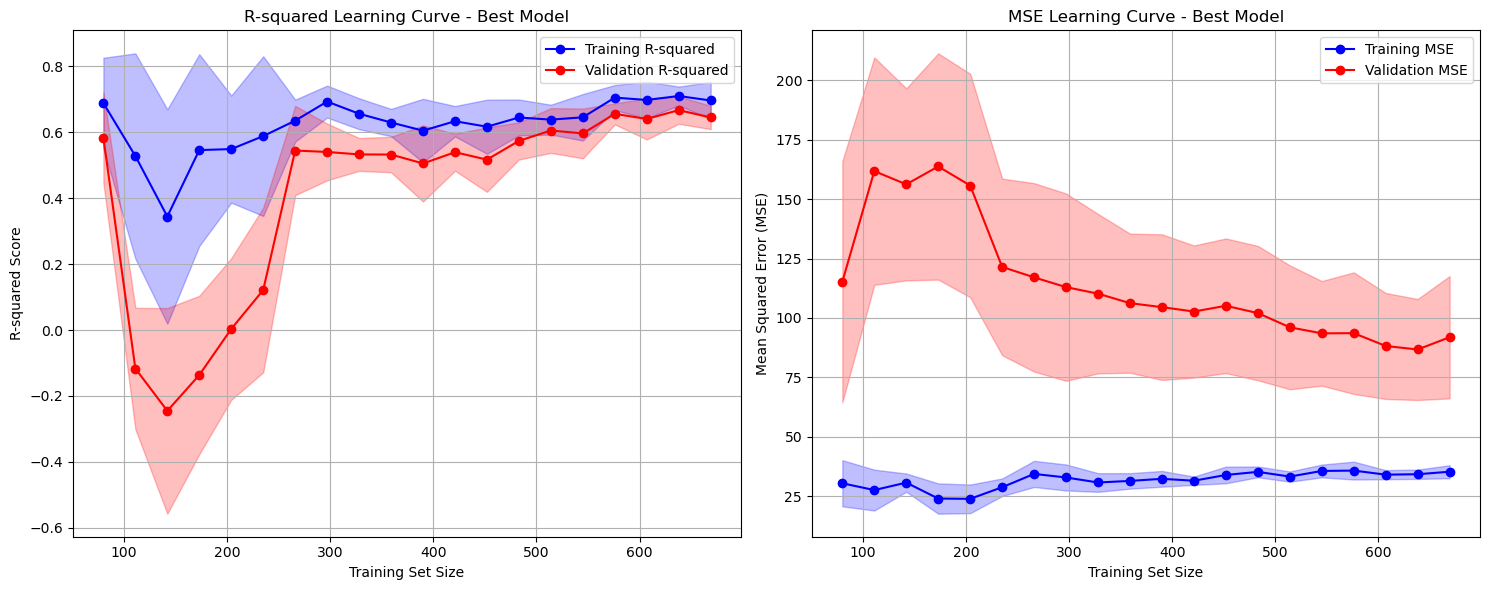

In [54]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_model.best_estimator_.named_steps['regressor'])])

# Plot learning curve for R-squared
train_sizes_r2, train_scores_r2, validation_scores_r2 = learning_curve(
    pipeline, X_train, y_train[targets_3[0]], cv=inner_cv,
    train_sizes=np.linspace(0.12, 1.0, 20), scoring='r2'
)

# Calculate mean and standard deviation for training and validation scores
train_mean_r2 = np.mean(train_scores_r2, axis=1)
train_std_r2 = np.std(train_scores_r2, axis=1)
validation_mean_r2 = np.mean(validation_scores_r2, axis=1)
validation_std_r2 = np.std(validation_scores_r2, axis=1)

# Plot R-squared learning curve
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes_r2, train_mean_r2, label='Training R-squared', color='blue', marker='o')
plt.fill_between(train_sizes_r2, train_mean_r2 - train_std_r2, train_mean_r2 + train_std_r2, color='blue', alpha=0.25)
plt.plot(train_sizes_r2, validation_mean_r2, label='Validation R-squared', color='red', marker='o')
plt.fill_between(train_sizes_r2, validation_mean_r2 - validation_std_r2, validation_mean_r2 + validation_std_r2, color='red', alpha=0.25)
plt.title('R-squared Learning Curve - Best Model')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.legend(loc='best')
plt.grid(True)

# Plot learning curve for MSE
train_sizes_mse, train_scores_mse, validation_scores_mse = learning_curve(
    pipeline, X_train, y_train[targets_3[0]], cv=inner_cv,
    train_sizes=np.linspace(0.12, 1.0, 20), scoring='neg_root_mean_squared_error'  # Use neg_mean_squared_error for MSE
)

# Calculate mean and standard deviation for training and validation scores
train_mean_mse = -np.mean(train_scores_mse, axis=1)  # Multiply by -1 to get positive MSE values
train_std_mse = np.std(train_scores_mse, axis=1)
validation_mean_mse = -np.mean(validation_scores_mse, axis=1)  # Multiply by -1 to get positive MSE values
validation_std_mse = np.std(validation_scores_mse, axis=1)

# Plot MSE learning curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes_mse, train_mean_mse, label='Training MSE', color='blue', marker='o')
plt.fill_between(train_sizes_mse, train_mean_mse - train_std_mse, train_mean_mse + train_std_mse, color='blue', alpha=0.25)
plt.plot(train_sizes_mse, validation_mean_mse, label='Validation MSE', color='red', marker='o')
plt.fill_between(train_sizes_mse, validation_mean_mse - validation_std_mse, validation_mean_mse + validation_std_mse, color='red', alpha=0.25)
plt.title('MSE Learning Curve - Best Model')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

&nbsp;

###  2. Dropoffs

In [55]:
# Define features and targets
features_4 = [f'dropoffs_cluster_{clusterB:02d}_lagged_24', 'time_of_day', 'weekday', 'tripduration']
targets_4 = [f'dropoffs_cluster_{clusterB:02d}']

In [56]:
# Standardize and Encode
X_train, y_train, X_test, y_test, preprocessor = prepare_data(aggregated_data, features_4, targets_4)

Numeric Features: ['dropoffs_cluster_08_lagged_24', 'tripduration', 'weekday']
Categorical Features: ['time_of_day']


In [57]:
# Train model
inner_cv = TimeSeriesSplit(n_splits=10)
outer_cv = TimeSeriesSplit(n_splits=5)

# Use the function for your cases
best_model, best_model_name, best_mean_r2 = train(models, param_grids, X_train, y_train[targets_4[0]], inner_cv, outer_cv)

LinearRegression:

	- Setting GridSearchCV for hyperparameter tuning (LinearRegression)...

	- Performing Nested CV



	- LinearRegression: R-squared scores - [0.62502022 0.64096504 0.69760948 0.70577923 0.71278475], Mean R-squared: 0.6764317434632163
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RidgeRegression:

	- Setting GridSearchCV for hyperparameter tuning (RidgeRegression)...

	- Performing Nested CV

	- RidgeRegression: R-squared scores - [0.62359562 0.64095691 0.69760369 0.7057729  0.71277895], Mean R-squared: 0.6761416135163385
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
NeuralNetwork:

	- Setting GridSearchCV for hyperparameter tuning (NeuralNetwork)...

	- Performing Nested CV

	- NeuralNetwork: R-squared scores - [0.76910824 0.76312277 0.83101849 0.8893771  0.85796476], Mean R-squared: 0.8221182705792287
---------------------------

#### Actual vs Predicted plot for the best model

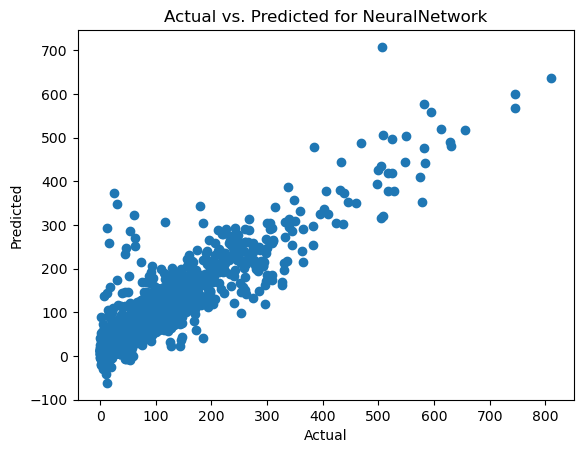

R-squared on the test set: 0.8306105441743667
Root Mean Squared Error on the test set: 45.138430343880756


In [58]:
# Find the best parameters for the best model found in Nested CV
best_model.fit(X_train, y_train[targets_4[0]])

# Predict on the test set
y_pred_b_d = best_model.predict(X_test)

# Plot actual vs. predicted values
plt.scatter(y_test[targets_4[0]], y_pred_b_d)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted for {best_model_name}')
plt.show()


# Calculate R-squared
test_r2 = r2_score(y_test[targets_4[0]], y_pred_b_d)
print(f"R-squared on the test set: {test_r2}")

# Additional metric (e.g., Mean Squared Error)
mse = np.sqrt(mean_squared_error(y_test[targets_4[0]], y_pred_b_d))
print(f"Root Mean Squared Error on the test set: {mse}")

#### Learning curves

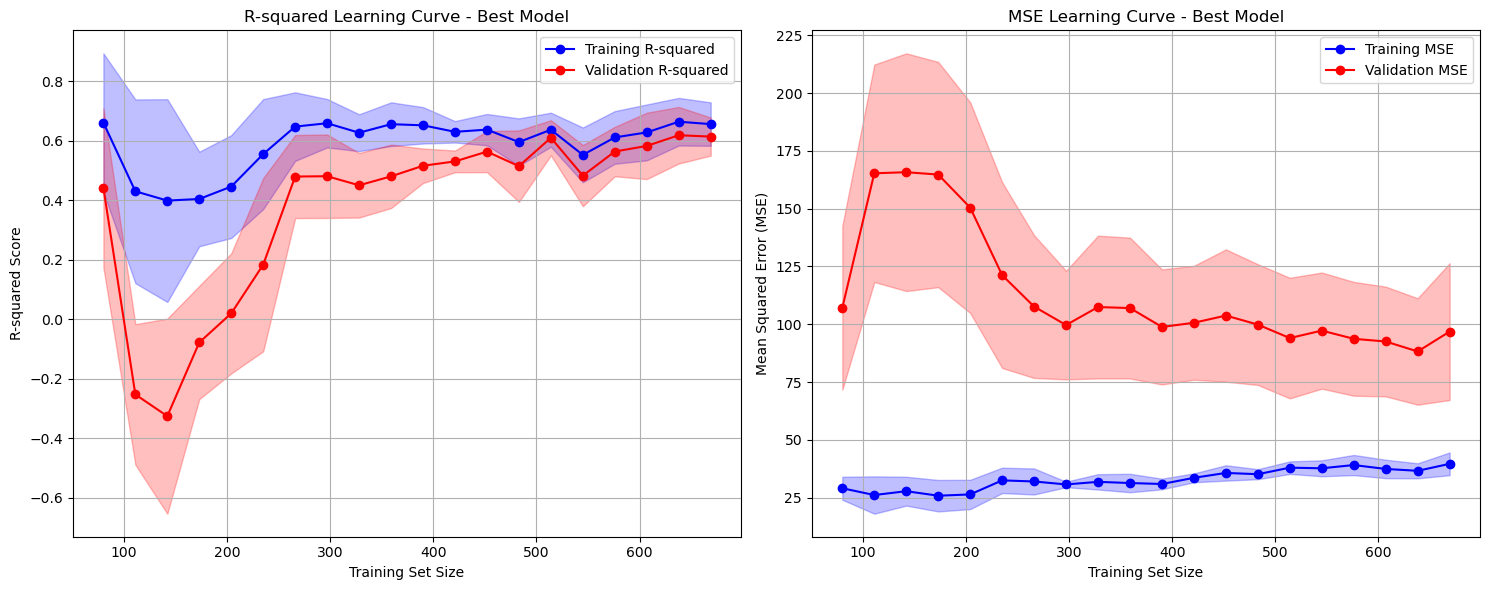

In [59]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_model.best_estimator_.named_steps['regressor'])])

# Plot learning curve for R-squared
train_sizes_r2, train_scores_r2, validation_scores_r2 = learning_curve(
    pipeline, X_train, y_train[targets_4[0]], cv=inner_cv,
    train_sizes=np.linspace(0.12, 1.0, 20), scoring='r2'
)

# Calculate mean and standard deviation for training and validation scores
train_mean_r2 = np.mean(train_scores_r2, axis=1)
train_std_r2 = np.std(train_scores_r2, axis=1)
validation_mean_r2 = np.mean(validation_scores_r2, axis=1)
validation_std_r2 = np.std(validation_scores_r2, axis=1)

# Plot R-squared learning curve
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes_r2, train_mean_r2, label='Training R-squared', color='blue', marker='o')
plt.fill_between(train_sizes_r2, train_mean_r2 - train_std_r2, train_mean_r2 + train_std_r2, color='blue', alpha=0.25)
plt.plot(train_sizes_r2, validation_mean_r2, label='Validation R-squared', color='red', marker='o')
plt.fill_between(train_sizes_r2, validation_mean_r2 - validation_std_r2, validation_mean_r2 + validation_std_r2, color='red', alpha=0.25)
plt.title('R-squared Learning Curve - Best Model')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.legend(loc='best')
plt.grid(True)

# Plot learning curve for MSE
train_sizes_mse, train_scores_mse, validation_scores_mse = learning_curve(
    pipeline, X_train, y_train[targets_4[0]], cv=inner_cv,
    train_sizes=np.linspace(0.12, 1.0, 20), scoring='neg_root_mean_squared_error'  # Use neg_mean_squared_error for MSE
)

# Calculate mean and standard deviation for training and validation scores
train_mean_mse = -np.mean(train_scores_mse, axis=1)  # Multiply by -1 to get positive MSE values
train_std_mse = np.std(train_scores_mse, axis=1)
validation_mean_mse = -np.mean(validation_scores_mse, axis=1)  # Multiply by -1 to get positive MSE values
validation_std_mse = np.std(validation_scores_mse, axis=1)

# Plot MSE learning curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes_mse, train_mean_mse, label='Training MSE', color='blue', marker='o')
plt.fill_between(train_sizes_mse, train_mean_mse - train_std_mse, train_mean_mse + train_std_mse, color='blue', alpha=0.25)
plt.plot(train_sizes_mse, validation_mean_mse, label='Validation MSE', color='red', marker='o')
plt.fill_between(train_sizes_mse, validation_mean_mse - validation_std_mse, validation_mean_mse + validation_std_mse, color='red', alpha=0.25)
plt.title('MSE Learning Curve - Best Model')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

Regarding cluster B regression models, we observe still high $R^2$ values (0.75 - 0.8), where the scatter plots of actual Vs predicted values show a linear relationship, with data points falling along a 45-degree line, indicating that the models work well and have good accuracy.

Also for cluster B, the best model is ANN. From learning curve showing $R^2$ values, we observe that the model gets better (higher $R^2$ value) as the training set size increases. We observed that training and validation $R^2$ values converge for an increasing number of training samples, but they never reach full convergence.

From learning curve with MSE value, we observe that the training error is very low, meaning that the training data is fitted very well by the estimated model, thus indicating low bias with respect to that set of data. In addition, the  gap between training and validation error indicates high variance, meaning that the models for cluster B could show some overfitting. For this matter, increasing the the amount of data could help to reduce that, as we are applying a complex ANN model to just a small cluster of data. 

# 2.c. Daily bikes maximum demand calculation

#### Import libraries

In [60]:
import pandas as pd
import numpy as np
import pickle
import warnings
import matplotlib.pyplot as plt

#### Create dataframes for each cluster with the predicted pickups and dropoffs (last two months)

In [61]:
# Extract the start_date_hour values for the last two months
start_date_hour_last_two_months = aggregated_data['start_date_hour'][-1464:]

# Create a new DataFrame
cluster_a = pd.DataFrame({
    'start_date_hour': start_date_hour_last_two_months,
    'pickups': y_pred_a_p,
    'dropoffs':y_pred_a_d
})

cluster_b = pd.DataFrame({
    'start_date_hour': start_date_hour_last_two_months,
    'pickups': y_pred_b_p,
    'dropoffs':y_pred_b_d
})

# Display the new DataFrame
cluster_a

start_date_hour  pickups  dropoffs
7279 2018-11-01 00:00:00   38.060    43.047
7280 2018-11-01 01:00:00   18.376    35.870
7281 2018-11-01 02:00:00   21.367    37.158
7282 2018-11-01 03:00:00   19.458    33.201
7283 2018-11-01 04:00:00   20.836    31.588
...                  ...      ...       ...
8738 2018-12-31 19:00:00  222.876   262.739
8739 2018-12-31 20:00:00  111.176   112.665
8740 2018-12-31 21:00:00  143.892   161.404
8741 2018-12-31 22:00:00  138.426   143.084
8742 2018-12-31 23:00:00   51.484    41.437

[1464 rows x 3 columns]

### Compute the required number of bicycles

Objective:

In this task, the goal is to determine the optimal number of bicycles needed in each cluster of stations for the next day. This is achieved by using the prediction model outputs to calculate the cumulative arrivals and departures, ensuring a sufficient bike supply to meet demand.

### Cumulative net demand

In [62]:
# For each cluster (A and B), we calculate the cumulative pickups and dropoffs per day (per 24 hours) and then calculate the difference between cumulative dropoffs and pickups. This gives us the net demand over time for each cluster. 

#create 4 dataframes for pickups and dropoffs per hour per day (61d x 24h)

cluster_a['day'] = cluster_a['start_date_hour'].dt.date
cluster_a['hour'] = cluster_a['start_date_hour'].dt.hour
#create df 61x24 for cluster A pickups
cluster_a_picks = cluster_a.pivot_table(index='day', columns='hour', values='pickups')
#create df 61x24 for cluster A dropoffs
cluster_a_dropoffs = cluster_a.pivot_table(index='day', columns='hour', values='dropoffs')

cluster_b['day'] = cluster_b['start_date_hour'].dt.date
cluster_b['hour'] = cluster_b['start_date_hour'].dt.hour
#create df 61x24 for cluster A pickups
cluster_b_picks = cluster_b.pivot_table(index='day', columns='hour', values='pickups')
#create df 61x24 for cluster A dropoffs
cluster_b_dropoffs = cluster_b.pivot_table(index='day', columns='hour', values='dropoffs')

#show new dataframe example
cluster_a_dropoffs

hour           0      1      2      3      4      5       6       7       8   \
day                                                                            
2018-11-01 43.047 35.870 37.158 33.201 31.588 47.683 105.061 309.415 502.549   
2018-11-02 50.668 48.295 35.657 28.457 29.896 34.298  90.734 283.612 400.194   
2018-11-03 56.934 39.829 22.788 40.549 14.919 18.605  78.426 153.649 316.085   
2018-11-04 43.793 17.666  6.705 11.409 18.349 28.015  22.494  42.981  77.374   
2018-11-05 64.801 45.618 47.323 43.226 41.825 43.963  42.927 202.757 288.748   
...           ...    ...    ...    ...    ...    ...     ...     ...     ...   
2018-12-27 35.987 33.912 33.856 32.193 18.005 31.434  47.376 124.525 244.065   
2018-12-28 51.625 42.084 32.568 26.824 36.158 20.660  21.966  25.325  73.902   
2018-12-29 35.844 41.145 38.763 33.774 14.466 37.448  37.838  67.272  87.282   
2018-12-30 13.654 21.075 21.686 12.307  8.503 19.993  27.408 -19.590   6.182   
2018-12-31 44.151 50.845 31.759 29.805 42.438 42.398  42.475 186.689 298.685   

hour            9   ...      14      15      16      17      18      19  \
day                 ...                                                   
2018-11-01 404.642  ... 376.865 392.600 434.389 640.573 567.499 442.310   
2018-11-02 380.150  ... 322.776 361.741 415.788 549.613 485.420 305.351   
2018-11-03 288.649  ... 358.192 377.305 403.722 475.818 378.860 235.389   
2018-11-04 167.619  ... 320.108 328.423 331.479 260.086 202.490 152.551   
2018-11-05 175.931  ... 253.020 151.489 267.011 489.097 377.478 308.993   
...            ...  ...     ...     ...     ...     ...     ...     ...   
2018-12-27 198.231  ... 260.417 238.503 265.847 324.826 315.811 251.608   
2018-12-28  98.652  ...  58.422 100.919 111.804 257.992 225.191 214.257   
2018-12-29 122.215  ... 215.306 204.184 201.378 190.388 183.493 155.337   
2018-12-30 104.086  ... 213.234 187.998 196.166 121.642 115.271  97.841   
2018-12-31 190.786  ... 117.970 109.180 109.399 203.056 253.884 262.739   

hour            20      21      22     23  
day                                        
2018-11-01 257.240 207.655 204.599 86.405  
2018-11-02 197.775 197.703 152.478 81.292  
2018-11-03 158.173 119.948 116.312 70.291  
2018-11-04 142.512 128.981  89.518 39.214  
2018-11-05 174.396 143.674 124.563 62.748  
...            ...     ...     ...    ...  
2018-12-27 129.445 111.207 100.998 39.143  
2018-12-28 129.601 122.894 110.873 63.321  
2018-12-29 125.194 109.459  97.992 39.095  
2018-12-30  71.995  85.196  78.777 27.451  
2018-12-31 112.665 161.404 143.084 41.437  

[61 rows x 24 columns]

In [63]:
# Calculate cumulative pickups and dropoffs
cluster_a_picks_cumsum = cluster_a_picks.apply(lambda row: row.cumsum(), axis=1)
cluster_a_dropoffs_cumsum = cluster_a_dropoffs.apply(lambda row: row.cumsum(), axis=1)
cluster_b_picks_cumsum = cluster_b_picks.apply(lambda row: row.cumsum(), axis=1)
cluster_b_dropoffs_cumsum = cluster_b_dropoffs.apply(lambda row: row.cumsum(), axis=1)

#show cumulative dataset
cluster_a_dropoffs_cumsum

hour           0       1       2       3       4       5       6       7   \
day                                                                         
2018-11-01 43.047  78.917 116.075 149.276 180.864 228.547 333.609 643.023   
2018-11-02 50.668  98.964 134.621 163.078 192.974 227.272 318.006 601.618   
2018-11-03 56.934  96.764 119.552 160.101 175.019 193.625 272.051 425.700   
2018-11-04 43.793  61.459  68.163  79.573  97.922 125.937 148.430 191.411   
2018-11-05 64.801 110.419 157.741 200.967 242.793 286.756 329.683 532.440   
...           ...     ...     ...     ...     ...     ...     ...     ...   
2018-12-27 35.987  69.899 103.754 135.947 153.953 185.386 232.762 357.287   
2018-12-28 51.625  93.709 126.277 153.101 189.259 209.919 231.885 257.210   
2018-12-29 35.844  76.989 115.752 149.526 163.992 201.441 239.279 306.551   
2018-12-30 13.654  34.730  56.416  68.723  77.227  97.219 124.627 105.036   
2018-12-31 44.151  94.996 126.755 156.559 198.998 241.396 283.870 470.560   

hour             8        9   ...       14       15       16       17  \
day                           ...                                       
2018-11-01 1145.573 1550.214  ... 3260.492 3653.092 4087.480 4728.053   
2018-11-02 1001.812 1381.963  ... 3007.032 3368.773 3784.560 4334.173   
2018-11-03  741.785 1030.433  ... 2594.930 2972.235 3375.957 3851.775   
2018-11-04  268.785  436.404  ... 1950.279 2278.702 2610.180 2870.266   
2018-11-05  821.188  997.119  ... 2078.394 2229.884 2496.895 2985.992   
...             ...      ...  ...      ...      ...      ...      ...   
2018-12-27  601.353  799.584  ... 1908.792 2147.296 2413.142 2737.968   
2018-12-28  331.111  429.764  ...  803.145  904.064 1015.868 1273.860   
2018-12-29  393.833  516.048  ... 1448.376 1652.559 1853.937 2044.325   
2018-12-30  111.218  215.305  ... 1100.167 1288.165 1484.331 1605.973   
2018-12-31  769.244  960.030  ... 1928.483 2037.664 2147.062 2350.118   

hour             18       19       20       21       22       23  
day                                                               
2018-11-01 5295.553 5737.862 5995.103 6202.758 6407.356 6493.761  
2018-11-02 4819.593 5124.944 5322.719 5520.423 5672.900 5754.193  
2018-11-03 4230.635 4466.024 4624.197 4744.145 4860.457 4930.748  
2018-11-04 3072.756 3225.307 3367.819 3496.800 3586.318 3625.532  
2018-11-05 3363.470 3672.463 3846.859 3990.533 4115.096 4177.844  
...             ...      ...      ...      ...      ...      ...  
2018-12-27 3053.779 3305.387 3434.831 3546.038 3647.036 3686.179  
2018-12-28 1499.051 1713.308 1842.909 1965.804 2076.677 2139.998  
2018-12-29 2227.818 2383.156 2508.350 2617.809 2715.801 2754.896  
2018-12-30 1721.244 1819.086 1891.081 1976.277 2055.054 2082.505  
2018-12-31 2604.002 2866.741 2979.407 3140.810 3283.895 3325.332  

[61 rows x 24 columns]

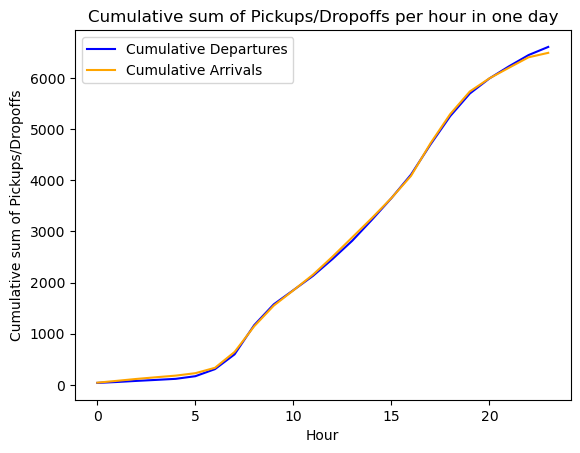

In [64]:
# plot cumulative pickups and dropoffs for cluster A day 1, as an example
first_day_departures = cluster_a_picks_cumsum.iloc[0]
first_day_arrivals = cluster_a_dropoffs_cumsum.iloc[0]

plt.plot(first_day_departures.index, first_day_departures.values, color='blue', label='Cumulative Departures')
plt.plot(first_day_arrivals.index, first_day_arrivals.values, color='orange', label='Cumulative Arrivals')
plt.title('Cumulative sum of Pickups/Dropoffs per hour in one day')
plt.xlabel('Hour')
plt.ylabel('Cumulative sum of Pickups/Dropoffs')
plt.legend()
plt.show()

In [65]:
#Calculate net demand per hour per day by subtracting departures df - arrivals df
# cluster A
net_diff_a = cluster_a_picks_cumsum - cluster_a_dropoffs_cumsum 
# cluster B
net_diff_b = cluster_b_picks_cumsum - cluster_b_dropoffs_cumsum 

# show net df
net_diff_a

hour           0       1       2       3       4       5        6        7   \
day                                                                           
2018-11-01 -4.987 -22.481 -38.272 -52.015 -62.768 -59.075  -25.908  -46.347   
2018-11-02 31.596  35.991  32.806  34.201  21.656  29.996   46.227   19.358   
2018-11-03 -8.691 -24.549 -28.238 -54.409 -55.093 -50.520  -56.020 -103.028   
2018-11-04 -5.407  -0.489   5.442   4.694  -4.489 -17.026  -23.386  -16.060   
2018-11-05 33.238  27.028  18.128  10.974   2.946  -8.343  -10.020  -60.179   
...           ...     ...     ...     ...     ...     ...      ...      ...   
2018-12-27 -4.255 -22.675 -39.335 -54.579 -66.302 -75.431  -84.982  -40.407   
2018-12-28 -8.132 -30.962 -37.809 -48.237 -69.710 -71.828  -63.969  -13.203   
2018-12-29 -9.475 -28.912 -51.415 -71.004 -73.575 -98.716 -120.886 -128.879   
2018-12-30  8.078   9.894   6.272   5.852   9.500   1.313  -13.393   12.477   
2018-12-31  3.107   7.169   3.713 -18.320 -34.978 -49.304  -57.164 -104.424   

hour             8        9   ...       14       15       16       17  \
day                           ...                                       
2018-11-01   21.642   25.264  ...  -34.063   -2.012   24.381  -23.343   
2018-11-02   52.615   35.612  ...   34.547   60.861   62.672   57.422   
2018-11-03 -195.151 -199.720  ... -198.464 -207.733 -227.417 -300.283   
2018-11-04  -30.308  -19.164  ...   22.181   34.487   36.492   26.194   
2018-11-05  -97.905 -142.517  ... -374.006 -390.764 -405.405 -399.446   
...             ...      ...  ...      ...      ...      ...      ...   
2018-12-27  -48.773  -84.986  ... -162.944 -163.766 -168.605 -155.566   
2018-12-28   15.628   12.645  ...   77.378  106.996  138.074  130.541   
2018-12-29 -149.280 -148.379  ...  -35.818  -40.469  -53.312  -48.374   
2018-12-30   31.248   37.762  ...   46.845   46.731   48.300   76.315   
2018-12-31 -144.553 -114.192  ...  -32.202   -2.881   17.744  -18.098   

hour             18       19       20       21       22       23  
day                                                               
2018-11-01  -39.691  -40.074   -2.209   27.810   43.605  115.741  
2018-11-02   42.166   18.887    6.159  -10.827  -16.751   11.219  
2018-11-03 -346.050 -350.773 -383.400 -400.697 -422.989 -419.276  
2018-11-04   29.593   57.420   65.229   58.706   66.791   79.970  
2018-11-05 -432.260 -476.469 -458.587 -450.172 -429.727 -435.046  
...             ...      ...      ...      ...      ...      ...  
2018-12-27 -150.013 -129.829 -142.138 -134.683 -127.947 -114.566  
2018-12-28  121.678  116.772   84.778   56.294   28.616   25.439  
2018-12-29  -44.449  -43.636  -69.367  -80.133  -91.554  -96.706  
2018-12-30  111.844  145.427  156.239  168.571  173.178  174.730  
2018-12-31  -52.927  -92.791  -94.280 -111.792 -116.450 -106.403  

[61 rows x 24 columns]

### Total bikes required 
 - The maximum value of net demand (departures - arrivals) will be the estimation of the bikes required to meet the maximum demand during that day.

In [66]:
import math

# The negative values are to be considered as no need to put bikes for the day in that station.
n_bikes_a = net_diff_a.max(axis=1).apply(lambda x: max(0, x)).apply(lambda x: math.ceil(x))

n_bikes_b = net_diff_b.max(axis=1).apply(lambda x: max(0, x)).apply(lambda x: math.ceil(x))

# Display the highest demand of bikes per day 
print("Number of bikes required for Cluster A:\n", n_bikes_a)
print("Number of bikes required for Cluster B:\n", n_bikes_b)

Number of bikes required for Cluster A:
 day
2018-11-01    116
2018-11-02     63
2018-11-03      0
2018-11-04     80
2018-11-05     34
             ... 
2018-12-27      0
2018-12-28    139
2018-12-29      0
2018-12-30    175
2018-12-31     18
Length: 61, dtype: int64
Number of bikes required for Cluster B:
 day
2018-11-01      7
2018-11-02     11
2018-11-03      0
2018-11-04     23
2018-11-05      0
             ... 
2018-12-27    102
2018-12-28      6
2018-12-29      0
2018-12-30     75
2018-12-31      0
Length: 61, dtype: int64


_____________________________________________________________________________________________________________________________
# 3. Exploratory Component

## 3.a Research question Nr.1:
In the clustering section, 20 clusters were obtained by using the stations' coordinates as independent variables. Namely, they were grouped by geographic proximity. As the demand (pickups) of bikes is what matters to the company and not the specific location of the stations, it is interesting to firstly analyze:
##### *Geographically, is there a clearly defined area of high pickups density? If so, are the clusters defined in previous sections a good representation of this?*  

#### Libraries 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from sklearn.cluster import KMeans
import warnings

The first question can be easily answered by analysing the demand per station and visually comparing it with the two high-clusters defined in the previous section 

- ### Firstly, number of pickups per station is obtained

In [68]:
filtered_data['pickups'] = 1 #To calculate number of pickups
start_stations = filtered_data[['start_station_id', 'start_station_latitude', 'start_station_longitude', 'pickups']]
start_stations = start_stations.groupby('start_station_id').agg({
    'start_station_latitude': 'first',
    'start_station_longitude': 'first',
    'pickups': 'sum'
}).reset_index()

#Display new dataset
start_stations

start_station_id  start_station_latitude  start_station_longitude  \
0                  72                  40.767                  -73.994   
1                  79                  40.719                  -74.007   
2                  82                  40.711                  -74.000   
3                  83                  40.684                  -73.976   
4                 119                  40.696                  -73.978   
..                ...                     ...                      ...   
729              3714                  40.707                  -73.954   
730              3715                  40.718                  -73.955   
731              3718                  40.727                  -73.980   
732              3719                  40.683                  -73.974   
733              3720                  40.685                  -73.987   

     pickups  
0      36332  
1      25862  
2       9832  
3      12412  
4       3117  
..       ...  
729      602  
730     2630  
731     1921  
732      212  
733       59  

[734 rows x 4 columns]

- ### Plot stations visualizing their demand
Visually, it can be indentified a north-west area with higher demand. This area is Manhattan which is, as expected, the most densely populated neighborhood of the 5 boroughs of New York City.

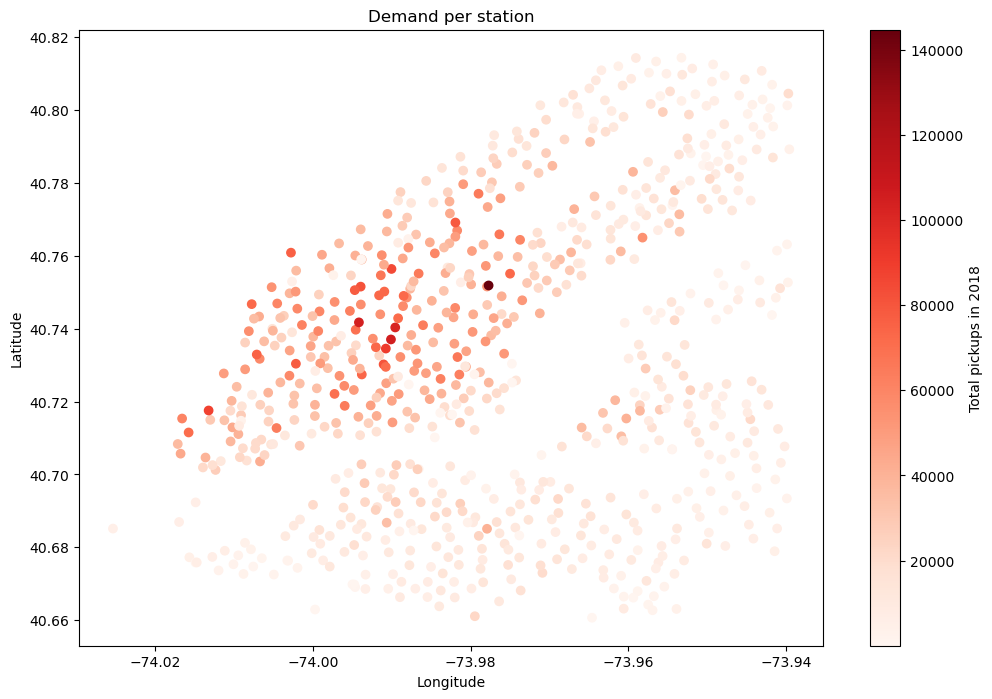

In [69]:
plt.figure(figsize=(12, 8))

# Normalize pickup counts so that the colors are evenly distributed across the color map
norm = Normalize(vmin=start_stations['pickups'].min(), vmax=start_stations['pickups'].max())

# Create a ScalarMappable for colormap scaling
sm = ScalarMappable(cmap='Reds', norm=norm)

plt.scatter(
    start_stations['start_station_longitude'],
    start_stations['start_station_latitude'],
    color=sm.to_rgba(start_stations['pickups'])
    )

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Demand per station')
cbar = plt.colorbar(sm, label='Total pickups in 2018')
plt.show()

- ### Comparing this analysis against the two high-demand clusters previously defined
Althought these two clusters are also located in Manhattan, we can see that they do not match 100% with the demand trend. These two clusters include some very low-demand stations and do not cover regions with high-demand stations. Indeed, station number 519 is not covered by any of these clusters and it is, by far, the one with the highest number of pickups.

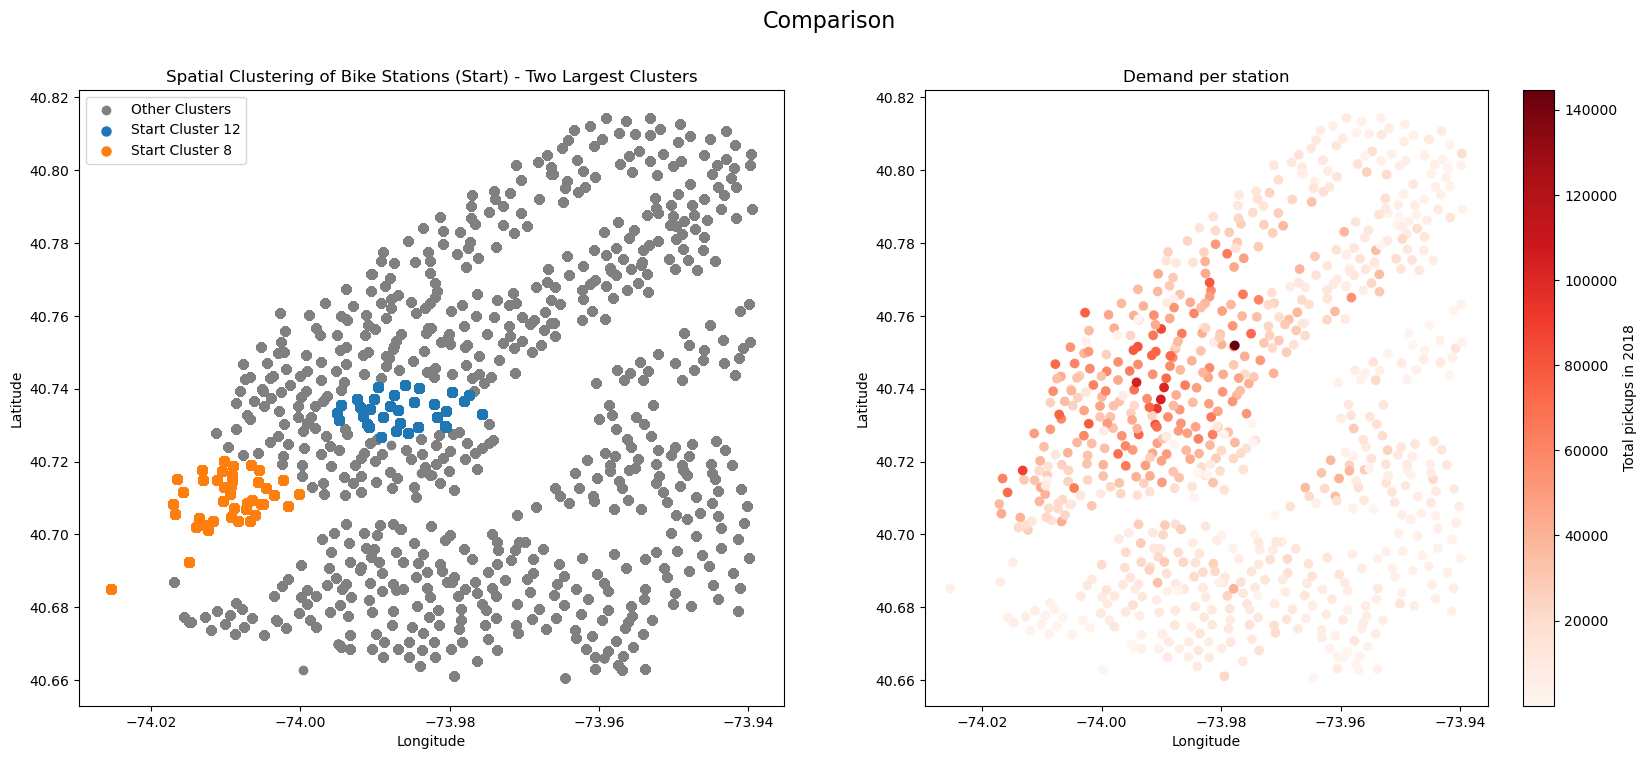

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Comparison", fontsize=16)
 
# Previous plot
axes[1].scatter(
    start_stations['start_station_longitude'],
    start_stations['start_station_latitude'],
    color=sm.to_rgba(start_stations['pickups'])
)
 
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('Demand per station')
cbar = plt.colorbar(sm, ax=axes[1], label='Total pickups in 2018')
 
# Plot all data points, coloring the two largest clusters differently
# Plot all data points in grey
axes[0].scatter(filtered_data['start_station_longitude'], filtered_data['start_station_latitude'], color='grey', label='Other Clusters')
 
# Plot the two largest clusters in different colors
for i, cluster in enumerate(largest_clusters):
    cluster_data = filtered_data[filtered_data['start_cluster'] == cluster]
    axes[0].scatter(cluster_data['start_station_longitude'], cluster_data['start_station_latitude'], label=f'Start Cluster {cluster}', marker='o', linewidth=1.5)
 
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Spatial Clustering of Bike Stations (Start) - Two Largest Clusters')
axes[0].legend()
 
plt.show()

In [71]:
start_stations.sort_values(by='pickups', inplace = True, ascending=False)
#Visualize stations with high demand
start_stations.head(10)

start_station_id  start_station_latitude  start_station_longitude  \
258               519                  40.752                  -73.978   
240               497                  40.737                  -73.990   
186               435                  40.742                  -73.994   
160               402                  40.740                  -73.990   
66                285                  40.735                  -73.991   
180               426                  40.718                  -74.013   
222               477                  40.756                  -73.990   
233               490                  40.752                  -73.994   
69                293                  40.730                  -73.991   
242               499                  40.769                  -73.982   

     pickups  
258   144677  
240   105403  
186   104463  
160   101764  
66     90692  
180    87804  
222    84609  
233    81831  
69     80841  
242    78600

In [72]:
pickups_difference = start_stations.iloc[0]['pickups'] - start_stations.iloc[1]['pickups']
print(f"The difference between pickups of the station 519 and second highest-demand stations is: {pickups_difference}")

The difference between pickups of the station 519 and second highest-demand stations is: 39274.0


In [73]:
# Filter the dataset for clusters defined in section 2
filter = cluster_data[cluster_data['start_cluster'].isin([largest_clusters[0],largest_clusters[1]])]
unique_start_stations = filter['start_station_id'].unique()

# Print the result
print(f"Start Station IDs in clusters {largest_clusters[0]} and {largest_clusters[1]}:", unique_start_stations)

Start Station IDs in clusters 12 and 8: [  79   82  146  152  195  249  259  260  264  276  279  304  306  309
  315  316  319  320  327  330  337  351  360  363  376  386  387  415
  417  426  427  534 2008 3002 3461 3489 3664 3254 3479 3690 3701]


When the main concern is demand and not geographic proximity, clustering directly by number of pickups is a more representative way of grouping stations. Unlike the first clustering, this way allows to evaluate and define the best number of "k" values.

## Clustering

- ### Filtering now only by pickups and performing k-means clustering 

In [74]:
station_data_p = filtered_data.groupby('start_station_id').size().reset_index(name='pickups')
station_data_p.set_index('start_station_id', inplace=True, drop=True)
station_data_p

pickups
start_station_id         
72                  36332
79                  25862
82                   9832
83                  12412
119                  3117
...                   ...
3714                  602
3715                 2630
3718                 1921
3719                  212
3720                   59

[734 rows x 1 columns]

In [75]:
# To ignore all warnings
warnings.filterwarnings('ignore')

n_clusters = 20  # Adjust the number of clusters as needed

# Perform Clustering for Start Stations based on pickups in the Whole Dataset
pickups_kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(station_data_p)

# Add cluster assignation to the dataset 
station_data_p['cluster']=KMeans(n_clusters=n_clusters, random_state=0).fit_predict(station_data_p)
station_data_p

pickups  cluster
start_station_id                  
72                  36332       16
79                  25862        2
82                   9832       14
83                  12412        5
119                  3117        9
...                   ...      ...
3714                  602       13
3715                 2630        9
3718                 1921       13
3719                  212       13
3720                   59       13

[734 rows x 2 columns]

- ### Now, adding again station coordinates to plot the results

In [76]:
geolocation = filtered_data.groupby('start_station_id').agg({
    'start_station_latitude': 'first',
    'start_station_longitude': 'first'
}).reset_index()

# merge station_data dataset with coordinates 'geolocation' dataset
clustering = pd.merge(geolocation, station_data_p, on='start_station_id', how='left')
clustering

start_station_id  start_station_latitude  start_station_longitude  \
0                  72                  40.767                  -73.994   
1                  79                  40.719                  -74.007   
2                  82                  40.711                  -74.000   
3                  83                  40.684                  -73.976   
4                 119                  40.696                  -73.978   
..                ...                     ...                      ...   
729              3714                  40.707                  -73.954   
730              3715                  40.718                  -73.955   
731              3718                  40.727                  -73.980   
732              3719                  40.683                  -73.974   
733              3720                  40.685                  -73.987   

     pickups  cluster  
0      36332       16  
1      25862        2  
2       9832       14  
3      12412        5  
4       3117        9  
..       ...      ...  
729      602       13  
730     2630        9  
731     1921       13  
732      212       13  
733       59       13  

[734 rows x 5 columns]

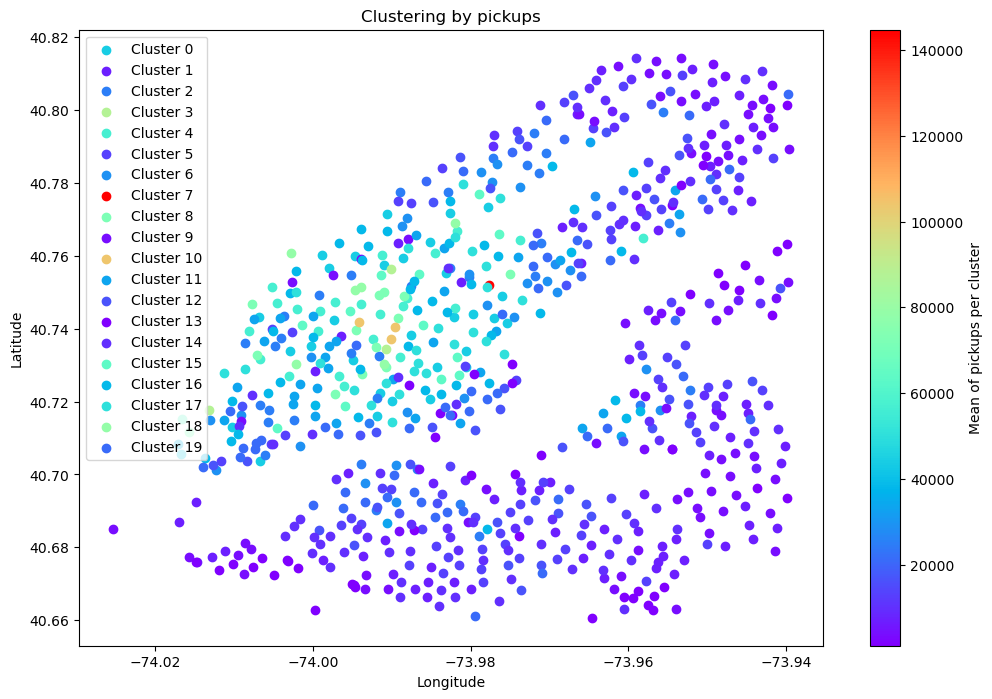

In [77]:
#Use the mean number of pickups per cluster to represent each cluster with a colour
mean_pickup_per_cluster = clustering.groupby('cluster')['pickups'].mean()

plt.figure(figsize=(12, 8))

# Get unique clusters in the DataFrame and sort them
clusters_new = sorted(clustering['cluster'].unique())

# Normalize pickups counts for each cluster so that the colors are evenly distributed across the color map
norm = Normalize(vmin=mean_pickup_per_cluster.min(), vmax=mean_pickup_per_cluster.max())

sm = ScalarMappable(cmap='rainbow', norm=norm)

# Scatter plot with different colors for each cluster
for c in clusters_new:
    clusters_data = clustering[clustering['cluster'] == c]
    plt.scatter(
        clusters_data['start_station_longitude'],
        clusters_data['start_station_latitude'],
        label=f'Cluster {c}',
        color=sm.to_rgba(mean_pickup_per_cluster[c])
    )

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering by pickups')
cbar = plt.colorbar(sm, label='Mean of pickups per cluster')
plt.legend()
plt.show()

## Clustering evaluation

- ### Elbow method for determining the optimal number of clusters
This is a visual approach to determine the optimal number of clusters in K-Means. It works by finding WCSS (Within-Cluster Sum of Square).

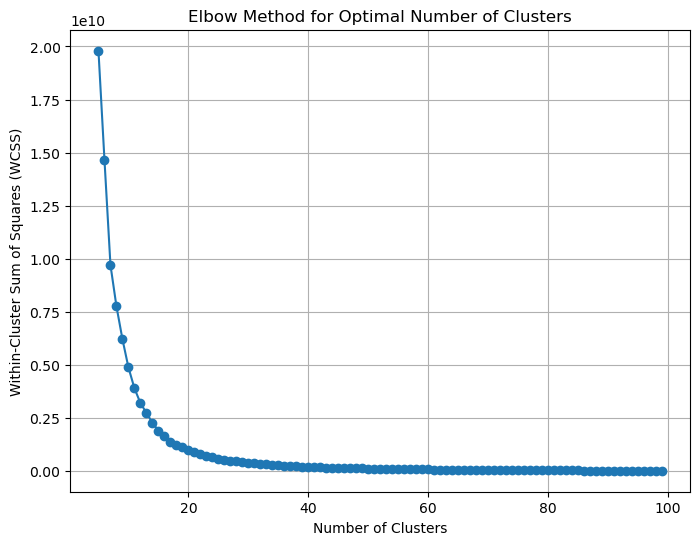

In [78]:
import joblib
from joblib import Parallel, delayed

# Function to calculate WCSS for a given number of clusters
def calculate_wcss(n_clusters, station_data_p):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(station_data_p)
    return kmeans.inertia_

# Number of clusters range
cluster_range = range(5, 100)

# Use joblib to parallelize the computation
wcss = Parallel(n_jobs=-1)(
    delayed(calculate_wcss)(n_clusters, station_data_p) for n_clusters in cluster_range
)

# Plot the WCSS for different numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

As it is only a visual approach it has its own limitations. We can subjectively agree that the best number of cluster is obtained when k is between 5 and 25.

- ### Silhouette score
It is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)
 - A score near +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
 - A score of 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
 - A score less than 0 indicates that the object might be assigned to the wrong cluster.

Clusters: 5 - Silhouette Score: 0.5704 - Time: 0.04 seconds
Clusters: 6 - Silhouette Score: 0.5683 - Time: 0.05 seconds
Clusters: 7 - Silhouette Score: 0.5678 - Time: 0.06 seconds
Clusters: 8 - Silhouette Score: 0.5588 - Time: 0.06 seconds
Clusters: 9 - Silhouette Score: 0.5585 - Time: 0.06 seconds
Clusters: 10 - Silhouette Score: 0.5584 - Time: 0.06 seconds
Clusters: 11 - Silhouette Score: 0.5451 - Time: 0.06 seconds
Clusters: 12 - Silhouette Score: 0.5408 - Time: 0.07 seconds
Clusters: 13 - Silhouette Score: 0.5390 - Time: 0.11 seconds
Clusters: 14 - Silhouette Score: 0.5463 - Time: 0.07 seconds
Clusters: 15 - Silhouette Score: 0.5477 - Time: 0.08 seconds
Clusters: 16 - Silhouette Score: 0.5531 - Time: 0.10 seconds
Clusters: 17 - Silhouette Score: 0.5548 - Time: 0.09 seconds
Clusters: 18 - Silhouette Score: 0.5496 - Time: 0.11 seconds
Clusters: 19 - Silhouette Score: 0.5424 - Time: 0.13 seconds
Clusters: 20 - Silhouette Score: 0.5414 - Time: 0.08 seconds
Clusters: 21 - Silhouette Sco

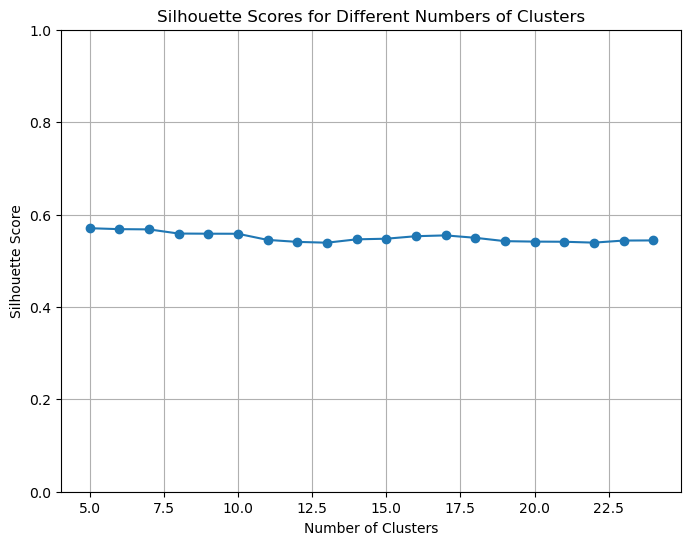

The optimal number of clusters according to its Silhouette score is 5


In [79]:
from sklearn.metrics import silhouette_score, silhouette_samples
import time
from sklearn import metrics
import matplotlib.pyplot as plt

# Initialize lists to store silhouette scores and times
silhouette_scores = []

# Define the range of cluster numbers
cluster_range = range(5, 25)

# Function to calculate silhouette score for a given number of clusters
def calculate_silhouette_score(n_clusters, station_data_p):
    start_time = time.time()
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(station_data_p)

    silhouette_avg = metrics.silhouette_score(station_data_p, cluster_labels, metric='euclidean', sample_size=len(cluster_labels))
    
    elapsed_time = time.time() - start_time
    
    return n_clusters, silhouette_avg, elapsed_time

# Parallelize the computation using joblib
results = joblib.Parallel(n_jobs=-1)(
    joblib.delayed(calculate_silhouette_score)(n_clusters, station_data_p)
    for n_clusters in cluster_range
)

# Print and plot silhouette scores
for result in results:
    n_clusters, silhouette_avg, elapsed_time = result
    print(f"Clusters: {n_clusters} - Silhouette Score: {silhouette_avg:.4f} - Time: {elapsed_time:.2f} seconds")
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid(True)
plt.show()

optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print("The optimal number of clusters according to its Silhouette score is", optimal_clusters)



- ### Silhouette plots
The following plots enable the analysis of individual silhouette coefficients, offering a comprehensive view of the distribution of these coefficients on each cluster.

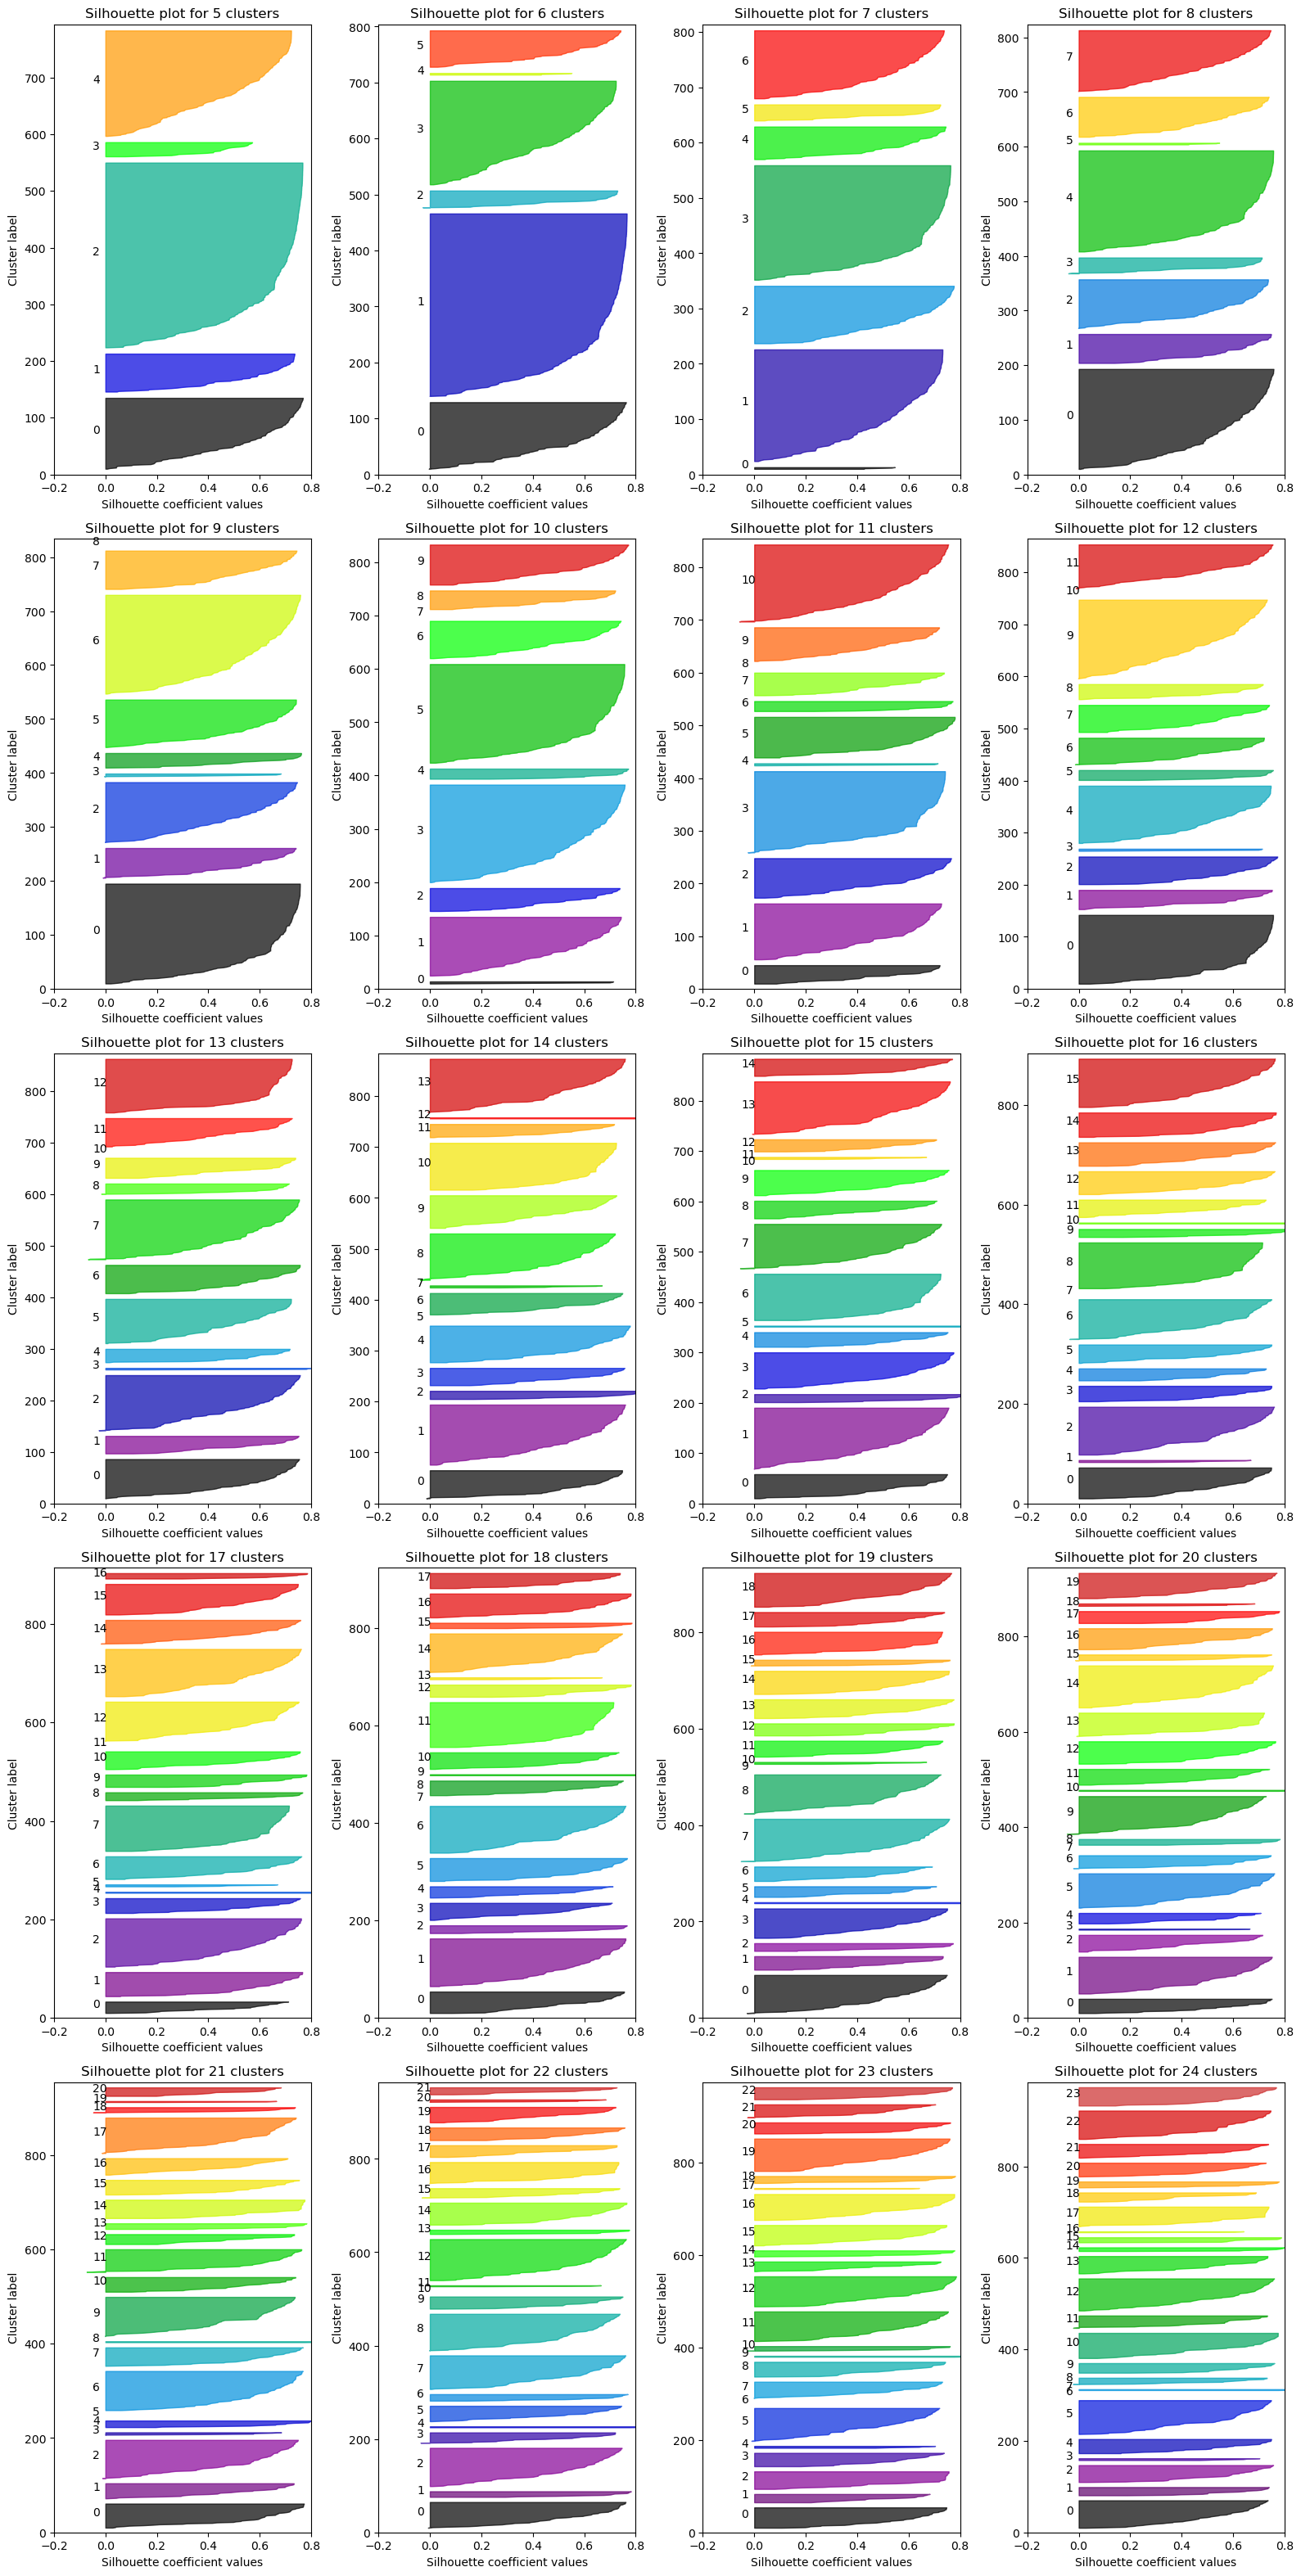

In [80]:
# Function to calculate silhouette score for a given number of clusters
def calculate_silhouette_score(k, station_data):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(station_data_p)
    silhouette_avg = silhouette_score(station_data_p, cluster_labels)
    print(f"For k = {k}, the average silhouette score is: {silhouette_avg}")
    return silhouette_avg

# Number of clusters range
k_values = range(5, 25)

# Use joblib to parallelize the computation
silhouette_scores = Parallel(n_jobs=-1)(
    delayed(calculate_silhouette_score)(k, station_data_p) for k in k_values
)

# Create subplots for silhouette plots
plt.figure(figsize=(16, 50))

for i, k in enumerate(k_values):
    plt.subplot(8, 4, i + 1)  # Create subplots in a 3x4 grid
    plt.gca().set_xlim([-0.2, 0.8])
    plt.gca().set_ylim([0, len(station_data_p) + (k + 1) * 10])

    # Apply KMeans clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(station_data_p)

    # Calculate silhouette values for each sample
    sample_silhouette_values = silhouette_samples(station_data_p, cluster_labels)

    y_lower = 10
    for j in range(k):
        # Aggregate silhouette scores for samples in the current cluster
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        cluster_silhouette_values.sort()

        size_cluster_j = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.nipy_spectral(float(j) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    plt.title(f"Silhouette plot for {k} clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

plt.tight_layout()
plt.show()

The silouetthe scores analysis reveals consistent results for different k-values, highlighting 5 as the optimal number of clusters for an small difference. Regarding the above plots, it is possible to highlight that, once k exceeds 10, the presence of negative silhouette coefficients becomes unavoidable.

- ### Distorsion
It's a measure of how spread out the data points within a cluster are. A lower distortion indicates that the points are closer to the centroid, suggesting more cohesive clusters.

Finished for k=5 in 0.0593 seconds
Finished for k=6 in 0.0504 seconds
Finished for k=7 in 0.0530 seconds
Finished for k=8 in 0.0981 seconds
Finished for k=9 in 0.0462 seconds
Finished for k=10 in 0.0453 seconds
Finished for k=11 in 0.0394 seconds
Finished for k=12 in 0.0501 seconds
Finished for k=13 in 0.0534 seconds
Finished for k=14 in 0.0580 seconds
Finished for k=15 in 0.0501 seconds
Finished for k=16 in 0.0486 seconds
Finished for k=17 in 0.0577 seconds
Finished for k=18 in 0.0542 seconds
Finished for k=19 in 0.0561 seconds
Finished for k=20 in 0.0561 seconds
Finished for k=21 in 0.0577 seconds
Finished for k=22 in 0.0617 seconds
Finished for k=23 in 0.0735 seconds
Finished for k=24 in 0.0719 seconds
Finished for k=25 in 0.0607 seconds
Finished for k=26 in 0.0652 seconds
Finished for k=27 in 0.0688 seconds
Finished for k=28 in 0.0665 seconds
Finished for k=29 in 0.0695 seconds
Finished for k=30 in 0.0757 seconds
Finished for k=31 in 0.0766 seconds
Finished for k=32 in 0.0698 secon

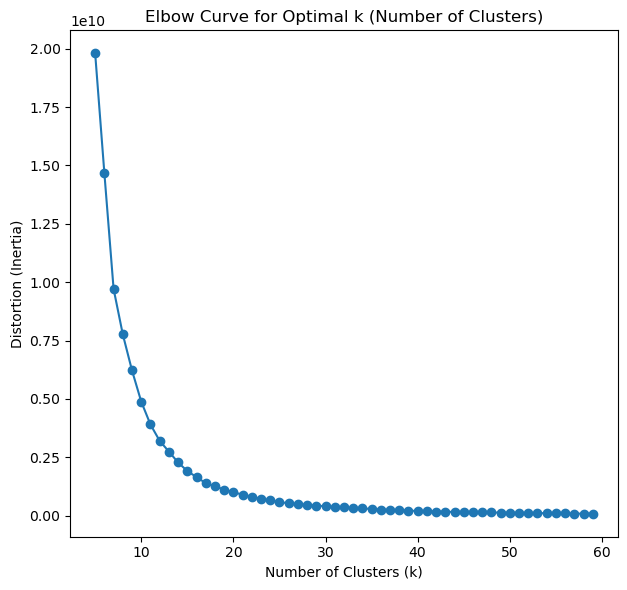

In [81]:
# Plot the distortion for different values of k (number of clusters) and measure time
distortions = []
execution_times = []

for i in range(5, 60):  # You can adjust the range of k as needed
    start_time = time.time()
    
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(station_data_p)
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    distortions.append(kmeans.inertia_)
    execution_times.append(execution_time)

    print(f"Finished for k={i} in {execution_time:.4f} seconds")

    
# Plot the final elbow curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(5, 60), distortions, marker='o')
plt.title('Elbow Curve for Optimal k (Number of Clusters)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')

plt.tight_layout()
plt.show()

- ### Clustering with k=5

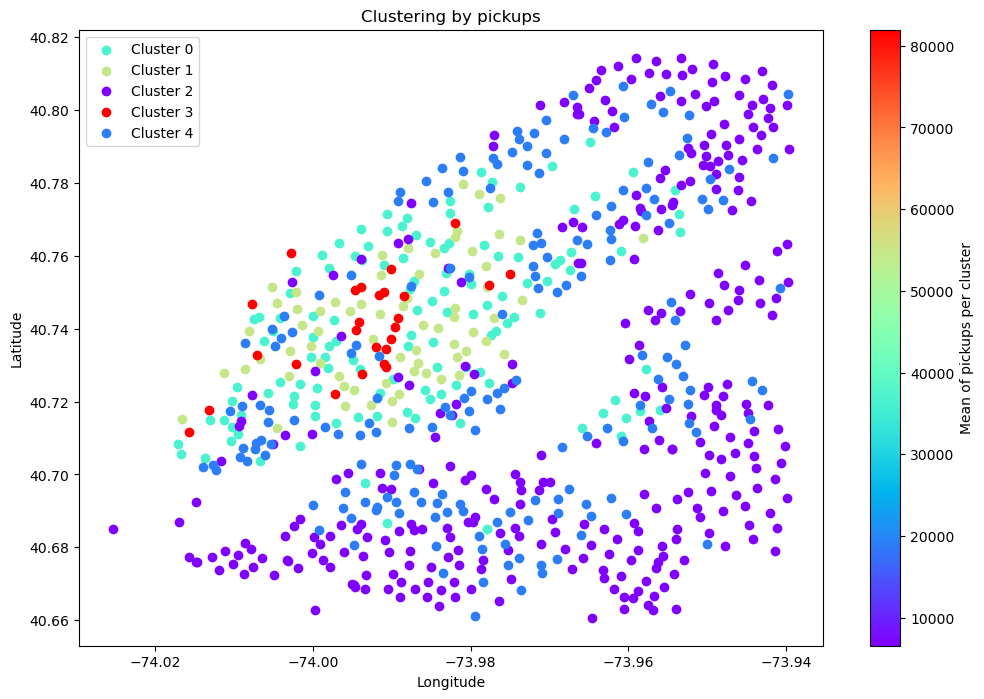

In [82]:
# Clustering
warnings.filterwarnings('ignore')

n_clusters = 5  # Adjusted the number to get the optimal number of clusters

pickups_kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(station_data_p)

station_data_p['cluster']=KMeans(n_clusters=n_clusters, random_state=0).fit_predict(station_data_p)


#Preparing data to plot
geolocation = filtered_data.groupby('start_station_id').agg({
    'start_station_latitude': 'first',
    'start_station_longitude': 'first'
}).reset_index()

clustering = pd.merge(geolocation, station_data_p, on='start_station_id', how='left')
clustering


#Plot
mean_pickup_per_cluster = clustering.groupby('cluster')['pickups'].mean()

plt.figure(figsize=(12, 8))

clusters_new = sorted(clustering['cluster'].unique())

norm = Normalize(vmin=mean_pickup_per_cluster.min(), vmax=mean_pickup_per_cluster.max())

sm = ScalarMappable(cmap='rainbow', norm=norm)

for c in clusters_new:
    clusters_data = clustering[clustering['cluster'] == c]
    plt.scatter(
        clusters_data['start_station_longitude'],
        clusters_data['start_station_latitude'],
        label=f'Cluster {c}',
        color=sm.to_rgba(mean_pickup_per_cluster[c])
    )

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering by pickups')
cbar = plt.colorbar(sm, label='Mean of pickups per cluster')
plt.legend()
plt.show()

In [83]:
#Showing a summary of the clusters' statistics
clu_st = station_data_p.groupby('cluster').agg(['sum', 'mean', 'std', 'min', 'max', 'count']).reset_index()

total_pickups = sum(station_data_p['pickups'])

clu_st['% total pickups'] = (clu_st['pickups']['sum']/total_pickups)*100
clu_st.sort_values(('pickups', 'max'), inplace=True, ascending=False)
clu_st.reset_index(drop=True, inplace=True)
clu_st


cluster  pickups                                          % total pickups
               sum      mean       std    min     max count                
0       3  2131111 81965.808 16545.599  69215  144677    26          13.175
1       1  3730333 54857.838  5886.000  45902   66359    68          23.061
2       0  4585677 36394.262  4883.676  27830   45395   126          28.349
3       4  3579257 19140.412  4307.714  12891   27596   187          22.127
4       2  2149606  6573.719  3590.469      1   12828   327          13.289

In [84]:
clu_sta = sum(clu_st['pickups']['count'])
clu_s = clu_st['pickups']['count'][0]+clu_st['pickups']['count'][1]+clu_st['pickups']['count'][2]
print(f"Notably, Clusters {clu_st['cluster'][0]}, {clu_st['cluster'][1]} and {clu_st['cluster'][2]} together represents {clu_st['% total pickups'][0]+clu_st['% total pickups'][1]+clu_st['% total pickups'][2]:.2f}% of the demand by covering only {clu_s/clu_sta*100:.2f}% of the stations.")

Notably, Clusters 3, 1 and 0 together represents 64.58% of the demand by covering only 29.97% of the stations.


The results above offer an opportunity for the bike company to focus and streamline its efforts on a select number of stations with higher demand. 

### **Summarizing the findings from Research question 1**:
- #### There is a correlation between pickups and geographic location: Manhattan is the region with highest demand.
- #### Clustering using pickups as variable instead of geographic location allows to generate smaller set of high demand stations.

## 3.b Research question Nr.2:

##### *What is the relationship between demand and seasonal changes?*

#### Libraries 

In [85]:
import warnings
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
import pickle
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [86]:
filtered_data['start_date_hour'] = pd.to_datetime(filtered_data['starttime']).dt.to_period('H')

filtered_data['pickups'] = 1
# Define continuous and categorical columns
continuous_cols = ['tripduration', 'birth_year', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
categorical_cols = ['gender', 'usertype']

# Aggregate the data
agg_data = filtered_data.groupby('start_date_hour').agg({
    **{col: 'median' for col in continuous_cols},
    **{col: lambda x: x.mode()[0] for col in categorical_cols},
    'pickups': 'sum'  # Counting column to get the number of pickups for counting rows
}).reset_index()

# columns to correct format
agg_data['start_date_hour'] = agg_data['start_date_hour'].dt.to_timestamp()
agg_data['weekday'] = agg_data['start_date_hour'].dt.weekday

In [87]:
# Weekday function
def weekday_word(weekday):
    if weekday==0:
        return "Monday"
    elif weekday==1:
        return "Tuesday"
    elif weekday==2:
        return "Wednesday"
    elif weekday==3:
        return "Thursday"
    elif weekday==4:
        return "Friday"
    elif weekday==5:
        return "Saturday"
    else:
        return "Sunday"
    
# Time of the day function   
def time_of_day(hour):
    if hour<7:
        return "night"
    elif hour<9:
        return "morning rush"
    elif hour<12:
        return "morning"
    elif hour<14:
        return "lunch time"
    elif hour<17:
        return "afternoon"
    elif hour<20:
        return "afternoon rush"
    elif hour<23:
        return "evening"
    else:
        return "night"

In [88]:
agg_data['wd'] = agg_data['weekday'].apply(weekday_word)
agg_data['time_of_day'] = agg_data['start_date_hour'].dt.hour.apply(time_of_day)

#Set state_date_hour with format %Y-%m-%d %H:%M as the weather datasets to be loaded afterwards
agg_data['start_date_hour'] = pd.to_datetime(agg_data['start_date_hour']).dt.to_period('H')

# Load weather dataset (obtained from: https://open-meteo.com/en/docs/historical-weather-api#latitude=40.767272&longitude=-73.993929&hourly=temperature_2m,precipitation&daily=&timezone=America%2FNew_York)
weather_df = pd.read_csv('weather dataset.csv', skiprows=3)
weather_df['start_date_hour'] = pd.to_datetime(weather_df['time']).dt.to_period('H')
weather_df.drop(columns=["time"], inplace=True)
weather_df.rename(columns={'temperature_2m (°C)': 'Temperature (°C)', 'precipitation (mm)': 'Precipitation (mm)', 'wind_speed_10m (km/h)': 'WindSpeed (km/h)'}, inplace=True)


#Merge trips dataset with hourly aggregated data to weather dataset
weather_added = pd.merge(agg_data, weather_df, on='start_date_hour', how='left')
data = weather_added

## Data preparation:
- Create season variable
- Separate categorical from numerical variables and standardize numerical dataset to perform PCA

In [89]:
# remove categorical variables from initial dataset 'data'
num_data = data.drop(['gender','usertype','start_date_hour','wd','weekday','time_of_day'], axis=1)

#standardize numerical columns
numerical_columns = ['tripduration', 'birth_year',
       'start_station_latitude', 'start_station_longitude',
       'end_station_latitude', 'end_station_longitude',
       'pickups', 'Temperature (°C)',
       'Precipitation (mm)', 'WindSpeed (km/h)']

scaler = StandardScaler()
num_data[numerical_columns] = scaler.fit_transform(num_data[numerical_columns])

num_data.head()

tripduration  birth_year  start_station_latitude  start_station_longitude  \
0         0.117      -0.436                  -0.116                    1.518   
1        -1.461       0.203                  -0.514                   -0.315   
2        -2.023       0.683                  -0.877                    2.217   
3        -0.859       1.163                   0.402                    0.395   
4        -1.290      -0.436                  -0.919                   -0.603   

   end_station_latitude  end_station_longitude  pickups  Temperature (°C)  \
0                -0.014                  2.891   -1.018            -2.477   
1                 0.037                  0.820   -0.992            -2.487   
2                -1.038                  2.657   -1.032            -2.506   
3                 0.168                  1.060   -1.047            -2.526   
4                -1.164                  3.377   -1.066            -2.545   

   Precipitation (mm)  WindSpeed (km/h)  
0              -0.282             0.321  
1              -0.282             0.321  
2              -0.282             0.181  
3              -0.282             0.139  
4              -0.282             0.209

In [90]:
# remove categorical variables from initial dataset 'data'
num_data = data.drop(['gender','usertype','start_date_hour','wd','weekday','time_of_day'], axis=1)

#standardize numerical columns
numerical_columns = ['tripduration', 'birth_year',
       'start_station_latitude', 'start_station_longitude',
       'end_station_latitude', 'end_station_longitude',
       'pickups', 'Temperature (°C)',
       'Precipitation (mm)', 'WindSpeed (km/h)']

scaler = StandardScaler()
num_data[numerical_columns] = scaler.fit_transform(num_data[numerical_columns])

num_data.head()

tripduration  birth_year  start_station_latitude  start_station_longitude  \
0         0.117      -0.436                  -0.116                    1.518   
1        -1.461       0.203                  -0.514                   -0.315   
2        -2.023       0.683                  -0.877                    2.217   
3        -0.859       1.163                   0.402                    0.395   
4        -1.290      -0.436                  -0.919                   -0.603   

   end_station_latitude  end_station_longitude  pickups  Temperature (°C)  \
0                -0.014                  2.891   -1.018            -2.477   
1                 0.037                  0.820   -0.992            -2.487   
2                -1.038                  2.657   -1.032            -2.506   
3                 0.168                  1.060   -1.047            -2.526   
4                -1.164                  3.377   -1.066            -2.545   

   Precipitation (mm)  WindSpeed (km/h)  
0              -0.282             0.321  
1              -0.282             0.321  
2              -0.282             0.181  
3              -0.282             0.139  
4              -0.282             0.209

# Perform PCA

In [91]:
svd = TruncatedSVD(n_components=min(num_data.shape[0], num_data.shape[1]) - 1)
svd_result = svd.fit_transform(num_data)

# Extract U, S, and V
U = svd.components_  # U matrix
S = np.diag(svd.singular_values_)  # S matrix
V = svd_result.T  # V matrix

## Variance explained by principal components
- 75% of total variance is explained by the first 4 components

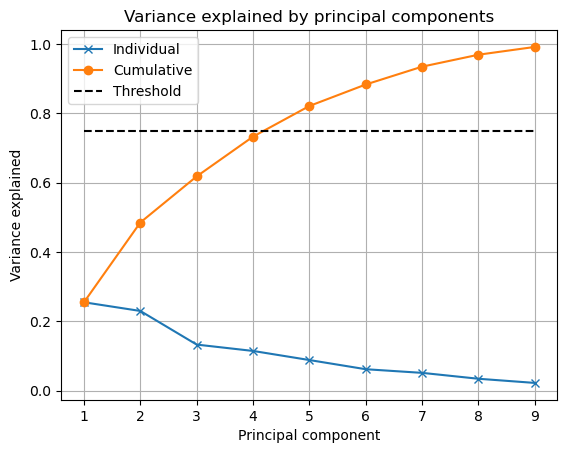

In [92]:
# Compute variance explained by principal components
explained_variance_ratio = svd.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

threshold = 0.75
# changing threshold to 0.75 we verify that we need the first 4 to explain the 75% of the variance

# Plot variance explained
variance_expl = plt.figure()
plt.plot(range(1,len(explained_variance_ratio)+1),explained_variance_ratio,'x-')
plt.plot(range(1,len(explained_variance_ratio)+1),np.cumsum(explained_variance_ratio),'o-')
plt.plot([1,len(explained_variance_ratio)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

# Variance explained:

## Explain the contribution of the different attributes to the first 4 components

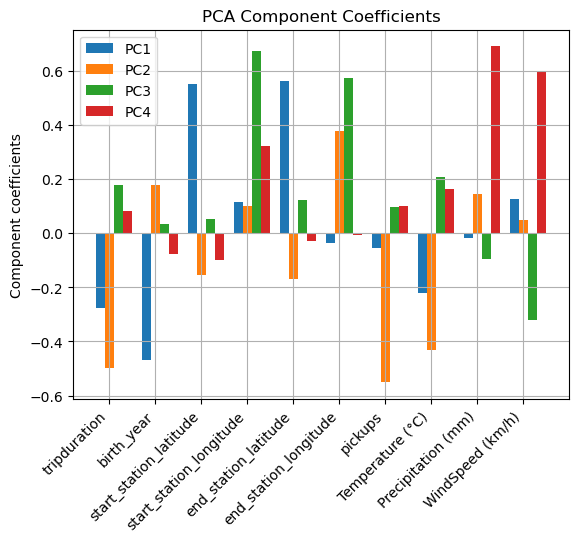

In [93]:
barplot = plt.figure()
# Select the first 4 principal components
pcs = [0, 1, 2, 3]
legendStrs = ['PC' + str(e + 1) for e in pcs]
c = ['r', 'g', 'b']
bw = 0.2
r = np.arange(1, U.shape[1] + 1)

# Bar plot for the first 4 principal components
for i in pcs:
    plt.bar(r + i * bw, U[i], width=bw)

plt.xticks(r + bw, numerical_columns, rotation=45, ha='right')  
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('PCA Component Coefficients')
plt.show()

### - PCA confirms how geography has most influence in dataset, strong redundency in PC1 and PC3
- We notice how temperature, precipitation and windspeed also have strong redundencies in PC3 and PC4
- PC3: ca. 14% variance explained while PC4: ca. 13% varience explained. That is ca. 27% out of 75% (of all four)
- We investigate further the relationship between pickups and weather (and season):

In [94]:
# Add in the Dataframe weather_added the coloumns referred to the type of SEASON and the MONTH

# Function to get the season based on month and day
def get_season(month, day):
    if (month == 12 and day >= 21) or (month == 1) or (month == 2) or (month == 3 and day < 20):
        return 'Winter'
    elif (month == 3 and day >= 20) or (month == 4) or (month == 5) or (month == 6 and day < 21):
        return 'Spring'
    elif (month == 6 and day >= 21) or (month == 7) or (month == 8) or (month == 9 and day < 23):
        return 'Summer'
    elif (month == 9 and day >= 23) or (month == 10) or (month == 11) or (month == 12 and day < 21):
        return 'Fall'

# Extract month and day, and get the corresponding season
data['month'] = data['start_date_hour'].dt.month
data['day'] = data['start_date_hour'].dt.day
data['season'] = data.apply(lambda row: get_season(row['month'], row['day']), axis=1)

# Drop the intermediate columns (month and day)
data = data.drop(['month', 'day'], axis=1)

# Create a new column 'Month' to extract the month from 'start_hour'
data['Month'] = data['start_date_hour'].dt.month

data.head()

start_date_hour  tripduration  birth_year  start_station_latitude  \
0  2018-01-01 00:00       543.000    1980.000                  40.736   
1  2018-01-01 01:00       400.000    1982.000                  40.734   
2  2018-01-01 02:00       349.000    1983.500                  40.732   
3  2018-01-01 03:00       454.500    1985.000                  40.739   
4  2018-01-01 04:00       415.500    1980.000                  40.732   

   start_station_longitude  end_station_latitude  end_station_longitude  \
0                  -73.983                40.736                -73.980   
1                  -73.987                40.737                -73.984   
2                  -73.982                40.731                -73.980   
3                  -73.986                40.737                -73.984   
4                  -73.988                40.730                -73.979   

   gender    usertype  pickups  weekday      wd time_of_day  Temperature (°C)  \
0       1  Subscriber      113        0  Monday       night           -13.100   
1       1  Subscriber      157        0  Monday       night           -13.200   
2       1  Subscriber       90        0  Monday       night           -13.400   
3       1  Subscriber       64        0  Monday       night           -13.600   
4       1  Subscriber       32        0  Monday       night           -13.800   

   Precipitation (mm)  WindSpeed (km/h)  season  Month  
0               0.000            16.300  Winter      1  
1               0.000            16.300  Winter      1  
2               0.000            15.300  Winter      1  
3               0.000            15.000  Winter      1  
4               0.000            15.500  Winter      1

# The rain, wind and temperature for each month:

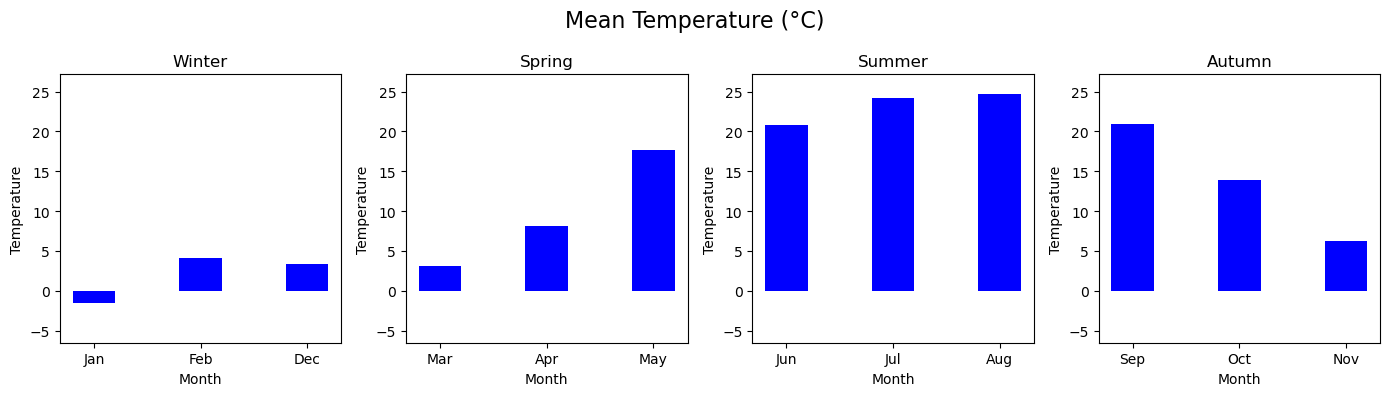

In [ ]:
# Create four subplots (Histograms) with the mean Temperature 
import calendar

# Define the seasons and corresponding months
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

fig, axs = plt.subplots(1, 4, figsize=(14, 4))
axs = axs.flatten()
# Define a common Y-axis range
common_y_axis = []

# Iterate over seasons and create histograms
for i, (season, months_in_season) in enumerate(seasons.items()):
    season_data = data[data['Month'].isin(months_in_season)]
    season_temperatures = season_data.groupby('Month')['Temperature (°C)'].mean()
    # Extend common Y-axis range
    common_y_axis.extend(season_temperatures.values)
    
    # Plotting the histogram for the current season
    axs[i].bar([calendar.month_abbr[m] for m in season_temperatures.index], season_temperatures.values, color='blue', width=0.4)
    axs[i].set_title(season, fontsize=12)
    axs[i].set_xlabel('Month', fontsize=10)
    axs[i].set_ylabel('Temperature', fontsize=10)
    axs[i].set_xticks([calendar.month_abbr[m] for m in months_in_season])

for ax in axs:
    ax.set_ylim([min(common_y_axis)-5, max(common_y_axis)+0.1*max(common_y_axis)])

fig.suptitle('Mean Temperature (°C)', fontsize=16)
plt.tight_layout()
plt.show()

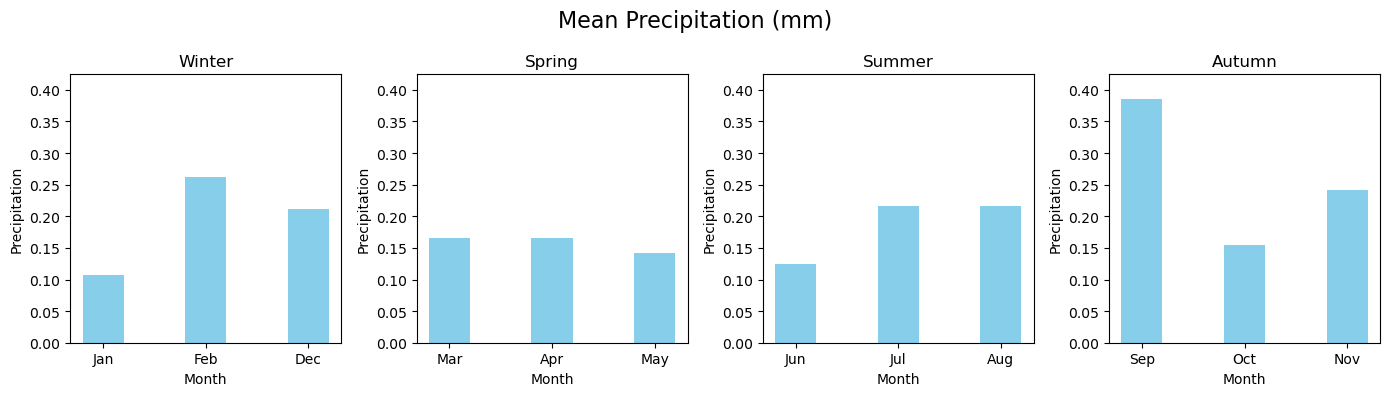

In [ ]:
# Create four subplots (Histograms) with the mean Precipitation
import calendar

# Define the seasons and corresponding months
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

fig, axs = plt.subplots(1, 4, figsize=(14, 4))
axs = axs.flatten()
# Define a common Y-axis range
common_y_axis = []

# Iterate over seasons and create histograms
for i, (season, months_in_season) in enumerate(seasons.items()):
    season_data = data[data['Month'].isin(months_in_season)]
    season_temperatures = season_data.groupby('Month')['Precipitation (mm)'].mean()
    # Extend common Y-axis range
    common_y_axis.extend(season_temperatures.values)
    
    # Plotting the histogram for the current season
    axs[i].bar([calendar.month_abbr[m] for m in season_temperatures.index], season_temperatures.values, color='skyblue', width=0.4)
    axs[i].set_title(season, fontsize=12)
    axs[i].set_xlabel('Month', fontsize=10)
    axs[i].set_ylabel('Precipitation', fontsize=10)
    axs[i].set_xticks([calendar.month_abbr[m] for m in months_in_season])

for ax in axs:
    ax.set_ylim([0, max(common_y_axis)+0.1*max(common_y_axis)])

fig.suptitle('Mean Precipitation (mm)', fontsize=16)
plt.tight_layout()
plt.show()

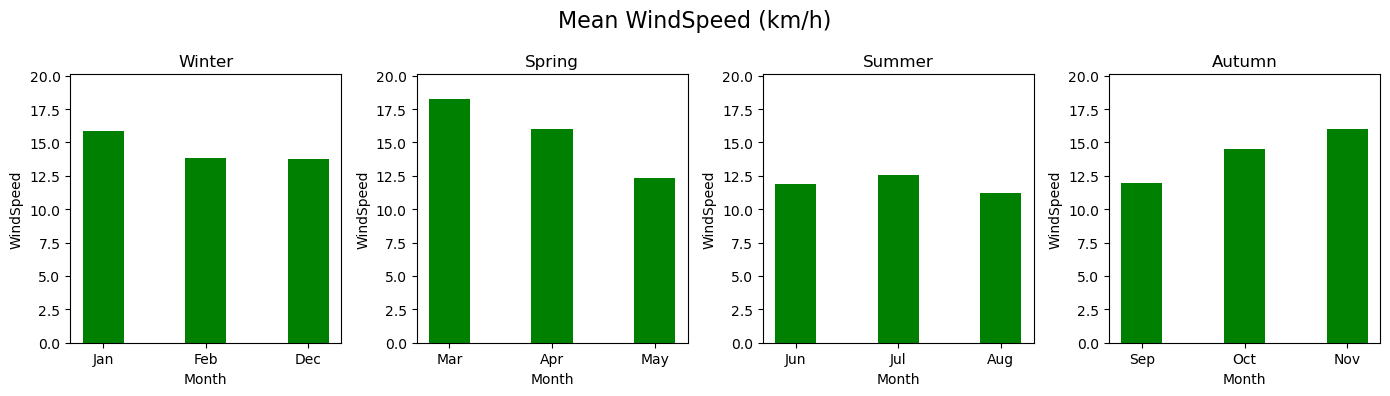

In [ ]:
# Create four subplots (Histograms) with the mean WindSpeed
import calendar

# Define the seasons and corresponding months
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

fig, axs = plt.subplots(1, 4, figsize=(14, 4))
axs = axs.flatten()
# Define a common Y-axis range
common_y_axis = []

# Iterate over seasons and create histograms
for i, (season, months_in_season) in enumerate(seasons.items()):
    season_data = data[data['Month'].isin(months_in_season)]
    season_temperatures = season_data.groupby('Month')['WindSpeed (km/h)'].mean()
    # Extend common Y-axis range
    common_y_axis.extend(season_temperatures.values)
    
    # Plotting the histogram for the current season
    axs[i].bar([calendar.month_abbr[m] for m in season_temperatures.index], season_temperatures.values, color='green', width=0.4)
    axs[i].set_title(season, fontsize=12)
    axs[i].set_xlabel('Month', fontsize=10)
    axs[i].set_ylabel('WindSpeed', fontsize=10)
    axs[i].set_xticks([calendar.month_abbr[m] for m in months_in_season])

for ax in axs:
    ax.set_ylim([0, max(common_y_axis)+0.1*max(common_y_axis)])

fig.suptitle('Mean WindSpeed (km/h)', fontsize=16)
plt.tight_layout()
plt.show()

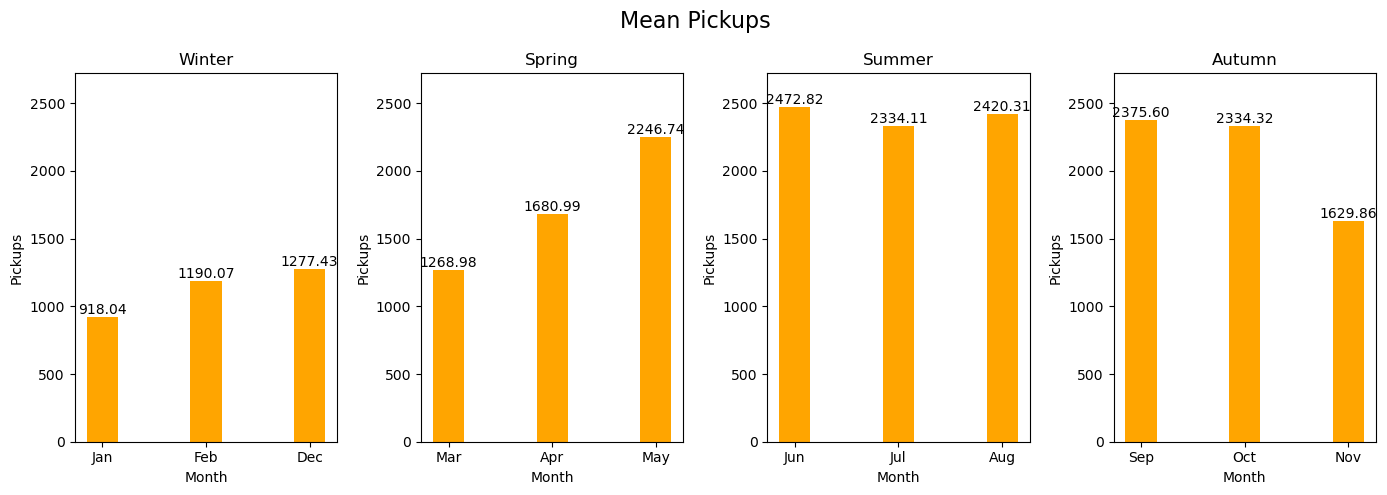

In [ ]:
# Create four subplots (Histograms) with the mean of pickups

import calendar
# Define the seasons and corresponding months
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

fig, axs = plt.subplots(1, 4, figsize=(14, 5))
axs = axs.flatten()

# Define a common Y-axis range
common_y_axis = []

# Iterate over seasons and create histograms
for i, (season, months_in_season) in enumerate(seasons.items()):
    season_data = data[data['Month'].isin(months_in_season)]
    season_temperatures = season_data.groupby('Month')['pickups'].mean()
    
    # Extend common Y-axis range
    common_y_axis.extend(season_temperatures.values)
    
    # Plotting the histogram for the current season
    bars = axs[i].bar([calendar.month_abbr[m] for m in season_temperatures.index], season_temperatures.values, color='orange', width=0.3)
    axs[i].set_title(season, fontsize=12)
    axs[i].set_xlabel('Month', fontsize=10)
    axs[i].set_ylabel('Pickups', fontsize=10)
    axs[i].set_xticks([calendar.month_abbr[m] for m in months_in_season])

    # Adding mean values on top of the bars
    for bar in bars:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

for ax in axs:
    ax.set_ylim([0, max(common_y_axis)+0.1*max(common_y_axis)])

# Add an overall title for the entire figure
fig.suptitle('Mean Pickups', fontsize=16)

plt.tight_layout()
plt.show()

# Conclusions:
### Highest average demand in summer and autumn:

- Charactaristics of summer: low wind, low-medium rain, high temperature 
- Charactaristics of autumn: medium rain (high in september where demand is also high), medium wind, medium temperature

### Lowest demand in winter and spring:

- Charactaristics of winter: medium-high wind, medium rain, low temperature 
- Charactaristics of spring: high wind, low rain, medium temperature

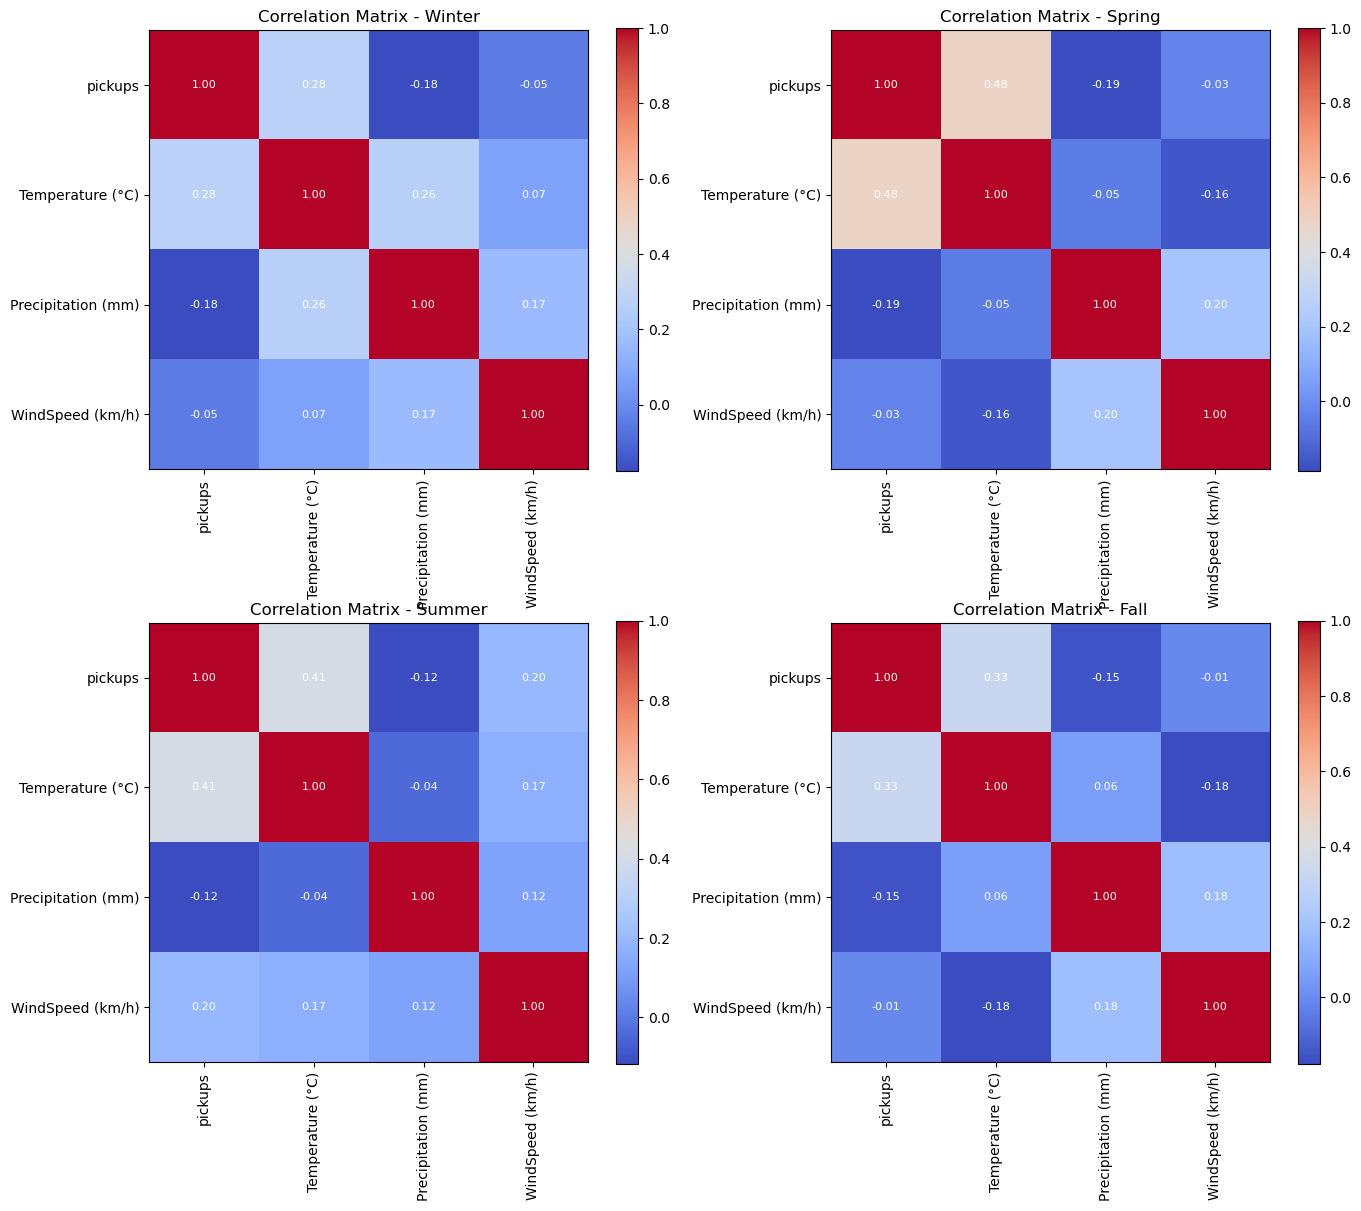

In [ ]:
#Checking correlation between pickups and seasonal variables:

data['season'] = data['Month'].map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})

# Define a function to plot correlation matrix
def plot_correlation_matrix(season_data, season_name):
    # Select only pickusp, weather and season columns
    wys_cols = ['pickups','Temperature (°C)', 'Precipitation (mm)', 'WindSpeed (km/h)']
    wys_data = season_data[wys_cols]

    # Calculate the correlation matrix for numerical columns
    correlation_matrix = wys_data.corr()

    # Plot a heatmap of the correlation matrix using Matplotlib with annotations and outlines
    ax = plt.subplot(2, 2, season_names.index(season_name) + 1)
    im = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

    # Add annotations with values
    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)):
            ax.text(i, j, f'{correlation_matrix.iloc[i, j]:.2f}',
                    ha='center', va='center', color='w', fontsize=8)

    # Add outlines
    plt.colorbar(im, ax=ax)
    plt.title(f'Correlation Matrix - {season_name}')
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.grid(visible=False)

# Define the order of seasons
season_names = ['Winter', 'Spring', 'Summer', 'Fall']

# Create subplots
plt.figure(figsize=(14, 12))

# Call the function for each season
for season_name in season_names:
    season_data = data[data['season'] == season_name]
    plot_correlation_matrix(season_data, season_name)

plt.tight_layout()
plt.show()

# Overall: demand of pickup is besides location also, to a lesser degree, influenced by seasonal changes
#### - Demand is more dependent on temperature than other seasonal variables. They are positvely correlated.
#### - Temperature correlation is lower in winter than the rest of season, meaning that people keep using bikes even when temperatures are not favorable during winter. 
#### - As expected, there is an small negative correlation between demand and precipitations.
#### - No correlation between pickups and wind speed.
#### - As a consequence of these correlations and its characteristics defined above, high demand is more likely in a regular SUMMER.

In [102]:
from tabulate import tabulate

print('Individual Contributions')
 
Individual_contributions = [['Group Member','Student number','Section 1','Section 2','Section 3','Section 4'],
                           ['Anna Miotto','s220674','20 %','20 %','20 %','20 %'],
                           ['Anna Olivia de Carle McFall','s184307','20 %','20 %','20 %','20 %'],
                           ['Dimitrios Loukas','s220514','20 %','20 %','20 %','20 %'],
                           ['Oriol Solans Ormo','s222527','20 %','20 %','20 %','20 %'],
                           ['Patricio Alejandro Fabro','s220269','20 %','20 %','20 %','20 %'],]
 
print(tabulate(Individual_contributions,headers='firstrow', tablefmt='fancy_grid'))

Individual Contributions
╒═════════════════════════════╤══════════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│ Group Member                │ Student number   │ Section 1   │ Section 2   │ Section 3   │ Section 4   │
╞═════════════════════════════╪══════════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ Anna Miotto                 │ s220674          │ 20 %        │ 20 %        │ 20 %        │ 20 %        │
├─────────────────────────────┼──────────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ Anna Olivia de Carle McFall │ s184307          │ 20 %        │ 20 %        │ 20 %        │ 20 %        │
├─────────────────────────────┼──────────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ Dimitrios Loukas            │ s220514          │ 20 %        │ 20 %        │ 20 %        │ 20 %        │
├─────────────────────────────┼──────────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ Oriol Sola